<a href="https://colab.research.google.com/github/LegendTime1/Hateful-Memes/blob/main/ObjDetection_Memes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd

In [4]:
path = "/content/drive/MyDrive/hateful_memes/"
dev_seen_data= pd.read_json(path+'dev_seen.jsonl',lines=True)
dev_unseen_data= pd.read_json(path+'dev_unseen.jsonl',lines=True)
test_seen_data=pd.read_json(path+'test_seen.jsonl',lines=True)
test_unseen_data=pd.read_json(path+'test_unseen.jsonl',lines=True)
train_data=pd.read_json(path+'train.jsonl',lines=True)


In [5]:
!git clone https://github.com/ultralytics/yolov5  # clone
%cd yolov5
%pip install -qr requirements.txt  # install

import torch
from yolov5 import utils
display = utils.notebook_init()

YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU


Setup complete ✅ (2 CPUs, 12.7 GB RAM, 29.0/107.7 GB disk)


In [6]:
data = pd.concat([train_data,test_seen_data,test_unseen_data,dev_seen_data,dev_unseen_data])
data1 = data.drop_duplicates(subset=['img'])

In [7]:
data

id            img  label  \
0    42953  img/42953.png      0   
1    23058  img/23058.png      0   
2    13894  img/13894.png      0   
3    37408  img/37408.png      0   
4    82403  img/82403.png      0   
..     ...            ...    ...   
535  83675  img/83675.png      0   
536  37198  img/37198.png      0   
537  48670  img/48670.png      0   
538   9863  img/09863.png      0   
539  97320  img/97320.png      0   

                                                  text  
0     its their character not their color that matters  
1    don't be afraid to love again everyone is not ...  
2                             putting bows on your pet  
3    i love everything and everybody! except for sq...  
4    everybody loves chocolate chip cookies, even h...  
..                                                 ...  
535                   i'm gonna be like phelps one day  
536  when you're so relaxed you can feel yourself g...  
537  look at this sandwich maker club i found on wi...  
538                             diverse group of women  
539  "when your dishwasher is broken so you take it...  

[12540 rows x 4 columns]

In [8]:
data1

id            img  label  \
0    42953  img/42953.png      0   
1    23058  img/23058.png      0   
2    13894  img/13894.png      0   
3    37408  img/37408.png      0   
4    82403  img/82403.png      0   
..     ...            ...    ...   
135  82054  img/82054.png      0   
136  13749  img/13749.png      0   
137  85067  img/85067.png      0   
138  20541  img/20541.png      0   
139  60724  img/60724.png      0   

                                                  text  
0     its their character not their color that matters  
1    don't be afraid to love again everyone is not ...  
2                             putting bows on your pet  
3    i love everything and everybody! except for sq...  
4    everybody loves chocolate chip cookies, even h...  
..                                                 ...  
135                                puzzle level expert  
136  it's amazing how animal bodies and the human b...  
137              rare image of a worker picking cotton  
138               caught me cat and monkey today! this  
139  to the black guy reading this meme i am your f...  

[12140 rows x 4 columns]

In [9]:
path2 = "/content/drive/MyDrive/hateful_memes/"

In [11]:
objects = {}
count = 0;
for each in data1['img']:
  print(each)
  img_path = path2 + each
  model = torch.hub.load('ultralytics/yolov5', 'yolov5s')
  results = model(img_path)
  object1 = results.pandas().xyxy[0]['name'].unique()
  print(object1)
  count += 1
  print(count)
  objects[each] = object1

img/42953.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
1
img/23058.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 


['person' 'tie']
2
img/13894.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cat' 'teddy bear']
3
img/37408.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog']
4
img/82403.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 


['tie' 'person']
5
img/16952.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6
img/76932.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 


['sheep' 'dog' 'cow']
7
img/70914.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 


['person']
8
img/02973.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
9
img/58306.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
10
img/79351.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
11
img/34096.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['keyboard']
12
img/25489.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
13
img/19324.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'couch' 'chair']
14
img/79346.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
15
img/13426.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'umbrella' 'kite']
16
img/97628.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'couch' 'bed']
17
img/14238.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
18
img/28936.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 


['person' 'chair' 'couch']
19
img/59784.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'bus']
20
img/02146.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['bird']
21
img/70146.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog']
22
img/28061.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 


['person' 'skateboard']
23
img/97180.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
24
img/49752.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie' 'cup']
25
img/25610.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'car']
26
img/15872.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
27
img/72640.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
28
img/64318.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 


['person' 'cake']
29
img/17956.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 


['tie' 'person']
30
img/93547.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
31
img/10743.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'umbrella' 'car' 'dog']
32
img/37091.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'bottle' 'cup' 'bowl' 'knife' 'broccoli' 'spoon']
33
img/25719.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'car' 'potted plant']
34
img/76825.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 


['person' 'handbag']
35
img/72598.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'chair']
36
img/43078.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'book']
37
img/51846.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['bird']
38
img/01569.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'potted plant' 'spoon' 'bowl' 'scissors']
39
img/95812.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
40
img/06418.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 


[]
41
img/53976.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 


['person' 'tie']
42
img/70193.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
43
img/60427.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cat']
44
img/78395.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie' 'tennis racket' 'spoon']
45
img/04876.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
46
img/92075.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 


['person']
47
img/86354.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


[]
48
img/74386.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
49
img/59613.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
50
img/10263.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
51
img/48279.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['clock']
52
img/52610.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 


[]
53
img/58371.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 


['person' 'dog']
54
img/27401.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
55
img/89574.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
56
img/25473.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
57
img/47913.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 


['person' 'tie']
58
img/08295.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
59
img/02497.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
60
img/90471.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cup' 'tie']
61
img/69357.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
62
img/54602.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'dog']
63
img/15320.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 


['person' 'tie' 'book']
64
img/63182.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 


['surfboard']
65
img/20619.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 


['person']
66
img/82457.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cell phone']
67
img/81059.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 


['person']
68
img/42137.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 


['person']
69
img/74530.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'pizza' 'orange' 'tie' 'dining table' 'chair' 'knife']
70
img/40832.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 


['person']
71
img/46127.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['bottle']
72
img/87594.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['teddy bear']
73
img/12548.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
74
img/12894.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
75
img/02476.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
76
img/06937.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 


['person']
77
img/05762.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
78
img/40259.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 


['person' 'bed']
79
img/85072.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
80
img/46537.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
81
img/56432.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
82
img/39805.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
83
img/29163.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
84
img/36072.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cake']
85
img/60147.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
86
img/90583.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 


['person']
87
img/38612.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['bottle']
88
img/52097.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 


[]
89
img/34961.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cat']
90
img/15803.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
91
img/89762.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
92
img/38465.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 


['person']
93
img/53289.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 


['person' 'banana' 'sports ball']
94
img/75321.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
95
img/18350.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'book']
96
img/91547.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['wine glass' 'cell phone' 'person']
97
img/30247.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
98
img/93741.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'skateboard']
99
img/51243.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 


['person' 'tie']
100
img/05384.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 


['person']
101
img/01845.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
102
img/34791.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
103
img/41385.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
104
img/34508.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
105
img/80521.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
106
img/34165.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 


['person' 'dog']
107
img/93072.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
108
img/25468.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 


['person']
109
img/09617.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['baseball bat']
110
img/96258.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'skis']
111
img/96578.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
112
img/35618.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'couch']
113
img/05249.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'book']
114
img/57349.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 


['person' 'tie' 'teddy bear']
115
img/78409.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 


['person']
116
img/29814.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 


['person' 'bottle']
117
img/20568.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['sheep' 'person']
118
img/84269.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 


['spoon']
119
img/68079.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 


['bird']
120
img/41537.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 


[]
121
img/12890.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 


['person' 'tie']
122
img/54102.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
123
img/63217.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
124
img/03271.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
125
img/35264.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
126
img/63710.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'potted plant' 'cup']
127
img/12348.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
128
img/14052.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['kite']
129
img/81064.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
130
img/74391.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cell phone' 'laptop']
131
img/36152.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
132
img/80256.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 


['tie' 'person']
133
img/21948.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
134
img/70532.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
135
img/25806.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'truck']
136
img/26759.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
137
img/27398.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['horse']
138
img/18730.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie' 'backpack' 'handbag']
139
img/75216.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cow']
140
img/91754.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'potted plant']
141
img/42153.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'sports ball' 'frisbee']
142
img/83456.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
143
img/18673.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['chair' 'person' 'banana']
144
img/97523.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'dog']
145
img/24631.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
146
img/23748.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
147
img/69412.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['wine glass' 'cup']
148
img/59073.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'car' 'cell phone']
149
img/28405.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['car' 'person' 'cell phone']
150
img/63492.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
151
img/92670.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
152
img/78351.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['tie' 'person']
153
img/79856.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'chair' 'toothbrush']
154
img/71436.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 


['person']
155
img/03258.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
156
img/20736.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'umbrella']
157
img/50487.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
158
img/06431.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
159
img/51473.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 


['person']
160
img/34901.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'horse']
161
img/28793.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
162
img/05172.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 


['person']
163
img/98501.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cell phone' 'person' 'toilet']
164
img/96231.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
165
img/81673.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 


['person' 'kite']
166
img/48635.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 


['person']
167
img/43612.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
168
img/15480.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
169
img/41830.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cell phone']
170
img/81069.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
171
img/72584.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cell phone']
172
img/51763.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['bird']
173
img/06873.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog']
174
img/08523.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 


['person']
175
img/06359.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cup' 'person' 'chair' 'laptop' 'dining table' 'knife']
176
img/93260.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
177
img/40839.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'chair']
178
img/08516.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
179
img/53012.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['bus']
180
img/76250.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
181
img/26198.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
182
img/61952.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
183
img/80269.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 


['person']
184
img/05712.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 


['person']
185
img/72941.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
186
img/21853.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['car']
187
img/35219.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
188
img/90146.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
189
img/51278.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 


[]
190
img/63095.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
191
img/96058.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
192
img/56871.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['tie' 'person']
193
img/25180.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
194
img/37259.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
195
img/48106.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
196
img/19352.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cow']
197
img/65213.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 


['person' 'chair']
198
img/24368.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
199
img/58426.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 


['person' 'baseball glove' 'baseball bat']
200
img/96785.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
201
img/40567.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 


['chair' 'person' 'book']
202
img/38625.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
203
img/04823.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
204
img/25368.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 


['person']
205
img/93826.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
206
img/56392.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['bear']
207
img/30986.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cake' 'person']
208
img/75823.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
209
img/84072.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
210
img/93147.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 


['dog']
211
img/92874.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
212
img/27946.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'potted plant' 'handbag']
213
img/93614.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
214
img/93521.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['bus']
215
img/02691.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
216
img/91708.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'bottle']
217
img/25783.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 


[]
218
img/16098.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
219
img/30452.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 


['person']
220
img/86491.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
221
img/14530.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
222
img/81734.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
223
img/04683.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
224
img/08593.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['horse' 'person']
225
img/92608.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['tie' 'person']
226
img/61453.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
227
img/39601.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'chair']
228
img/12035.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
229
img/56482.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cup' 'person' 'knife' 'dining table' 'bottle']
230
img/56287.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
231
img/19036.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
232
img/34852.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
233
img/62804.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
234
img/81579.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
235
img/80247.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['horse' 'dog']
236
img/52890.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'sheep']
237
img/02485.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
238
img/50793.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cell phone' 'laptop']
239
img/13857.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
240
img/43617.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 


['person']
241
img/70942.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 


[]
242
img/49601.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
243
img/35102.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['tie' 'person']
244
img/10659.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 


['sandwich' 'knife' 'person' 'potted plant']
245
img/36081.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['donut' 'sports ball' 'cell phone']
246
img/68325.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cell phone']
247
img/39256.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 


[]
248
img/98362.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 


['person' 'tie']
249
img/38475.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'book']
250
img/49083.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 


['person' 'cow' 'sheep']
251
img/45938.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
252
img/67823.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'car']
253
img/70928.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['bottle' 'person' 'car']
254
img/24309.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
255
img/70925.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'book']
256
img/05269.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
257
img/61278.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'sports ball']
258
img/81675.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
259
img/38629.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog' 'person' 'tie']
260
img/06458.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'donut']
261
img/71364.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 


['bear' 'sheep']
262
img/26794.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
263
img/85704.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
264
img/75102.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 


['person']
265
img/91268.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['bird']
266
img/42179.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'backpack' 'dog']
267
img/35097.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'sheep']
268
img/83570.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
269
img/56490.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
270
img/07968.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
271
img/81259.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['tie' 'person' 'bottle']
272
img/19753.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
273
img/61480.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
274
img/54790.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
275
img/43517.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
276
img/25068.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
277
img/35861.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
278
img/92741.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
279
img/51736.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
280
img/26417.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
281
img/18407.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['teddy bear']
282
img/47326.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 


['person']
283
img/50768.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['wine glass' 'person' 'cup']
284
img/86594.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['giraffe']
285
img/63581.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
286
img/95426.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
287
img/10264.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
288
img/79312.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['car' 'bicycle' 'dog' 'person' 'bird']
289
img/17832.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'stop sign']
290
img/15432.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cat' 'dog' 'couch' 'person']
291
img/34506.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
292
img/30492.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
293
img/31794.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
294
img/04175.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['tie' 'person']
295
img/61578.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['teddy bear' 'person']
296
img/31479.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 


['person']
297
img/17659.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
298
img/29785.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
299
img/17205.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
300
img/74132.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
301
img/15649.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['vase']
302
img/51460.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
303
img/60329.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
304
img/58276.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
305
img/40752.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'car']
306
img/79315.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
307
img/03241.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 


['person']
308
img/38041.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
309
img/40897.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
310
img/56180.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 


['person']
311
img/37865.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
312
img/36974.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['sports ball']
313
img/61780.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
314
img/81546.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 


['person']
315
img/75432.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog']
316
img/48703.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
317
img/81706.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 


['person' 'tie']
318
img/42319.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 


['person']
319
img/02139.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
320
img/93568.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
321
img/06832.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
322
img/20971.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
323
img/70936.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'frisbee']
324
img/04278.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
325
img/56024.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie' 'baseball glove']
326
img/53941.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 


['tie' 'person']
327
img/49270.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['orange' 'cat']
328
img/67485.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
329
img/92417.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'couch']
330
img/26305.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'bowl' 'knife' 'oven' 'toaster']
331
img/61234.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'baseball bat' 'tennis racket']
332
img/59064.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'cup' 'wine glass']
333
img/17634.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cat']
334
img/03246.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['tie' 'person']
335
img/97635.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'chair' 'bottle' 'dining table' 'knife' 'book' 'cup']
336
img/09634.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
337
img/49630.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cake']
338
img/60173.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'umbrella']
339
img/38490.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
340
img/68423.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
341
img/76258.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'wine glass']
342
img/39652.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
343
img/70435.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['chair' 'person' 'book']
344
img/08654.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
345
img/37402.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
346
img/26795.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'train']
347
img/60317.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
348
img/34805.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 


['person']
349
img/01389.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cat' 'person']
350
img/80361.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
351
img/74536.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['potted plant' 'person']
352
img/15283.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
353
img/75340.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
354
img/96153.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
355
img/63917.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cow' 'sheep']
356
img/38529.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
357
img/92016.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
358
img/79054.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
359
img/06471.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
360
img/07698.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['bear']
361
img/01896.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 


['person']
362
img/76354.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'sheep' 'dog']
363
img/80237.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
364
img/71045.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog']
365
img/67084.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
366
img/68507.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 


['person']
367
img/58096.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
368
img/04263.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
369
img/26043.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
370
img/26031.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cup' 'bottle' 'pizza' 'dining table' 'knife']
371
img/64701.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 


['person' 'tie']
372
img/26495.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 


['person']
373
img/81963.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
374
img/56972.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
375
img/83127.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
376
img/10827.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 


['person' 'tie' 'chair']
377
img/56378.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['tie' 'person']
378
img/50273.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cup' 'person' 'oven' 'sink' 'bowl']
379
img/25397.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['tie' 'teddy bear']
380
img/46058.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
381
img/06218.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
382
img/02849.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
383
img/69042.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'pizza']
384
img/41853.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
385
img/70652.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 


['person']
386
img/27943.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'motorcycle']
387
img/68159.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'bicycle' 'potted plant']
388
img/91704.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
389
img/94823.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
390
img/63285.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'motorcycle' 'car']
391
img/42693.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
392
img/64027.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'baseball glove']
393
img/20751.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tennis racket']
394
img/94351.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['teddy bear']
395
img/27489.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
396
img/81394.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 


[]
397
img/59467.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
398
img/71906.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
399
img/81265.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
400
img/67384.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
401
img/21086.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
402
img/40153.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
403
img/31025.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
404
img/68042.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cup' 'spoon']
405
img/70549.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
406
img/48612.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tennis racket']
407
img/05183.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
408
img/27430.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 


['person']
409
img/13859.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 


['person']
410
img/68379.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
411
img/25037.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 


['person']
412
img/16380.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 


['dog']
413
img/25861.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cell phone']
414
img/59478.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
415
img/71249.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
416
img/12673.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
417
img/74235.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
418
img/63275.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
419
img/17830.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
420
img/48625.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 


['person' 'cup']
421
img/93216.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
422
img/19256.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
423
img/43201.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
424
img/38127.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['tie' 'person']
425
img/53962.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
426
img/76213.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
427
img/28317.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie' 'book' 'mouse']
428
img/03251.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 


['person']
429
img/09132.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'baseball bat' 'tie']
430
img/54973.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
431
img/04651.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
432
img/78560.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
433
img/95317.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
434
img/16490.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 


['person']
435
img/13876.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'truck']
436
img/80239.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['tie' 'person']
437
img/19540.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
438
img/61927.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'motorcycle']
439
img/52903.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
440
img/56389.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
441
img/64805.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 


['person']
442
img/74038.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cell phone']
443
img/86530.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cup' 'tie']
444
img/92450.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cat']
445
img/79103.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
446
img/94721.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
447
img/89042.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'laptop' 'chair' 'suitcase']
448
img/27034.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
449
img/67198.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
450
img/09347.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
451
img/54276.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'baseball glove' 'donut']
452
img/36472.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
453
img/15938.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'car' 'handbag']
454
img/87049.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'cup']
455
img/54761.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['bear' 'bird']
456
img/30628.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 


['person']
457
img/91375.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
458
img/87530.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
459
img/05129.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
460
img/34658.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['zebra' 'cat']
461
img/42387.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
462
img/67415.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'baseball bat']
463
img/86054.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['tie' 'person']
464
img/29517.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 


[]
465
img/28704.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['sports ball' 'person']
466
img/72531.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'dog' 'frisbee']
467
img/27953.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
468
img/07249.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
469
img/75403.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
470
img/30948.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
471
img/38245.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'sports ball' 'chair']
472
img/89160.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'tie']
473
img/93658.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
474
img/32046.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
475
img/04568.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 


['person']
476
img/54817.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 


['person' 'tie' 'cell phone']
477
img/42786.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 


['person']
478
img/58197.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
479
img/92185.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog' 'car' 'cow']
480
img/38704.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['donut' 'person']
481
img/75481.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 


['sheep' 'cow']
482
img/42309.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'book' 'surfboard' 'tie']
483
img/04253.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
484
img/28971.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
485
img/26741.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie' 'clock']
486
img/03685.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'backpack' 'horse']
487
img/40286.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
488
img/14695.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
489
img/59837.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cell phone' 'bowl' 'sink' 'cup']
490
img/54397.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog' 'frisbee']
491
img/07192.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
492
img/01392.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cell phone']
493
img/67219.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['bowl' 'dining table']
494
img/14697.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['tv']
495
img/68194.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
496
img/32468.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 


['cat']
497
img/01524.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
498
img/60937.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
499
img/75428.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
500
img/67512.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 


['dog']
501
img/83492.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
502
img/94617.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
503
img/65320.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
504
img/32765.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
505
img/04326.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cup' 'person' 'bowl' 'cell phone']
506
img/65413.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['tie' 'person']
507
img/76034.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
508
img/52986.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
509
img/36981.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'sports ball']
510
img/63140.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 


['person']
511
img/68307.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
512
img/75182.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
513
img/89610.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
514
img/69137.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['tie']
515
img/17829.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
516
img/90165.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'couch']
517
img/37641.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
518
img/32485.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 


['chair' 'person' 'potted plant' 'bowl']
519
img/78906.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog']
520
img/41258.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['potted plant' 'bowl' 'vase']
521
img/04296.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['bicycle' 'person' 'tie']
522
img/56841.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
523
img/01658.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
524
img/85062.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
525
img/89740.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
526
img/53278.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 


['sheep' 'baseball bat']
527
img/67159.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
528
img/95683.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
529
img/85271.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 


['person' 'cell phone' 'handbag' 'suitcase']
530
img/16409.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
531
img/17504.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 


['person']
532
img/62739.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
533
img/85421.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'backpack' 'umbrella']
534
img/29731.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
535
img/74152.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'couch']
536
img/61802.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'horse' 'umbrella']
537
img/96143.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['tie' 'person']
538
img/53714.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'car']
539
img/79358.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 


['person']
540
img/34920.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 


['person' 'backpack']
541
img/63415.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
542
img/51734.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


[]
543
img/80534.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
544
img/61485.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
545
img/89603.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
546
img/16784.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cow' 'dog']
547
img/80169.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
548
img/54936.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
549
img/83290.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
550
img/97816.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cat']
551
img/73562.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie' 'cell phone']
552
img/42368.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
553
img/15743.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
554
img/96073.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
555
img/85362.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 


['person']
556
img/25968.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
557
img/40965.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cell phone']
558
img/41568.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cup']
559
img/71289.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
560
img/08172.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['bus' 'car' 'person']
561
img/60128.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'car']
562
img/84703.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
563
img/04325.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cup']
564
img/07258.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
565
img/98764.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'baseball bat']
566
img/04162.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
567
img/06357.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
568
img/68947.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 


['person' 'tie']
569
img/25639.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
570
img/52738.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cat']
571
img/47598.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
572
img/09716.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 


['person']
573
img/08632.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
574
img/78520.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
575
img/82763.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
576
img/38427.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cell phone' 'person']
577
img/38156.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
578
img/62358.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 


['person']
579
img/48317.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 


['person']
580
img/20759.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'clock']
581
img/76328.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['umbrella']
582
img/20879.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
583
img/62435.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cell phone']
584
img/62849.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['teddy bear']
585
img/19586.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 


['person']
586
img/84120.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cat']
587
img/81630.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
588
img/41032.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'handbag']
589
img/35910.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
590
img/07591.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
591
img/62081.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 


['person']
592
img/85923.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'bed']
593
img/45912.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['bird']
594
img/87031.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'donut']
595
img/06483.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 


['person']
596
img/64130.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['tie' 'person']
597
img/31074.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cell phone' 'bottle' 'dining table']
598
img/82637.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'tie']
599
img/12349.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'scissors']
600
img/43128.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
601
img/29761.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['bottle' 'cup' 'bowl' 'person' 'donut' 'dining table']
602
img/17495.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
603
img/15409.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
604
img/59317.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
605
img/78469.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 


['scissors']
606
img/12867.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'clock']
607
img/26497.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cow']
608
img/65980.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 


['cat']
609
img/27139.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'airplane' 'handbag']
610
img/23690.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['vase']
611
img/64853.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
612
img/01492.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'skateboard']
613
img/97542.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 


['person' 'sheep']
614
img/98561.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'bottle']
615
img/18597.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog']
616
img/92467.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
617
img/73204.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'handbag' 'cell phone']
618
img/58604.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'apple']
619
img/93086.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['car' 'dog' 'person' 'horse']
620
img/16278.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cat']
621
img/40932.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
622
img/96824.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'kite']
623
img/92453.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cup' 'tie' 'person']
624
img/89162.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
625
img/82379.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
626
img/31765.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['tie' 'person']
627
img/72504.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
628
img/10492.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'car' 'handbag']
629
img/67894.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
630
img/78124.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
631
img/48756.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
632
img/41803.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 


['person']
633
img/78465.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
634
img/42015.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
635
img/67214.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 


['person']
636
img/37548.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 


['person']
637
img/73241.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
638
img/27816.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cake' 'potted plant']
639
img/79613.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tennis racket']
640
img/86051.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'chair']
641
img/03957.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['clock']
642
img/18693.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
643
img/23061.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['tie' 'person']
644
img/67809.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
645
img/72893.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
646
img/59231.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cell phone' 'person' 'couch' 'laptop']
647
img/59346.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
648
img/32768.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
649
img/76138.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
650
img/15902.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog' 'sheep' 'bench']
651
img/23849.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
652
img/60729.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'sheep']
653
img/54976.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['bowl' 'dining table' 'spoon']
654
img/36480.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
655
img/46251.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
656
img/45698.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cell phone']
657
img/79286.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'book']
658
img/01526.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tv' 'keyboard' 'cell phone' 'dining table']
659
img/75832.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
660
img/91283.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
661
img/16539.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
662
img/95108.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
663
img/95174.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 


['person']
664
img/45706.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'truck']
665
img/40291.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
666
img/39821.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
667
img/41923.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
668
img/32714.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog']
669
img/85960.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
670
img/46910.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
671
img/46178.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
672
img/80924.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
673
img/81094.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
674
img/37809.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['bear']
675
img/62314.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'sports ball']
676
img/81436.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
677
img/29376.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'car']
678
img/96508.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
679
img/76892.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['tie' 'person']
680
img/13096.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'dog' 'sheep' 'umbrella']
681
img/94710.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['bear' 'dog']
682
img/52496.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
683
img/56708.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'bottle' 'tv' 'chair']
684
img/27605.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie' 'handbag']
685
img/80792.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
686
img/42317.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
687
img/23715.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
688
img/14360.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
689
img/74631.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
690
img/82134.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'bottle' 'cell phone']
691
img/76814.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['bowl' 'person' 'dining table']
692
img/75928.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'chair' 'toothbrush' 'scissors']
693
img/13459.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
694
img/92867.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'horse' 'remote']
695
img/02519.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
696
img/21354.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 


['person']
697
img/73810.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
698
img/47862.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
699
img/94378.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
700
img/86912.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
701
img/52974.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'remote']
702
img/87203.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
703
img/32051.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
704
img/40896.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
705
img/05984.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
706
img/65328.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'dining table']
707
img/15630.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
708
img/80629.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['tie' 'person']
709
img/73596.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['bear' 'sheep' 'bird']
710
img/21346.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
711
img/20835.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
712
img/13690.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
713
img/07983.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['sports ball' 'person']
714
img/15648.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
715
img/34675.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cup' 'person' 'laptop' 'handbag' 'chair' 'dining table']
716
img/59684.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
717
img/25706.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'backpack']
718
img/03298.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['bed' 'person' 'couch' 'tv' 'handbag']
719
img/53204.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cow']
720
img/62514.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
721
img/59376.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
722
img/89061.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['tie' 'person']
723
img/73045.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['bird']
724
img/43675.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cat']
725
img/18203.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
726
img/26034.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
727
img/67984.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
728
img/62408.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['bird']
729
img/30958.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['horse' 'suitcase']
730
img/35218.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
731
img/96840.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
732
img/83510.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 


['person']
733
img/67109.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
734
img/29813.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie' 'toothbrush']
735
img/68715.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
736
img/92478.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
737
img/91423.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
738
img/13068.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
739
img/69542.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
740
img/19247.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cell phone']
741
img/03187.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'bottle']
742
img/03574.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog']
743
img/92514.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cup']
744
img/89102.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 


['person']
745
img/10538.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 


['person' 'tie']
746
img/05841.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
747
img/28074.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 


['person' 'tie']
748
img/34862.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
749
img/24581.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'car' 'backpack' 'handbag']
750
img/70843.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
751
img/31568.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
752
img/60592.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'handbag']
753
img/15824.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 


['person']
754
img/64017.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cup' 'person' 'bottle']
755
img/63871.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['chair' 'person' 'cell phone' 'book']
756
img/41562.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
757
img/20876.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['motorcycle']
758
img/21908.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
759
img/76851.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['truck']
760
img/67431.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['zebra']
761
img/65124.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie' 'cup' 'cell phone']
762
img/46902.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
763
img/85426.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
764
img/04798.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 


['dog' 'giraffe']
765
img/31897.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
766
img/93275.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['bear']
767
img/47618.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 


['person' 'laptop' 'chair' 'wine glass' 'clock' 'microwave' 'orange' 'banana' 'refrigerator' 'dining table' 'cup']
768
img/81975.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
769
img/85729.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
770
img/54917.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
771
img/69158.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
772
img/86451.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
773
img/10328.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'car']
774
img/71485.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
775
img/71583.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog']
776
img/21403.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['tie' 'person']
777
img/95482.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
778
img/79610.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
779
img/76140.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
780
img/35917.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
781
img/01475.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
782
img/49185.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
783
img/16480.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
784
img/20617.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog' 'tie']
785
img/16058.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
786
img/70849.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 


['person']
787
img/78306.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
788
img/97623.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
789
img/92314.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
790
img/52406.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
791
img/71230.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
792
img/90786.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
793
img/62458.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
794
img/40137.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
795
img/38069.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie' 'cell phone']
796
img/20819.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 


['person' 'horse' 'cow' 'sheep']
797
img/20163.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
798
img/50248.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog']
799
img/83619.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'chair' 'handbag' 'dining table']
800
img/26459.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
801
img/30412.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
802
img/97035.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 


['person' 'cow']
803
img/74602.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['truck']
804
img/93650.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
805
img/95742.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
806
img/93410.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'suitcase' 'dog']
807
img/75203.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 


['person']
808
img/54286.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 


['person' 'dog']
809
img/02841.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
810
img/93076.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['toilet']
811
img/89407.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
812
img/65728.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'boat' 'car']
813
img/75841.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cow' 'person']
814
img/38624.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
815
img/36187.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['umbrella' 'person']
816
img/47095.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
817
img/51746.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'dog']
818
img/32876.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
819
img/21408.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'potted plant' 'bed']
820
img/64513.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
821
img/10527.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'umbrella']
822
img/45891.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
823
img/21096.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cell phone']
824
img/57043.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
825
img/85413.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 


['person' 'truck']
826
img/06392.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'skateboard']
827
img/97316.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cat']
828
img/47290.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
829
img/03971.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
830
img/65237.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 


['person' 'tv' 'bottle' 'wine glass']
831
img/53017.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
832
img/13769.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
833
img/73258.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['tie' 'person']
834
img/90278.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
835
img/34186.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
836
img/70594.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['bird']
837
img/74019.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
838
img/34581.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
839
img/13486.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
840
img/18607.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['bed' 'person' 'bench']
841
img/36048.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
842
img/16283.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['horse']
843
img/72058.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
844
img/70315.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
845
img/49076.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
846
img/98351.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cup' 'bottle']
847
img/57164.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
848
img/35460.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'baseball glove']
849
img/69342.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
850
img/63295.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'knife' 'bowl']
851
img/87504.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['tie' 'person']
852
img/85614.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
853
img/18650.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'potted plant' 'bench']
854
img/83014.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
855
img/41986.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
856
img/50867.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
857
img/51092.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
858
img/20945.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
859
img/91562.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'sheep']
860
img/81720.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
861
img/78031.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
862
img/84351.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
863
img/69078.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog' 'cat']
864
img/58463.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['vase' 'mouse']
865
img/05123.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cell phone']
866
img/53924.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['fork' 'person' 'spoon' 'dining table']
867
img/90481.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
868
img/30847.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
869
img/71392.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog' 'couch']
870
img/25640.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cell phone' 'bed']
871
img/52931.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
872
img/50461.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'chair' 'wine glass']
873
img/83941.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
874
img/70654.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 


['person' 'handbag' 'umbrella']
875
img/71398.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['clock' 'tie' 'person' 'cup']
876
img/37182.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
877
img/48920.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'wine glass']
878
img/06439.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
879
img/05798.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'sports ball']
880
img/59261.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
881
img/09831.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
882
img/75138.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
883
img/35412.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
884
img/89170.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'baseball glove']
885
img/30276.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
886
img/81263.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
887
img/32089.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['wine glass' 'person']
888
img/92081.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


[]
889
img/71052.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
890
img/45960.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
891
img/19630.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
892
img/18275.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
893
img/45836.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
894
img/87610.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 


['person']
895
img/82154.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 


[]
896
img/49128.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
897
img/73652.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
898
img/07124.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
899
img/45780.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['chair' 'bottle' 'person' 'potted plant' 'vase']
900
img/58301.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'backpack']
901
img/86907.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['bird']
902
img/45291.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
903
img/50473.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['wine glass']
904
img/89475.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
905
img/02769.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'donut']
906
img/13964.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
907
img/15690.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['donut' 'person' 'tie']
908
img/06239.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 


['person']
909
img/94678.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
910
img/39164.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'sports ball']
911
img/71839.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['tie' 'person']
912
img/74861.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 


['person' 'handbag' 'suitcase']
913
img/80532.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'teddy bear' 'bed' 'chair']
914
img/57861.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
915
img/20134.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['orange']
916
img/96531.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'dining table']
917
img/06798.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'skis']
918
img/62017.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'remote']
919
img/92157.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 


['teddy bear']
920
img/63702.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
921
img/58326.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'horse']
922
img/82356.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cat']
923
img/37250.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog' 'person']
924
img/24197.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
925
img/69018.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'clock']
926
img/90582.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
927
img/92146.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
928
img/83074.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
929
img/75210.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 


['person' 'tie']
930
img/08259.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'sports ball']
931
img/26930.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'car' 'handbag']
932
img/75410.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 


['dog']
933
img/72456.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cell phone']
934
img/80347.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
935
img/67319.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 


['person']
936
img/53678.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
937
img/57029.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
938
img/71826.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
939
img/89573.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
940
img/67402.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'chair' 'wine glass' 'dining table' 'cup' 'tie']
941
img/65139.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
942
img/36597.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie' 'bottle' 'wine glass']
943
img/67852.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 


['person']
944
img/40217.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie' 'frisbee']
945
img/86143.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'chair']
946
img/24130.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
947
img/93671.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
948
img/07615.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog']
949
img/36581.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
950
img/98032.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'sandwich']
951
img/91738.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
952
img/53241.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
953
img/13249.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
954
img/94361.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
955
img/51768.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'bicycle' 'suitcase']
956
img/58029.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
957
img/20379.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'frisbee']
958
img/75698.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'laptop' 'chair' 'potted plant']
959
img/29063.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'handbag']
960
img/80341.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
961
img/45036.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'car' 'handbag']
962
img/09265.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['umbrella' 'person']
963
img/19458.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
964
img/71403.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
965
img/94062.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 


['person']
966
img/06197.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'tie']
967
img/56274.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['tie' 'cat']
968
img/63952.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog']
969
img/92546.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'suitcase']
970
img/92436.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
971
img/98573.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['donut']
972
img/15078.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
973
img/70384.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'banana' 'orange']
974
img/83219.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['bear']
975
img/51489.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 


['teddy bear' 'dog' 'cat']
976
img/07215.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog' 'person' 'cell phone']
977
img/30687.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
978
img/73251.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'chair']
979
img/52340.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
980
img/28604.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
981
img/07312.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'couch' 'cell phone']
982
img/80217.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'truck']
983
img/06893.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 


[]
984
img/93068.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
985
img/53184.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'truck']
986
img/02947.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['sheep' 'person']
987
img/06153.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['bird']
988
img/94850.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['sheep' 'person']
989
img/32750.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
990
img/81953.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
991
img/58091.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
992
img/98256.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['tie' 'person']
993
img/54319.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'vase']
994
img/94360.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
995
img/54692.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
996
img/01642.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
997
img/46150.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
998
img/19438.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
999
img/45730.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
1000
img/30792.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cat']
1001
img/83901.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1002
img/23705.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1003
img/49806.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 


['person' 'tie' 'potted plant']
1004
img/40813.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'car']
1005
img/01468.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 


['toilet' 'person' 'sink']
1006
img/10589.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1007
img/70132.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1008
img/65319.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'horse']
1009
img/36281.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1010
img/83965.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cell phone']
1011
img/30156.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
1012
img/61450.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1013
img/21078.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1014
img/65914.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog']
1015
img/28637.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cup' 'person' 'couch']
1016
img/92067.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
1017
img/13652.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1018
img/80197.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
1019
img/47601.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
1020
img/86713.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1021
img/70329.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1022
img/48015.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['bottle']
1023
img/23510.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1024
img/07826.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['tie' 'person']
1025
img/09867.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['car' 'person']
1026
img/01275.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
1027
img/37862.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'remote']
1028
img/37825.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1029
img/83064.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
1030
img/71903.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
1031
img/62913.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1032
img/13958.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'chair' 'cell phone']
1033
img/08164.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1034
img/63517.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 


['person']
1035
img/93861.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1036
img/51407.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['toilet']
1037
img/28574.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1038
img/94731.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1039
img/85073.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'keyboard']
1040
img/04762.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cell phone']
1041
img/08125.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'clock']
1042
img/63749.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['tie' 'person']
1043
img/59731.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1044
img/98523.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
1045
img/36079.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'bottle']
1046
img/21753.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1047
img/17345.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
1048
img/97041.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1049
img/89640.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'bowl' 'wine glass' 'oven' 'cup']
1050
img/73981.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
1051
img/56208.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
1052
img/07234.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'tie']
1053
img/37021.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['horse']
1054
img/97108.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cell phone' 'tie']
1055
img/32507.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1056
img/03927.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'horse']
1057
img/53607.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1058
img/15806.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
1059
img/48250.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1060
img/70153.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie' 'chair' 'skis']
1061
img/90183.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
1062
img/47205.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog']
1063
img/23648.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1064
img/28670.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
1065
img/30742.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1066
img/68531.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1067
img/01793.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'backpack']
1068
img/70452.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'baseball bat']
1069
img/61483.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1070
img/04892.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'laptop' 'cell phone']
1071
img/41739.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1072
img/62135.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1073
img/60573.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1074
img/19526.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1075
img/28163.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1076
img/04695.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'baseball bat']
1077
img/87513.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
1078
img/56071.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
1079
img/09821.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'bottle' 'cup']
1080
img/42853.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 


['person' 'tie']
1081
img/02795.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'chair' 'dining table']
1082
img/25164.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
1083
img/24356.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['apple' 'orange']
1084
img/53420.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog']
1085
img/92180.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['sheep' 'person']
1086
img/59046.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1087
img/76521.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'horse' 'sheep' 'cow']
1088
img/75468.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1089
img/23164.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
1090
img/35642.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1091
img/48573.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cat']
1092
img/38927.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1093
img/42813.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog']
1094
img/12704.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1095
img/74650.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1096
img/30174.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1097
img/38402.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'baseball bat']
1098
img/39675.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 


['person' 'tie' 'cell phone']
1099
img/19705.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
1100
img/05483.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 


['person' 'tie']
1101
img/64059.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cell phone' 'baseball bat']
1102
img/29703.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
1103
img/98145.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
1104
img/76534.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['horse' 'dog' 'person']
1105
img/47582.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'potted plant']
1106
img/35602.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cell phone']
1107
img/71845.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1108
img/13460.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1109
img/96402.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['tie' 'person']
1110
img/57124.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1111
img/84317.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 


[]
1112
img/14507.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1113
img/53194.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 


[]
1114
img/85967.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1115
img/92743.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1116
img/63012.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cake']
1117
img/64523.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'fork' 'knife']
1118
img/36814.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'motorcycle']
1119
img/05917.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
1120
img/25914.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['tie' 'person']
1121
img/49705.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'banana']
1122
img/01749.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
1123
img/43798.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
1124
img/18254.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1125
img/16548.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['remote' 'person' 'bed']
1126
img/28045.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'backpack' 'bicycle' 'motorcycle']
1127
img/49687.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog']
1128
img/93487.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1129
img/21035.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
1130
img/63210.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'car' 'cell phone']
1131
img/96172.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
1132
img/48679.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['toothbrush' 'person']
1133
img/15638.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['vase']
1134
img/87315.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1135
img/56231.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1136
img/91753.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
1137
img/67091.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['truck']
1138
img/78052.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
1139
img/79623.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'boat']
1140
img/82940.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['bird']
1141
img/23908.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1142
img/39640.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cell phone']
1143
img/81207.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1144
img/73198.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog' 'person']
1145
img/58321.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['horse']
1146
img/30548.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['tie' 'person']
1147
img/62745.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1148
img/14690.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'chair']
1149
img/40916.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie' 'chair']
1150
img/03162.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cell phone' 'vase' 'cup' 'potted plant']
1151
img/38162.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cup' 'carrot']
1152
img/98241.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'skis']
1153
img/87326.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1154
img/98034.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog']
1155
img/40627.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'baseball bat' 'remote']
1156
img/84276.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1157
img/16053.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'banana' 'orange']
1158
img/67983.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1159
img/92148.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'sports ball']
1160
img/84295.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1161
img/72658.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
1162
img/86753.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 


['person' 'carrot' 'broccoli' 'fork']
1163
img/13209.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
1164
img/81390.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cow']
1165
img/91034.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cup']
1166
img/60235.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
1167
img/86075.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
1168
img/30816.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1169
img/49063.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cell phone' 'laptop' 'couch']
1170
img/51480.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['car']
1171
img/80165.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cell phone']
1172
img/89521.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1173
img/91764.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['bird']
1174
img/08349.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1175
img/35784.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'bowl']
1176
img/95846.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1177
img/21560.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
1178
img/28451.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1179
img/58372.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
1180
img/94836.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1181
img/50312.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1182
img/54713.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1183
img/63805.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'boat']
1184
img/35402.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
1185
img/93084.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
1186
img/85743.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
1187
img/54639.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'bench']
1188
img/94628.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'car']
1189
img/74513.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1190
img/69348.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1191
img/74062.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cup' 'person' 'potted plant']
1192
img/39815.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
1193
img/62931.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1194
img/95672.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
1195
img/61382.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
1196
img/67183.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1197
img/45037.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1198
img/28930.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1199
img/57042.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1200
img/04591.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
1201
img/36985.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1202
img/48136.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['sheep' 'person']
1203
img/26973.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1204
img/71245.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['refrigerator' 'bottle']
1205
img/30128.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1206
img/05372.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
1207
img/36478.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
1208
img/46870.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1209
img/31896.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1210
img/82346.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1211
img/57348.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1212
img/75380.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1213
img/32674.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
1214
img/20739.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1215
img/30549.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['tie' 'person']
1216
img/94675.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'bottle']
1217
img/34178.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
1218
img/71046.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 


['person']
1219
img/74190.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
1220
img/64087.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1221
img/31450.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'cup']
1222
img/27608.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
1223
img/98245.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
1224
img/91863.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1225
img/75096.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1226
img/78064.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'horse']
1227
img/51972.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['airplane']
1228
img/31729.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['tie' 'person']
1229
img/96152.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cake' 'tie']
1230
img/09352.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'umbrella' 'kite']
1231
img/43650.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1232
img/62531.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
1233
img/81293.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1234
img/38495.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
1235
img/95281.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1236
img/43657.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'book']
1237
img/76810.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['tie']
1238
img/06412.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1239
img/27365.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1240
img/47251.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1241
img/45389.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1242
img/08569.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1243
img/81260.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1244
img/37260.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog']
1245
img/04827.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1246
img/09215.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'laptop' 'cell phone']
1247
img/38752.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'car']
1248
img/85290.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1249
img/47053.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog']
1250
img/06547.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1251
img/50386.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
1252
img/42715.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'sports ball' 'tie' 'baseball bat']
1253
img/48271.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cell phone' 'tie']
1254
img/19504.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1255
img/73956.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cup' 'person' 'bowl' 'car']
1256
img/95067.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['bird']
1257
img/86135.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'remote' 'handbag' 'cup']
1258
img/41263.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
1259
img/15847.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cup' 'person' 'chair']
1260
img/82539.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'handbag' 'cell phone']
1261
img/04912.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1262
img/34910.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['carrot']
1263
img/67092.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'baseball bat']
1264
img/86457.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie' 'bird']
1265
img/74658.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1266
img/67031.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1267
img/67810.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['tie' 'person']
1268
img/30726.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1269
img/56834.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1270
img/46817.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1271
img/67938.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1272
img/65108.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'handbag']
1273
img/01274.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1274
img/17450.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1275
img/45301.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1276
img/74098.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cat']
1277
img/58370.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1278
img/36420.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cell phone' 'car']
1279
img/52910.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cup']
1280
img/92056.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['bed' 'person']
1281
img/56792.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1282
img/69013.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cat']
1283
img/82916.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


[]
1284
img/17652.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'sheep']
1285
img/50784.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'handbag']
1286
img/81976.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1287
img/39541.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1288
img/65341.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
1289
img/87215.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['bear' 'donut']
1290
img/45206.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1291
img/50683.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1292
img/76348.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cup']
1293
img/91803.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1294
img/71294.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
1295
img/30745.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
1296
img/09572.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'chair' 'cell phone']
1297
img/92573.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
1298
img/75430.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
1299
img/67504.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1300
img/70294.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1301
img/21405.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1302
img/36751.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie' 'backpack']
1303
img/72698.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1304
img/04619.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1305
img/46270.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
1306
img/81946.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'surfboard' 'tie']
1307
img/64531.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 


['vase']
1308
img/98506.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
1309
img/14092.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['pizza']
1310
img/43759.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cat' 'book']
1311
img/42156.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
1312
img/35786.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1313
img/54728.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'tie']
1314
img/02971.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['sports ball' 'person']
1315
img/76489.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'surfboard']
1316
img/97804.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'dog' 'bed']
1317
img/21804.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cell phone']
1318
img/28974.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1319
img/87639.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1320
img/12839.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1321
img/04976.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'bottle' 'oven']
1322
img/28319.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'bowl']
1323
img/92835.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'book']
1324
img/74915.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['bird']
1325
img/63410.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['teddy bear']
1326
img/25901.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cow']
1327
img/80259.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1328
img/02987.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
1329
img/14675.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1330
img/37504.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'chair' 'cup']
1331
img/92581.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
1332
img/62904.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'car']
1333
img/46017.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['umbrella' 'person']
1334
img/68327.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1335
img/74589.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1336
img/94278.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'potted plant' 'microwave' 'oven' 'sink' 'bottle' 'toaster']
1337
img/80943.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1338
img/19408.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'bird']
1339
img/84653.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1340
img/48932.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['tie' 'person']
1341
img/43608.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'couch']
1342
img/93126.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'toilet' 'tv']
1343
img/59824.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
1344
img/92481.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['cup' 'laptop' 'book' 'sports ball' 'person']
1345
img/09315.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tv']
1346
img/76491.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'umbrella']
1347
img/19763.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1348
img/80593.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1349
img/04986.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'car']
1350
img/80742.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
1351
img/91402.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1352
img/45723.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1353
img/35608.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
1354
img/13478.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1355
img/27634.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'sports ball']
1356
img/29083.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1357
img/13049.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cup' 'person' 'spoon' 'sandwich' 'cake' 'bench' 'dining table']
1358
img/96423.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['hot dog' 'person']
1359
img/49150.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
1360
img/82651.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1361
img/68719.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
1362
img/51964.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1363
img/50738.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1364
img/58421.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie' 'tennis racket']
1365
img/16435.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1366
img/95783.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cell phone']
1367
img/30871.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1368
img/71390.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'dog']
1369
img/67259.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cow']
1370
img/64789.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog' 'car']
1371
img/23068.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1372
img/65207.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1373
img/82549.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
1374
img/54629.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1375
img/16072.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['sports ball' 'person']
1376
img/01974.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1377
img/36945.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog']
1378
img/82593.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1379
img/17532.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1380
img/09217.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1381
img/07248.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1382
img/29714.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1383
img/79205.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog']
1384
img/76581.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'chair']
1385
img/01842.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog' 'person']
1386
img/86934.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['tie' 'person']
1387
img/71823.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1388
img/43758.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1389
img/47521.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
1390
img/81904.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['bowl' 'broccoli' 'sandwich' 'person' 'fork' 'spoon']
1391
img/31809.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['dog']
1392
img/46380.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1393
img/91026.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['car' 'traffic light' 'person' 'truck' 'bus']
1394
img/54170.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['laptop' 'bed' 'person']
1395
img/07926.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
1396
img/83076.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'handbag']
1397
img/20851.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cake' 'donut' 'sandwich' 'dining table']
1398
img/30829.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1399
img/12649.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1400
img/12936.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1401
img/20318.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cup' 'bottle']
1402
img/09248.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'oven']
1403
img/48309.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
1404
img/52780.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'bed']
1405
img/18679.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'clock']
1406
img/02457.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1407
img/14283.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['hot dog' 'person']
1408
img/61289.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1409
img/48391.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1410
img/90345.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['motorcycle']
1411
img/86159.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cell phone' 'chair']
1412
img/38706.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['oven']
1413
img/21583.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tennis racket']
1414
img/75921.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1415
img/10948.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie' 'cell phone' 'book' 'toothbrush']
1416
img/51367.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1417
img/57284.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'baseball bat']
1418
img/59034.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['tie' 'clock' 'person']
1419
img/25093.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cat']
1420
img/90378.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1421
img/10725.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1422
img/27416.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
1423
img/79451.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1424
img/92734.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie' 'chair']
1425
img/46182.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog']
1426
img/28507.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'bowl']
1427
img/52936.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1428
img/56497.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1429
img/59380.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1430
img/80925.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog']
1431
img/72634.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1432
img/83061.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['laptop']
1433
img/23074.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
1434
img/19742.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
1435
img/71849.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
1436
img/51349.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cell phone']
1437
img/20183.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cake']
1438
img/16298.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['bird' 'dog']
1439
img/80152.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1440
img/84593.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1441
img/07592.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['bowl' 'laptop' 'cup' 'person' 'chair' 'tie' 'vase' 'dining table' 'potted plant']
1442
img/12958.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'backpack']
1443
img/15236.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
1444
img/91563.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1445
img/32798.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1446
img/25904.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
1447
img/56942.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1448
img/27854.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1449
img/63548.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
1450
img/38697.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['chair' 'person' 'cup' 'book']
1451
img/12450.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
1452
img/37859.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
1453
img/02917.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1454
img/03759.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 


['person']
1455
img/19543.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog']
1456
img/59048.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1457
img/34728.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cat']
1458
img/78619.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1459
img/18029.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1460
img/02945.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'airplane']
1461
img/64720.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['bowl' 'person' 'apple' 'orange' 'spoon' 'tie']
1462
img/37184.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['car']
1463
img/34021.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1464
img/72936.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
1465
img/84265.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1466
img/28695.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'handbag']
1467
img/43658.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1468
img/80769.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['sink' 'chair']
1469
img/43096.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1470
img/47629.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1471
img/41538.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1472
img/04786.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['bird']
1473
img/98270.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'dog']
1474
img/75021.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['sports ball' 'person']
1475
img/86254.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['bird']
1476
img/80241.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
1477
img/04356.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1478
img/78639.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cat']
1479
img/50964.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'skis']
1480
img/82941.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
1481
img/39475.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
1482
img/84061.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1483
img/38609.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1484
img/46938.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1485
img/86914.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['keyboard' 'person']
1486
img/97481.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cat']
1487
img/92187.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'baseball glove' 'sports ball' 'bench']
1488
img/79032.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
1489
img/85097.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
1490
img/49861.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
1491
img/34620.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['tie' 'person']
1492
img/80327.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'bicycle' 'chair']
1493
img/60357.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1494
img/68901.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1495
img/86045.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1496
img/39704.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
1497
img/24860.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1498
img/05741.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['car' 'traffic light' 'person' 'truck' 'bus']
1499
img/64532.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1500
img/12094.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1501
img/98601.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['bird' 'kite' 'airplane']
1502
img/68270.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1503
img/59237.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
1504
img/07582.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
1505
img/94205.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1506
img/17430.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['frisbee' 'sports ball']
1507
img/09465.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['toilet' 'person']
1508
img/52034.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1509
img/98734.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1510
img/94725.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['horse' 'person']
1511
img/91356.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1512
img/40826.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
1513
img/31472.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1514
img/17589.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'motorcycle']
1515
img/87260.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cat']
1516
img/39765.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'car' 'tie']
1517
img/95376.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
1518
img/45197.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
1519
img/83095.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'car' 'cell phone']
1520
img/27461.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
1521
img/35740.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1522
img/80425.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'chair' 'cup' 'bowl' 'spoon' 'tv' 'cell phone']
1523
img/74901.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
1524
img/93152.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['potted plant' 'person' 'laptop']
1525
img/34671.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog']
1526
img/98571.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'bottle' 'sandwich' 'tie']
1527
img/20195.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1528
img/05813.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
1529
img/43185.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['bed' 'person']
1530
img/03615.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
1531
img/05148.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1532
img/41679.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['bear']
1533
img/93852.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1534
img/68941.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog']
1535
img/65931.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
1536
img/17948.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cell phone']
1537
img/51708.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1538
img/31029.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['baseball glove' 'person' 'baseball bat']
1539
img/91052.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
1540
img/10463.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
1541
img/57490.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1542
img/76924.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'tie']
1543
img/81294.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
1544
img/47569.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['tie' 'person']
1545
img/75209.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1546
img/82603.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
1547
img/61527.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1548
img/41087.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'book']
1549
img/91845.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1550
img/56128.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cake']
1551
img/24395.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1552
img/18236.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1553
img/42056.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1554
img/74890.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'microwave' 'cup' 'oven' 'bowl']
1555
img/40759.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
1556
img/51476.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
1557
img/86071.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'chair']
1558
img/41037.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1559
img/17965.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'bottle' 'dining table' 'vase' 'cup']
1560
img/64870.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1561
img/76285.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1562
img/05672.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
1563
img/57926.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1564
img/95064.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1565
img/87409.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog']
1566
img/09382.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cake' 'person']
1567
img/84629.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['bear']
1568
img/13986.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1569
img/72964.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tennis racket']
1570
img/73205.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1571
img/28610.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1572
img/67312.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1573
img/17536.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'spoon' 'bowl' 'cup']
1574
img/43190.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog']
1575
img/47518.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cup' 'chair' 'person']
1576
img/92768.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 


[]
1577
img/45208.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'motorcycle']
1578
img/56917.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
1579
img/07916.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1580
img/41869.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1581
img/75290.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1582
img/18052.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1583
img/03296.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cell phone']
1584
img/03268.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1585
img/46238.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
1586
img/40716.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1587
img/74061.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1588
img/51387.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cell phone']
1589
img/30527.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1590
img/78345.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog' 'cat' 'sports ball']
1591
img/85132.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1592
img/35048.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1593
img/65741.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'boat']
1594
img/52761.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1595
img/47531.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'car' 'traffic light' 'backpack']
1596
img/58476.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['wine glass' 'bowl' 'cup' 'pizza' 'carrot' 'person' 'dining table' 'cake']
1597
img/97805.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1598
img/89245.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog' 'person' 'chair']
1599
img/04918.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
1600
img/71086.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1601
img/84620.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1602
img/35671.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie' 'cell phone']
1603
img/49178.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1604
img/70562.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1605
img/60134.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1606
img/35640.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
1607
img/58674.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
1608
img/08641.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1609
img/54038.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1610
img/37284.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1611
img/87263.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['tie' 'person']
1612
img/84209.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1613
img/31406.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog' 'person' 'chair']
1614
img/74198.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
1615
img/70851.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1616
img/49618.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1617
img/79823.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1618
img/61347.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1619
img/50286.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
1620
img/21936.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1621
img/79280.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
1622
img/28639.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['laptop' 'person' 'book']
1623
img/34698.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'dining table']
1624
img/71380.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1625
img/32549.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
1626
img/83025.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['bottle' 'person']
1627
img/29463.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['tie' 'person' 'cup' 'clock']
1628
img/49725.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'car']
1629
img/58176.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1630
img/80765.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1631
img/40257.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'clock' 'motorcycle' 'bowl']
1632
img/42315.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cell phone']
1633
img/06375.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cup' 'wine glass']
1634
img/15298.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'chair' 'tie']
1635
img/35017.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'bottle']
1636
img/48216.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'car']
1637
img/03845.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
1638
img/89634.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cup']
1639
img/60451.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'pizza']
1640
img/23158.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog' 'person']
1641
img/53206.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['tie' 'person']
1642
img/68713.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'vase' 'potted plant']
1643
img/98574.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1644
img/93208.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1645
img/72490.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
1646
img/18257.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1647
img/07285.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cell phone' 'cup']
1648
img/98425.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1649
img/79385.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1650
img/79845.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1651
img/51304.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['cat']
1652
img/05912.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cell phone']
1653
img/16874.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cell phone' 'donut' 'pizza']
1654
img/79425.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['tie' 'person']
1655
img/12784.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['bowl']
1656
img/89314.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
1657
img/23940.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
1658
img/63715.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['bird']
1659
img/96417.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog' 'person' 'cell phone']
1660
img/23746.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
1661
img/32695.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
1662
img/95478.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'bottle' 'sink' 'bowl']
1663
img/49153.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'baseball glove' 'baseball bat']
1664
img/05719.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1665
img/49810.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1666
img/92375.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog']
1667
img/31495.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'knife']
1668
img/18294.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1669
img/61257.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
1670
img/31640.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'skateboard']
1671
img/08476.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1672
img/83907.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1673
img/50372.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'car' 'truck']
1674
img/03418.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1675
img/87023.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cell phone']
1676
img/83125.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1677
img/01568.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1678
img/23416.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1679
img/47615.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
1680
img/96127.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog']
1681
img/17493.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1682
img/63578.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1683
img/17458.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cell phone']
1684
img/67348.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
1685
img/23478.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie' 'chair']
1686
img/78302.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1687
img/06725.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['tie' 'person' 'laptop']
1688
img/76032.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['sheep' 'dog']
1689
img/54708.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['sports ball' 'chair' 'cell phone' 'person']
1690
img/18546.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
1691
img/52867.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
1692
img/31295.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cup' 'tie']
1693
img/29675.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'cell phone']
1694
img/69503.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1695
img/84563.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1696
img/96845.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['tie' 'person']
1697
img/73814.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog' 'frisbee']
1698
img/95684.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
1699
img/89267.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1700
img/42503.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1701
img/50413.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1702
img/42865.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog']
1703
img/54962.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cup' 'laptop' 'chair']
1704
img/67843.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'sports ball']
1705
img/40372.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
1706
img/04719.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'orange' 'bowl' 'cup']
1707
img/05421.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['truck']
1708
img/64175.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog']
1709
img/36910.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['sheep']
1710
img/26085.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
1711
img/39158.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cell phone']
1712
img/10692.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1713
img/42816.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cow']
1714
img/71396.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'laptop']
1715
img/49762.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
1716
img/02548.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
1717
img/87125.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'bowl' 'potted plant' 'refrigerator' 'sink' 'bottle' 'carrot' 'oven']
1718
img/42608.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'oven' 'bowl']
1719
img/29851.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
1720
img/64153.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'dog']
1721
img/06945.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['donut' 'boat']
1722
img/84537.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1723
img/74609.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1724
img/35168.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'car']
1725
img/43085.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1726
img/97184.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1727
img/58329.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['bird']
1728
img/57630.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog']
1729
img/76035.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1730
img/94571.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
1731
img/83794.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cell phone']
1732
img/79680.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie' 'suitcase']
1733
img/21089.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
1734
img/87261.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1735
img/91872.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cell phone' 'person']
1736
img/81625.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cell phone']
1737
img/50471.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['car' 'person']
1738
img/27169.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1739
img/37084.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie' 'bench']
1740
img/48917.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'chair']
1741
img/75230.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'dog']
1742
img/91786.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1743
img/06847.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
1744
img/01293.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
1745
img/81349.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
1746
img/69708.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cell phone']
1747
img/96517.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1748
img/56812.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1749
img/83607.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1750
img/18274.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['bird']
1751
img/85209.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
1752
img/40216.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1753
img/18296.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
1754
img/32576.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1755
img/08147.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog' 'couch']
1756
img/60254.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cup' 'bottle']
1757
img/85034.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'remote' 'bowl']
1758
img/85741.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1759
img/30896.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
1760
img/59743.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1761
img/69728.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cake']
1762
img/72638.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'teddy bear']
1763
img/03124.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cell phone' 'person' 'dining table']
1764
img/69520.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1765
img/06985.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['bird']
1766
img/12086.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1767
img/63712.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1768
img/64385.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cup' 'person' 'laptop' 'chair']
1769
img/37294.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['bottle' 'knife']
1770
img/30675.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1771
img/26419.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
1772
img/10839.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'tie']
1773
img/61407.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1774
img/98154.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cell phone' 'person' 'chair']
1775
img/75382.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'chair' 'remote']
1776
img/63501.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['hot dog']
1777
img/25096.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1778
img/19752.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1779
img/38109.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'cup' 'wine glass']
1780
img/36240.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
1781
img/80576.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1782
img/42871.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'car' 'backpack' 'handbag']
1783
img/57260.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['bowl' 'sandwich']
1784
img/34960.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1785
img/71302.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1786
img/50263.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1787
img/59163.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1788
img/70865.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'laptop' 'tie']
1789
img/98756.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1790
img/81645.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog' 'person']
1791
img/72095.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['tie' 'person']
1792
img/87126.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'car']
1793
img/32490.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1794
img/34587.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['sink' 'person' 'dog' 'chair']
1795
img/61207.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1796
img/46183.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1797
img/95724.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1798
img/29507.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'umbrella']
1799
img/86705.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog' 'person' 'car' 'clock']
1800
img/10493.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
1801
img/70196.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['potted plant' 'person']
1802
img/63105.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'potted plant']
1803
img/19507.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1804
img/60841.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cup']
1805
img/20738.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1806
img/07436.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['horse' 'person']
1807
img/27860.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1808
img/21957.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog']
1809
img/57298.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1810
img/89320.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1811
img/23806.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
1812
img/27395.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
1813
img/19326.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
1814
img/30518.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1815
img/67413.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['airplane' 'person']
1816
img/98714.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1817
img/45316.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['giraffe' 'dog']
1818
img/83296.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
1819
img/87649.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog']
1820
img/12495.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cup' 'bowl']
1821
img/45016.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['toothbrush']
1822
img/69842.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'sheep']
1823
img/48739.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'tie']
1824
img/26409.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1825
img/24061.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1826
img/40629.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['teddy bear']
1827
img/94860.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
1828
img/61492.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cake' 'donut']
1829
img/37829.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'traffic light']
1830
img/26489.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog']
1831
img/75092.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog']
1832
img/80615.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'bowl' 'spoon' 'oven']
1833
img/38574.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'skateboard']
1834
img/86504.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'potted plant' 'bottle' 'bowl' 'dining table']
1835
img/89743.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1836
img/07463.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'sheep']
1837
img/46387.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1838
img/23048.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1839
img/64723.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1840
img/27351.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'chair']
1841
img/20146.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie' 'cell phone']
1842
img/09615.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cell phone' 'person']
1843
img/58019.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1844
img/14728.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
1845
img/29574.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['teddy bear']
1846
img/15846.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1847
img/62301.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['tie' 'person']
1848
img/12604.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['sheep' 'person']
1849
img/83257.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1850
img/79614.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1851
img/78125.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cake' 'cell phone' 'person' 'couch']
1852
img/31205.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'handbag' 'tie' 'cup']
1853
img/89123.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'boat' 'surfboard']
1854
img/61250.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1855
img/16849.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'tie' 'chair']
1856
img/56938.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'handbag']
1857
img/63201.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1858
img/47136.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cell phone']
1859
img/37296.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['sandwich' 'knife' 'person']
1860
img/14263.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cell phone' 'bear']
1861
img/79581.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1862
img/27405.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
1863
img/68429.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1864
img/27468.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1865
img/09827.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'stop sign' 'tie']
1866
img/67195.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'bench']
1867
img/62178.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1868
img/94356.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
1869
img/29475.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1870
img/13276.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cell phone']
1871
img/34180.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1872
img/12754.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'bottle' 'handbag']
1873
img/73926.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'clock']
1874
img/65829.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
1875
img/87149.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1876
img/53827.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1877
img/46980.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'laptop']
1878
img/20673.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog' 'bird' 'person']
1879
img/56791.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
1880
img/91367.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1881
img/76098.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
1882
img/26894.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1883
img/16537.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['bed' 'person']
1884
img/34670.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
1885
img/51682.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1886
img/49021.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1887
img/90574.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'bottle' 'handbag']
1888
img/98072.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
1889
img/80154.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
1890
img/23071.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'scissors' 'remote']
1891
img/58027.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cow']
1892
img/48103.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'banana']
1893
img/64321.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['bear']
1894
img/62158.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
1895
img/37459.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1896
img/82705.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1897
img/74913.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
1898
img/59203.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1899
img/94013.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1900
img/42687.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'chair']
1901
img/97045.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1902
img/26903.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
1903
img/47596.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['sheep' 'dog']
1904
img/93728.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1905
img/67142.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1906
img/62108.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'bowl' 'cup']
1907
img/52837.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'donut' 'tie']
1908
img/37214.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1909
img/57103.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
1910
img/43259.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1911
img/78902.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['car']
1912
img/83152.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['car']
1913
img/61948.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1914
img/09843.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['car' 'person']
1915
img/14259.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['tie' 'person']
1916
img/72356.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1917
img/71943.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1918
img/70825.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cat']
1919
img/85439.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1920
img/70324.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
1921
img/78091.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'umbrella' 'clock']
1922
img/27436.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1923
img/68520.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1924
img/67125.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'chair' 'remote']
1925
img/46928.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1926
img/21809.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
1927
img/82563.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['dog']
1928
img/16920.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1929
img/85461.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1930
img/40385.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'truck']
1931
img/20435.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1932
img/30142.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1933
img/71309.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
1934
img/25401.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
1935
img/39560.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1936
img/45609.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1937
img/85964.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
1938
img/20498.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog' 'person' 'toothbrush' 'bottle' 'apple' 'tv']
1939
img/86437.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['tie' 'person']
1940
img/45297.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
1941
img/63587.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1942
img/31678.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'car' 'clock' 'umbrella']
1943
img/54301.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['laptop' 'person']
1944
img/51687.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['bird']
1945
img/49168.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'sports ball' 'apple']
1946
img/29764.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tennis racket']
1947
img/79512.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tv']
1948
img/54601.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'suitcase']
1949
img/63051.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'boat']
1950
img/71389.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
1951
img/79516.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
1952
img/17234.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog' 'person']
1953
img/75018.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1954
img/65273.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'donut']
1955
img/02935.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
1956
img/05214.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
1957
img/10843.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['tie' 'person']
1958
img/72358.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1959
img/36429.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['tie' 'person']
1960
img/47985.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
1961
img/01576.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['bird' 'person']
1962
img/82673.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['bowl' 'orange' 'sandwich' 'spoon' 'carrot' 'dining table' 'person' 'broccoli']
1963
img/40865.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
1964
img/71528.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'wine glass' 'cup']
1965
img/10345.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
1966
img/13602.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1967
img/48936.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
1968
img/46027.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1969
img/02467.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1970
img/13045.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'chair']
1971
img/16059.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1972
img/92370.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'oven' 'cup']
1973
img/92501.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'motorcycle']
1974
img/52068.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1975
img/78054.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1976
img/58971.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'car']
1977
img/09785.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1978
img/41637.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
1979
img/51248.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cell phone']
1980
img/89325.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1981
img/71265.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1982
img/05781.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1983
img/32617.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1984
img/23754.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['tie' 'person']
1985
img/50236.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'chair']
1986
img/58637.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1987
img/81624.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'baseball bat']
1988
img/71836.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'bowl']
1989
img/36092.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1990
img/62485.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1991
img/18963.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
1992
img/98670.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1993
img/41769.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1994
img/27048.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1995
img/74310.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
1996
img/65087.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['stop sign']
1997
img/69415.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
1998
img/52978.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
1999
img/05468.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'boat' 'surfboard']
2000
img/94620.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['tie' 'person']
2001
img/41086.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['bottle']
2002
img/28613.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
2003
img/19248.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'umbrella']
2004
img/07618.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['donut' 'person' 'tie']
2005
img/43527.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cell phone']
2006
img/37185.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2007
img/46172.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'kite']
2008
img/18074.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2009
img/31960.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['teddy bear' 'chair']
2010
img/71095.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'umbrella']
2011
img/61859.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'umbrella' 'bed']
2012
img/83150.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
2013
img/47918.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'handbag']
2014
img/50149.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2015
img/37204.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2016
img/25170.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2017
img/30591.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'backpack']
2018
img/26538.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
2019
img/98157.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2020
img/34217.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['baseball bat' 'person']
2021
img/32416.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2022
img/49758.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
2023
img/15064.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cell phone']
2024
img/94786.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cell phone']
2025
img/32650.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2026
img/34078.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
2027
img/29148.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2028
img/18926.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie' 'laptop']
2029
img/38251.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'laptop' 'chair' 'cell phone']
2030
img/74920.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cow']
2031
img/65240.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cell phone']
2032
img/91270.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'sheep']
2033
img/37819.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2034
img/45691.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2035
img/35091.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'dog']
2036
img/91537.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
2037
img/62710.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog']
2038
img/76214.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2039
img/03681.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
2040
img/79053.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'sheep']
2041
img/15493.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2042
img/49017.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2043
img/45209.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'chair']
2044
img/52130.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
2045
img/46510.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2046
img/16520.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2047
img/12675.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'dog']
2048
img/08395.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2049
img/75192.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2050
img/34806.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog']
2051
img/28605.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['tie' 'person']
2052
img/07465.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2053
img/53914.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'donut']
2054
img/17392.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cat']
2055
img/42675.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2056
img/49785.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'wine glass' 'baseball bat']
2057
img/80957.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2058
img/91536.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
2059
img/69807.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cell phone']
2060
img/72945.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2061
img/50894.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
2062
img/93610.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2063
img/09251.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2064
img/90753.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
2065
img/39645.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
2066
img/24980.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2067
img/31709.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'dog']
2068
img/93286.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'sports ball']
2069
img/64781.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'sheep' 'cow']
2070
img/23514.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2071
img/64320.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2072
img/10867.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2073
img/95803.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2074
img/62791.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'laptop']
2075
img/83215.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['bear' 'dog']
2076
img/97604.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['car' 'person' 'tie']
2077
img/05716.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog' 'person']
2078
img/81705.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog']
2079
img/04187.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'umbrella']
2080
img/52619.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2081
img/38720.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2082
img/15029.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'car' 'tie' 'chair']
2083
img/08624.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
2084
img/41925.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
2085
img/80932.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2086
img/45930.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2087
img/19647.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'bowl' 'chair' 'cup']
2088
img/36842.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
2089
img/31629.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cell phone']
2090
img/19426.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2091
img/40953.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog']
2092
img/07469.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cell phone']
2093
img/38209.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'laptop' 'chair' 'wine glass' 'clock' 'orange' 'banana' 'microwave' 'cup' 'refrigerator']
2094
img/87235.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['bed' 'person']
2095
img/42160.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2096
img/49670.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
2097
img/45126.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2098
img/86329.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2099
img/48930.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2100
img/12039.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
2101
img/14632.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['bear' 'frisbee' 'person']
2102
img/64350.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'traffic light']
2103
img/62084.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
2104
img/28049.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'tie']
2105
img/56290.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'sports ball' 'tennis racket']
2106
img/28935.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
2107
img/35417.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['tie' 'person']
2108
img/93082.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2109
img/56249.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['apple' 'person' 'teddy bear']
2110
img/23140.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2111
img/68371.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2112
img/78039.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'frisbee' 'tie']
2113
img/36014.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2114
img/86273.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2115
img/23504.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie' 'cup']
2116
img/72608.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog' 'person']
2117
img/10238.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2118
img/35247.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2119
img/46978.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['bear' 'person' 'dog']
2120
img/40857.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
2121
img/93128.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cup' 'tie' 'wine glass' 'person']
2122
img/63784.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'laptop' 'book']
2123
img/81296.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
2124
img/37058.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2125
img/34028.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2126
img/98064.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2127
img/76483.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2128
img/92354.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2129
img/71830.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog']
2130
img/06541.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
2131
img/21569.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2132
img/04863.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2133
img/87429.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2134
img/94350.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'couch']
2135
img/24189.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['chair' 'laptop' 'book' 'mouse' 'person']
2136
img/26073.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2137
img/61908.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['clock']
2138
img/46310.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'chair' 'book']
2139
img/89302.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cell phone' 'person']
2140
img/85901.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2141
img/26179.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['horse' 'person']
2142
img/59072.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'suitcase']
2143
img/41387.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
2144
img/08415.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'car']
2145
img/38547.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2146
img/82674.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'donut']
2147
img/12608.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['truck' 'tv' 'person']
2148
img/02413.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2149
img/51627.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2150
img/26318.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2151
img/79584.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
2152
img/09547.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2153
img/69470.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2154
img/08546.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
2155
img/52803.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
2156
img/63251.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
2157
img/14823.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'tie']
2158
img/14520.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
2159
img/57602.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cat' 'bear']
2160
img/46813.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'dog' 'baseball bat' 'frisbee']
2161
img/70368.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2162
img/40791.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['sports ball' 'person']
2163
img/65908.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'dog']
2164
img/15738.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'book' 'teddy bear']
2165
img/63417.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'chair']
2166
img/51237.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'carrot' 'broccoli' 'fork']
2167
img/30286.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog']
2168
img/07254.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cell phone']
2169
img/12837.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['airplane']
2170
img/95814.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'traffic light']
2171
img/52716.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog']
2172
img/65940.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog' 'person']
2173
img/39175.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2174
img/68903.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog']
2175
img/04287.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2176
img/26319.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2177
img/24653.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog' 'sheep']
2178
img/13248.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'truck']
2179
img/41958.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
2180
img/17054.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


[]
2181
img/52960.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['tie' 'person']
2182
img/81245.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2183
img/90127.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['truck' 'person']
2184
img/03871.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie' 'chair']
2185
img/71625.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'chair']
2186
img/84907.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog' 'cat']
2187
img/09376.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2188
img/92408.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'baseball bat']
2189
img/41325.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cake' 'tie' 'handbag']
2190
img/57826.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2191
img/52318.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2192
img/63025.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cell phone' 'person']
2193
img/35902.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2194
img/90573.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2195
img/73154.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'bowl' 'clock' 'spoon' 'dining table']
2196
img/19234.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'toothbrush' 'laptop']
2197
img/83764.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'skateboard']
2198
img/30697.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2199
img/48162.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2200
img/18942.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog']
2201
img/23450.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['chair' 'person' 'wine glass']
2202
img/01327.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'donut']
2203
img/70194.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'tie']
2204
img/65380.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
2205
img/34652.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2206
img/15439.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['bird' 'person']
2207
img/83921.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2208
img/46857.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2209
img/69140.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
2210
img/35016.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cup' 'cell phone' 'remote']
2211
img/87351.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2212
img/39452.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['hot dog' 'bottle' 'person']
2213
img/75320.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cup' 'scissors' 'fork']
2214
img/46983.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2215
img/01875.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'bench' 'handbag' 'backpack']
2216
img/79854.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2217
img/35271.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cell phone']
2218
img/79321.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2219
img/31426.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog']
2220
img/26379.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['pizza' 'bowl' 'dining table']
2221
img/81902.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
2222
img/81602.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['truck']
2223
img/78631.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
2224
img/90365.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
2225
img/63187.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['keyboard' 'person' 'tv' 'tie']
2226
img/15893.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2227
img/60741.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2228
img/78401.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


[]
2229
img/84152.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['cell phone' 'person' 'bed']
2230
img/46952.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['traffic light']
2231
img/69237.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'bowl' 'cake' 'dining table' 'teddy bear']
2232
img/59260.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'bear' 'boat']
2233
img/51978.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2234
img/19027.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'chair' 'potted plant']
2235
img/71645.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2236
img/06194.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2237
img/50723.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2238
img/07839.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2239
img/52316.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
2240
img/97842.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2241
img/28976.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'handbag']
2242
img/46198.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie' 'potted plant']
2243
img/14837.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2244
img/71206.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2245
img/30824.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'frisbee' 'handbag']
2246
img/07931.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2247
img/02983.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2248
img/15674.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
2249
img/64193.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2250
img/65378.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
2251
img/28765.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
2252
img/30462.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2253
img/46301.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['bed']
2254
img/32806.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2255
img/59362.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'tie' 'cup']
2256
img/34915.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'sports ball']
2257
img/97102.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cell phone']
2258
img/71486.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2259
img/56281.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2260
img/69024.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2261
img/86910.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'bottle']
2262
img/97413.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2263
img/97564.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'sports ball']
2264
img/79806.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['orange']
2265
img/12309.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'car']
2266
img/17598.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
2267
img/61032.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2268
img/62384.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog']
2269
img/52743.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['motorcycle']
2270
img/52904.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2271
img/06325.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2272
img/17483.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['tie' 'person' 'wine glass' 'vase']
2273
img/21943.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2274
img/28195.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
2275
img/46315.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['tv' 'person']
2276
img/10256.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'bottle']
2277
img/19650.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'dog']
2278
img/07523.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2279
img/24905.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'bench' 'motorcycle']
2280
img/69017.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
2281
img/09413.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2282
img/37140.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie' 'toothbrush']
2283
img/58164.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'dog']
2284
img/01578.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'dog']
2285
img/12460.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
2286
img/73514.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cell phone']
2287
img/28197.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['skateboard']
2288
img/28043.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cup' 'pizza']
2289
img/32401.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['chair' 'person' 'tie' 'dining table' 'clock' 'book']
2290
img/34095.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog' 'bear']
2291
img/52089.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['mouse']
2292
img/25103.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2293
img/41389.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'bottle']
2294
img/93124.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog' 'dining table']
2295
img/32985.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2296
img/68549.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2297
img/05189.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
2298
img/96078.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'sheep']
2299
img/18490.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'baseball glove' 'chair']
2300
img/03795.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
2301
img/86512.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cat']
2302
img/32160.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog' 'person']
2303
img/47031.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2304
img/50142.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['tie' 'person']
2305
img/58310.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
2306
img/42510.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2307
img/37542.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['teddy bear']
2308
img/41795.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
2309
img/18937.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
2310
img/14037.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['banana']
2311
img/90568.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2312
img/08534.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
2313
img/42751.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'baseball bat']
2314
img/69518.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['truck']
2315
img/97162.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'sheep']
2316
img/31560.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2317
img/14893.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
2318
img/45371.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cow']
2319
img/54367.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
2320
img/35708.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
2321
img/97543.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
2322
img/36870.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2323
img/12570.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2324
img/41265.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['bottle']
2325
img/76951.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
2326
img/16837.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2327
img/30157.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog']
2328
img/76498.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['bird' 'person']
2329
img/04783.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie' 'tv']
2330
img/59024.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2331
img/64051.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'horse']
2332
img/90148.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2333
img/85092.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2334
img/41697.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['tie' 'person']
2335
img/17860.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cat']
2336
img/24958.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2337
img/97160.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cup' 'potted plant' 'laptop']
2338
img/97860.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'suitcase' 'handbag' 'tie']
2339
img/63524.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2340
img/70189.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2341
img/32587.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2342
img/12967.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'handbag' 'bus']
2343
img/67915.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2344
img/03854.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2345
img/76938.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2346
img/65037.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'backpack']
2347
img/39285.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie' 'baseball bat']
2348
img/67041.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2349
img/51680.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


[]
2350
img/62981.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'tie']
2351
img/42598.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
2352
img/05471.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
2353
img/97105.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['tie' 'person']
2354
img/53160.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'sheep' 'truck']
2355
img/70821.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['bear']
2356
img/62831.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog']
2357
img/78904.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2358
img/78164.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'bottle']
2359
img/68417.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'chair' 'book']
2360
img/68521.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2361
img/43961.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'clock' 'tie']
2362
img/76423.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
2363
img/71963.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'backpack']
2364
img/07824.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2365
img/62850.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2366
img/23109.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cup' 'chair' 'cell phone']
2367
img/96804.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['sheep']
2368
img/38712.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
2369
img/92541.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog' 'bed']
2370
img/89206.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog']
2371
img/42167.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'chair']
2372
img/14679.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'book' 'tie']
2373
img/39416.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2374
img/62891.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['bed']
2375
img/09185.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog' 'cell phone' 'person']
2376
img/58479.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2377
img/26315.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
2378
img/13520.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cell phone']
2379
img/69524.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2380
img/45931.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2381
img/27041.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2382
img/27801.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2383
img/95024.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2384
img/93718.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2385
img/89072.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'baseball bat']
2386
img/87615.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
2387
img/96235.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cow']
2388
img/35692.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'truck']
2389
img/60389.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2390
img/78624.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'bottle']
2391
img/83509.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'boat']
2392
img/87645.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog']
2393
img/41362.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['car' 'person']
2394
img/75139.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'bowl' 'tie' 'laptop' 'tv']
2395
img/67835.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2396
img/04281.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2397
img/14920.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['bed']
2398
img/16082.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2399
img/72816.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2400
img/36450.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'potted plant' 'bowl']
2401
img/84106.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'car' 'traffic light' 'tennis racket']
2402
img/38724.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'handbag' 'backpack']
2403
img/97153.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
2404
img/35620.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['vase']
2405
img/67439.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2406
img/75104.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2407
img/56981.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
2408
img/56130.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'clock']
2409
img/36725.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog']
2410
img/27963.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['bear']
2411
img/92643.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2412
img/94026.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'teddy bear']
2413
img/15926.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2414
img/90752.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'handbag' 'cell phone']
2415
img/71305.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['bottle' 'person']
2416
img/83964.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'baseball glove']
2417
img/84392.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2418
img/30598.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['car' 'person']
2419
img/62815.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
2420
img/13968.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2421
img/25436.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2422
img/17385.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2423
img/47581.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cup' 'dining table']
2424
img/52768.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['cup' 'spoon']
2425
img/60827.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['bird']
2426
img/65298.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['spoon' 'carrot' 'bowl']
2427
img/91462.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
2428
img/48269.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'laptop']
2429
img/18940.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'laptop']
2430
img/63709.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
2431
img/26184.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2432
img/09851.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
2433
img/73924.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2434
img/56870.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'laptop' 'cup' 'chair' 'tie']
2435
img/58209.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['sports ball' 'person' 'dog']
2436
img/69521.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
2437
img/72396.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['bed' 'person']
2438
img/43089.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2439
img/07651.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie' 'remote']
2440
img/28315.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2441
img/85136.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2442
img/94153.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2443
img/12576.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2444
img/03178.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2445
img/78035.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['pizza']
2446
img/32491.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2447
img/42931.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cat']
2448
img/91065.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2449
img/28957.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
2450
img/53927.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2451
img/28134.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['tie' 'person']
2452
img/85916.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'car' 'truck']
2453
img/17230.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'banana' 'chair' 'tie']
2454
img/50186.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['suitcase' 'cow']
2455
img/21305.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['sports ball' 'person']
2456
img/76320.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2457
img/14086.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'cell phone']
2458
img/73026.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'boat']
2459
img/86129.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'horse']
2460
img/64285.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog' 'frisbee']
2461
img/46785.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2462
img/20691.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cell phone']
2463
img/97823.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2464
img/70614.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
2465
img/72340.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2466
img/63092.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'chair' 'book']
2467
img/97810.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog']
2468
img/94723.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2469
img/09156.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
2470
img/81403.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'baseball glove']
2471
img/72914.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
2472
img/47208.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2473
img/50148.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2474
img/16935.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
2475
img/36508.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2476
img/39401.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'chair' 'cell phone']
2477
img/48062.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2478
img/91358.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2479
img/83256.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'toothbrush']
2480
img/56143.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2481
img/16280.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2482
img/37018.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cat']
2483
img/74126.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2484
img/38190.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'handbag' 'backpack']
2485
img/49387.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'toothbrush']
2486
img/72506.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cow' 'sheep']
2487
img/79258.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['bird']
2488
img/80736.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2489
img/02965.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
2490
img/27685.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
2491
img/59043.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie' 'backpack']
2492
img/46137.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'cell phone']
2493
img/87196.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2494
img/95687.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'book']
2495
img/38527.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2496
img/71562.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'sports ball' 'motorcycle' 'horse' 'tennis racket']
2497
img/30629.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'laptop' 'cup' 'dining table']
2498
img/38417.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'horse']
2499
img/45289.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2500
img/14793.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'backpack' 'cell phone']
2501
img/65103.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2502
img/49728.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2503
img/72486.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['apple' 'bowl']
2504
img/53820.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'sports ball']
2505
img/49726.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2506
img/09682.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cow']
2507
img/25917.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['truck']
2508
img/16089.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'motorcycle']
2509
img/68019.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2510
img/70495.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2511
img/67491.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
2512
img/80945.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2513
img/23091.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cake']
2514
img/21593.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'handbag' 'tie' 'cup']
2515
img/72195.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2516
img/30695.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2517
img/69043.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
2518
img/59812.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'sports ball']
2519
img/28067.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2520
img/13469.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['bowl' 'dog' 'person' 'bench']
2521
img/39784.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['sheep']
2522
img/62198.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2523
img/50871.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2524
img/74096.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2525
img/58769.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['truck']
2526
img/67138.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2527
img/75086.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2528
img/78563.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'snowboard' 'car']
2529
img/68971.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
2530
img/21693.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cell phone' 'bowl' 'sink' 'cup']
2531
img/05297.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2532
img/86401.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
2533
img/43197.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2534
img/08597.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'truck']
2535
img/67054.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2536
img/84721.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2537
img/91654.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'chair']
2538
img/58190.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
2539
img/54019.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
2540
img/68512.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['airplane' 'person']
2541
img/59672.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cell phone']
2542
img/83402.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'truck']
2543
img/45708.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['bed' 'person']
2544
img/46312.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'dog']
2545
img/98305.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['apple' 'person']
2546
img/39421.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2547
img/93071.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'bed']
2548
img/69528.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2549
img/90861.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2550
img/40539.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['bear']
2551
img/06374.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2552
img/12376.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['tie' 'person' 'clock']
2553
img/27134.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'bowl' 'sports ball']
2554
img/46852.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2555
img/65349.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'toothbrush']
2556
img/91208.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2557
img/82079.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'banana' 'tennis racket']
2558
img/74380.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'sheep']
2559
img/53740.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2560
img/09841.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2561
img/58349.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['sports ball']
2562
img/74356.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2563
img/48396.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2564
img/95403.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'laptop']
2565
img/06934.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2566
img/04859.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2567
img/29178.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
2568
img/69351.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
2569
img/13798.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2570
img/91320.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
2571
img/06579.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'bowl']
2572
img/47012.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'baseball glove']
2573
img/54632.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cell phone']
2574
img/95861.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog']
2575
img/32971.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2576
img/91064.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2577
img/94506.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
2578
img/82461.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
2579
img/94305.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2580
img/64301.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
2581
img/48697.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2582
img/28435.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2583
img/62381.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2584
img/34756.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'baseball bat' 'sports ball']
2585
img/79815.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2586
img/32591.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie' 'car' 'dog']
2587
img/62184.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2588
img/59328.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2589
img/32647.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['hot dog' 'oven']
2590
img/01598.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog']
2591
img/89750.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cell phone']
2592
img/93215.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
2593
img/41063.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
2594
img/56183.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['tie' 'clock' 'person']
2595
img/42380.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie' 'cat']
2596
img/21468.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
2597
img/06539.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2598
img/80162.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'chair' 'cup']
2599
img/94071.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'chair' 'backpack']
2600
img/50927.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2601
img/52490.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['bottle' 'person']
2602
img/87695.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['teddy bear' 'person']
2603
img/30721.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2604
img/23851.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2605
img/78104.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cup' 'couch']
2606
img/97386.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2607
img/16820.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['backpack']
2608
img/20684.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2609
img/80316.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2610
img/93725.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog']
2611
img/45630.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2612
img/13270.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2613
img/96150.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
2614
img/87140.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2615
img/46352.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
2616
img/64918.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog']
2617
img/71348.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2618
img/96734.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cup' 'bowl' 'tv' 'laptop' 'dining table']
2619
img/06543.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['horse']
2620
img/49087.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
2621
img/08452.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
2622
img/82076.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cat']
2623
img/43192.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['cat']
2624
img/58327.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['spoon' 'cake']
2625
img/02459.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'bottle']
2626
img/03984.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'baseball bat']
2627
img/29503.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2628
img/34518.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'sheep']
2629
img/94162.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['chair' 'person' 'remote']
2630
img/51403.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2631
img/31758.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['bottle' 'person' 'cup']
2632
img/17834.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'sheep']
2633
img/49786.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
2634
img/40563.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'sheep']
2635
img/65807.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2636
img/40792.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2637
img/09267.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2638
img/13650.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['keyboard']
2639
img/68721.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['laptop' 'person']
2640
img/32957.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2641
img/31547.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['umbrella']
2642
img/71524.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2643
img/06213.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'backpack' 'handbag']
2644
img/56081.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cat']
2645
img/02194.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2646
img/72891.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2647
img/56712.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2648
img/35614.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
2649
img/30957.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2650
img/46507.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['book']
2651
img/19074.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2652
img/38549.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'baseball glove' 'baseball bat']
2653
img/60598.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'handbag' 'tie']
2654
img/80126.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2655
img/76815.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cup' 'person']
2656
img/98103.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
2657
img/43956.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
2658
img/54672.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
2659
img/07391.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'backpack' 'handbag']
2660
img/29158.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
2661
img/56709.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
2662
img/21648.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie' 'potted plant' 'frisbee' 'bottle' 'umbrella']
2663
img/76208.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cow']
2664
img/95103.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2665
img/09486.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2666
img/98702.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2667
img/19643.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cow']
2668
img/94802.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['clock' 'motorcycle' 'truck']
2669
img/23905.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['cell phone' 'person']
2670
img/67892.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tennis racket']
2671
img/24038.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['bowl' 'person' 'vase' 'cup' 'book']
2672
img/96431.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'dog']
2673
img/82045.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
2674
img/87340.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2675
img/31268.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2676
img/82359.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2677
img/21043.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
2678
img/07853.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog']
2679
img/35276.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2680
img/96720.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
2681
img/53980.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['bird']
2682
img/02956.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['bed']
2683
img/54317.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2684
img/05973.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2685
img/75319.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2686
img/90632.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2687
img/72968.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'bottle' 'oven']
2688
img/38647.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2689
img/42810.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2690
img/76910.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
2691
img/07956.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2692
img/49165.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
2693
img/24537.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'sports ball']
2694
img/41589.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog']
2695
img/89615.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'toothbrush']
2696
img/12907.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cell phone' 'person']
2697
img/45396.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'chair' 'book']
2698
img/85417.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'wine glass']
2699
img/14580.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2700
img/63714.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['tie' 'person']
2701
img/73561.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2702
img/67193.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'truck' 'train']
2703
img/18094.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'donut']
2704
img/37419.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2705
img/51943.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
2706
img/06291.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cell phone' 'person' 'bed']
2707
img/02571.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
2708
img/62947.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'wine glass' 'chair' 'dining table' 'bowl' 'bottle' 'sink' 'spoon']
2709
img/24857.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['car' 'motorcycle']
2710
img/34927.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2711
img/70415.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'donut']
2712
img/29138.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2713
img/87063.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['bottle' 'toothbrush']
2714
img/35709.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2715
img/57248.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2716
img/37509.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2717
img/02761.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2718
img/87401.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2719
img/27480.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2720
img/73568.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'surfboard' 'frisbee']
2721
img/57802.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'skateboard']
2722
img/30851.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
2723
img/37984.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2724
img/91802.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
2725
img/43721.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['tie' 'person']
2726
img/36598.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'dog']
2727
img/32140.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'tie']
2728
img/21504.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'car']
2729
img/09834.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2730
img/78243.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2731
img/04639.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2732
img/74802.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2733
img/89561.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2734
img/31429.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
2735
img/41067.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog']
2736
img/48710.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['truck' 'car']
2737
img/78069.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2738
img/28147.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2739
img/20491.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2740
img/28970.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['tie' 'person']
2741
img/02385.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'motorcycle' 'dog' 'car' 'backpack']
2742
img/19783.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2743
img/07865.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'bed']
2744
img/14569.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2745
img/05931.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2746
img/48096.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2747
img/43615.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'airplane']
2748
img/91340.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2749
img/01295.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['chair' 'person' 'tv']
2750
img/86013.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cup']
2751
img/59641.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['car']
2752
img/63812.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
2753
img/89264.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
2754
img/75298.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2755
img/76293.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2756
img/07594.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cell phone']
2757
img/64758.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2758
img/13945.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'chair' 'umbrella']
2759
img/67130.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2760
img/94108.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2761
img/18267.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['horse' 'person']
2762
img/80591.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['car' 'person']
2763
img/31609.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
2764
img/12647.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
2765
img/05872.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
2766
img/93027.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2767
img/18739.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
2768
img/25198.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2769
img/76183.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'baseball glove' 'donut' 'cat']
2770
img/60348.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
2771
img/02475.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog' 'person' 'chair']
2772
img/04157.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cup' 'bottle']
2773
img/46827.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie' 'horse']
2774
img/94872.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2775
img/17034.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2776
img/47386.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'handbag' 'cell phone']
2777
img/20149.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2778
img/67254.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2779
img/16359.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2780
img/28764.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2781
img/46013.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
2782
img/69175.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2783
img/14658.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2784
img/25097.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cell phone']
2785
img/13960.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['bottle' 'person']
2786
img/10483.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2787
img/01379.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2788
img/27418.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2789
img/70281.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
2790
img/16540.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
2791
img/92341.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['teddy bear']
2792
img/71659.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'baseball glove' 'bicycle']
2793
img/27304.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog']
2794
img/90321.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2795
img/75908.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2796
img/98421.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


[]
2797
img/31204.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2798
img/53482.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['bird']
2799
img/17630.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog' 'person']
2800
img/60532.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2801
img/71902.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2802
img/07496.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'remote']
2803
img/38954.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2804
img/48052.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2805
img/51683.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
2806
img/02793.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'boat']
2807
img/45732.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cell phone' 'person']
2808
img/59408.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cup' 'person' 'bottle' 'bowl' 'vase']
2809
img/37180.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2810
img/71930.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
2811
img/47905.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['tie' 'person']
2812
img/30546.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2813
img/26149.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'umbrella']
2814
img/86741.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'truck']
2815
img/37208.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2816
img/76139.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2817
img/02594.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cow']
2818
img/43679.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['sheep']
2819
img/40136.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cell phone']
2820
img/09523.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
2821
img/49278.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['bear']
2822
img/65371.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cat']
2823
img/15723.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['car' 'person' 'cell phone']
2824
img/13450.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie' 'traffic light']
2825
img/25943.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2826
img/64910.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2827
img/69480.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2828
img/65301.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2829
img/76254.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'chair']
2830
img/96420.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
2831
img/04125.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'pizza' 'cup']
2832
img/43015.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cow']
2833
img/96034.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'chair']
2834
img/20745.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2835
img/90178.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2836
img/61459.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'chair' 'bowl' 'cup' 'dining table']
2837
img/19430.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['carrot']
2838
img/91428.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2839
img/63905.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
2840
img/56387.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog']
2841
img/96873.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['car' 'person']
2842
img/37915.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2843
img/76980.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
2844
img/90138.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2845
img/38416.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
2846
img/24376.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['tie' 'person']
2847
img/79682.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2848
img/36724.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'chair']
2849
img/07628.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2850
img/01637.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
2851
img/15238.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
2852
img/48630.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog' 'person']
2853
img/28751.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['clock']
2854
img/02317.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
2855
img/48617.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'bench']
2856
img/21835.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'teddy bear' 'tie']
2857
img/51029.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['car' 'person']
2858
img/27341.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['wine glass' 'person' 'frisbee' 'sports ball']
2859
img/91236.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2860
img/05941.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
2861
img/71692.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
2862
img/81497.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
2863
img/20194.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cell phone']
2864
img/04926.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2865
img/23501.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'handbag']
2866
img/58014.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2867
img/18273.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['traffic light']
2868
img/98307.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2869
img/72814.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['sheep']
2870
img/01589.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'chair' 'cell phone']
2871
img/28674.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog']
2872
img/69530.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
2873
img/69758.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
2874
img/50789.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
2875
img/90541.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
2876
img/09326.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2877
img/89350.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2878
img/54082.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2879
img/72641.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2880
img/14590.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'motorcycle']
2881
img/62789.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
2882
img/90126.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'bench']
2883
img/30526.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2884
img/82973.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cake']
2885
img/12374.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cup']
2886
img/49170.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2887
img/04183.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2888
img/92613.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2889
img/05987.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'bicycle']
2890
img/02718.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2891
img/38154.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['bear' 'cell phone']
2892
img/71360.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2893
img/12507.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'car']
2894
img/83527.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog' 'person']
2895
img/36107.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['sports ball' 'person']
2896
img/72594.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['truck']
2897
img/34190.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2898
img/36098.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2899
img/46097.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'tie']
2900
img/36812.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['dog']
2901
img/98625.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie' 'bear' 'vase']
2902
img/61935.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
2903
img/69087.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
2904
img/51493.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2905
img/48357.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
2906
img/64721.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cow']
2907
img/82316.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2908
img/58016.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['tie' 'person']
2909
img/80153.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
2910
img/52714.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2911
img/75068.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'dog' 'tie']
2912
img/63894.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['baseball bat']
2913
img/04185.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog' 'person']
2914
img/13962.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2915
img/72406.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2916
img/83972.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2917
img/14362.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
2918
img/08564.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
2919
img/82014.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
2920
img/94512.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
2921
img/56429.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['bench']
2922
img/82657.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2923
img/29760.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cup' 'person' 'chair' 'laptop' 'cell phone' 'dining table' 'oven']
2924
img/49635.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'bicycle' 'chair']
2925
img/53068.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2926
img/56470.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog']
2927
img/57812.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
2928
img/31497.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2929
img/01682.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cake']
2930
img/87691.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2931
img/58901.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
2932
img/94518.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2933
img/47620.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'horse']
2934
img/05482.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2935
img/25461.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
2936
img/09531.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['bird']
2937
img/96452.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
2938
img/29816.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2939
img/08937.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
2940
img/84729.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cake']
2941
img/36197.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2942
img/43579.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'baseball bat']
2943
img/40693.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2944
img/75603.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'bicycle']
2945
img/83692.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'teddy bear']
2946
img/68579.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
2947
img/72958.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['tie' 'person']
2948
img/85710.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2949
img/65019.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'bed' 'remote' 'potted plant' 'clock']
2950
img/68179.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2951
img/10893.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
2952
img/18307.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
2953
img/57134.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
2954
img/30182.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cake' 'boat' 'person']
2955
img/29708.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2956
img/14830.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cat']
2957
img/98134.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
2958
img/74652.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'sports ball' 'tennis racket']
2959
img/06531.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['book' 'person']
2960
img/43691.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2961
img/12453.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
2962
img/53147.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'backpack' 'dog' 'laptop']
2963
img/90125.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2964
img/56489.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
2965
img/89417.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2966
img/86123.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
2967
img/86032.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['tie' 'cell phone' 'person']
2968
img/17623.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'car' 'bicycle']
2969
img/65094.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
2970
img/58491.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['microwave' 'oven' 'tv' 'refrigerator']
2971
img/13269.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
2972
img/81692.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['sheep']
2973
img/06794.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['parking meter']
2974
img/08719.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2975
img/58764.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
2976
img/71846.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2977
img/07895.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
2978
img/71463.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cow']
2979
img/13458.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['dog']
2980
img/82037.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2981
img/43906.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
2982
img/06728.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2983
img/40852.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'refrigerator' 'remote' 'couch' 'cell phone']
2984
img/40875.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
2985
img/03145.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
2986
img/74385.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'backpack' 'handbag']
2987
img/32891.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2988
img/24918.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['car' 'motorcycle']
2989
img/29513.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'car']
2990
img/64957.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['bottle' 'person' 'oven' 'cup' 'spoon' 'cat']
2991
img/93648.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2992
img/91540.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2993
img/12597.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie' 'handbag']
2994
img/43271.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
2995
img/76431.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2996
img/14386.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cat']
2997
img/21869.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
2998
img/78236.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
2999
img/09247.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cell phone']
3000
img/21450.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['bowl' 'cake']
3001
img/93618.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3002
img/05283.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'couch']
3003
img/49106.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3004
img/40837.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['baseball bat' 'person']
3005
img/39106.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['donut']
3006
img/02763.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'backpack' 'tennis racket']
3007
img/58793.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'potted plant' 'remote' 'book' 'vase']
3008
img/42961.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cell phone']
3009
img/70612.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
3010
img/90842.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
3011
img/13465.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie' 'book']
3012
img/67953.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3013
img/43907.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
3014
img/58264.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['tie' 'person']
3015
img/32189.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'couch']
3016
img/05869.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3017
img/82631.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
3018
img/50184.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'book']
3019
img/83461.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'horse' 'umbrella']
3020
img/37806.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3021
img/45307.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3022
img/86127.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3023
img/21486.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['laptop' 'person']
3024
img/45198.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3025
img/71825.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'chair' 'train']
3026
img/53821.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3027
img/45072.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3028
img/16543.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'sheep']
3029
img/67521.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3030
img/71689.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie' 'wine glass']
3031
img/61953.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3032
img/35907.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'book' 'vase' 'potted plant' 'remote']
3033
img/17405.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3034
img/67043.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3035
img/05138.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
3036
img/07693.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'dog']
3037
img/54912.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
3038
img/59307.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['tie' 'person']
3039
img/67531.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3040
img/83201.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['bird' 'person']
3041
img/03528.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog']
3042
img/93287.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cat']
3043
img/12483.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3044
img/51472.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3045
img/47051.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3046
img/56912.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['scissors']
3047
img/45231.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3048
img/68254.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3049
img/70296.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
3050
img/75098.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['chair' 'person' 'handbag']
3051
img/70142.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3052
img/30561.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
3053
img/53140.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
3054
img/49750.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['wine glass' 'person']
3055
img/57482.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
3056
img/02431.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'potted plant' 'remote' 'cup']
3057
img/01829.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3058
img/34972.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3059
img/30618.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cake']
3060
img/42087.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['clock']
3061
img/87345.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cell phone' 'potted plant']
3062
img/98176.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['car' 'truck']
3063
img/12957.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
3064
img/31294.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3065
img/98627.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'backpack']
3066
img/73168.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
3067
img/74083.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['chair' 'person']
3068
img/92851.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
3069
img/39612.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cat' 'dog']
3070
img/91842.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
3071
img/07632.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3072
img/02315.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['tie' 'person']
3073
img/06175.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3074
img/54310.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'donut' 'cup' 'cake' 'dining table']
3075
img/24501.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
3076
img/20375.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3077
img/21746.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['toothbrush']
3078
img/23954.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3079
img/68752.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'chair']
3080
img/12603.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['chair' 'tv' 'bottle']
3081
img/93164.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'knife' 'spoon']
3082
img/90673.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
3083
img/51679.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cell phone' 'person']
3084
img/52304.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'kite' 'backpack']
3085
img/03429.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
3086
img/97503.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3087
img/05643.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3088
img/30481.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3089
img/26370.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3090
img/19875.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
3091
img/36954.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3092
img/02653.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['boat']
3093
img/12093.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'oven' 'bottle']
3094
img/06415.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3095
img/95078.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'chair' 'remote' 'book']
3096
img/05264.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cow' 'sheep']
3097
img/47385.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'wine glass' 'cake']
3098
img/15907.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'clock']
3099
img/41832.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3100
img/52617.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'book']
3101
img/16259.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3102
img/02918.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'train']
3103
img/80942.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'baseball bat']
3104
img/31764.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
3105
img/32841.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'car' 'bicycle']
3106
img/21986.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
3107
img/19367.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['bottle' 'person']
3108
img/41372.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
3109
img/52431.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'couch']
3110
img/30652.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
3111
img/79368.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3112
img/86249.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3113
img/65809.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
3114
img/09478.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'clock']
3115
img/81365.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'dog' 'cow']
3116
img/90386.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cup' 'person']
3117
img/49351.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3118
img/78591.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cup' 'bowl']
3119
img/70541.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
3120
img/67580.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cell phone' 'bird' 'cup' 'bowl']
3121
img/10983.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
3122
img/28601.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
3123
img/45672.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3124
img/58127.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3125
img/19845.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cell phone' 'tie' 'clock']
3126
img/58690.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3127
img/18593.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'bottle']
3128
img/12935.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3129
img/85492.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3130
img/25017.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'horse']
3131
img/78592.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3132
img/84910.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3133
img/83740.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
3134
img/71596.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
3135
img/68231.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'sheep']
3136
img/51360.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


[]
3137
img/07293.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
3138
img/29164.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
3139
img/63192.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cat']
3140
img/81423.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['tie' 'person']
3141
img/23498.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'motorcycle']
3142
img/34056.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3143
img/82541.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'bottle']
3144
img/49213.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3145
img/79014.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cup' 'book' 'tie' 'handbag']
3146
img/05198.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3147
img/92870.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3148
img/50649.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
3149
img/19502.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['donut' 'hot dog']
3150
img/42860.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cup' 'bowl' 'chair' 'vase' 'dining table']
3151
img/09154.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
3152
img/90761.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['tie' 'person']
3153
img/70624.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cell phone']
3154
img/27056.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3155
img/12607.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3156
img/27918.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3157
img/69405.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3158
img/80972.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
3159
img/90587.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
3160
img/76045.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3161
img/58924.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3162
img/08645.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['tie' 'person']
3163
img/20386.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie' 'tennis racket']
3164
img/90145.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['tie' 'person']
3165
img/78132.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


[]
3166
img/19047.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'vase' 'chair']
3167
img/78509.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'surfboard']
3168
img/30489.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['frisbee']
3169
img/46921.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
3170
img/43052.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cat']
3171
img/62417.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3172
img/78964.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'car' 'truck']
3173
img/69251.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'chair']
3174
img/59130.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
3175
img/70984.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cup' 'person']
3176
img/93542.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['car' 'person' 'traffic light' 'motorcycle']
3177
img/84523.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'elephant']
3178
img/39748.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3179
img/01469.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3180
img/18034.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
3181
img/74598.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'banana' 'orange']
3182
img/84927.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3183
img/05436.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'chair']
3184
img/45739.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'dog']
3185
img/35182.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3186
img/37051.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3187
img/57268.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3188
img/32849.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'teddy bear']
3189
img/50961.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3190
img/72469.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'bench']
3191
img/70136.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'frisbee']
3192
img/86452.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3193
img/43725.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3194
img/50748.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
3195
img/50679.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3196
img/56374.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['tie' 'person']
3197
img/05134.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
3198
img/79428.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3199
img/65178.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
3200
img/32896.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'baseball bat']
3201
img/41706.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'broccoli' 'bowl' 'spoon' 'potted plant']
3202
img/13852.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3203
img/43180.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'remote']
3204
img/18497.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'bed']
3205
img/36498.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3206
img/59124.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3207
img/48257.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3208
img/61940.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'dog']
3209
img/10479.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3210
img/35716.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3211
img/41068.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie' 'potted plant']
3212
img/06315.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3213
img/05789.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3214
img/76243.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3215
img/13402.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3216
img/58462.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['tie' 'person']
3217
img/90175.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['bird' 'bear']
3218
img/54781.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['tie' 'person']
3219
img/37621.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
3220
img/40653.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
3221
img/46895.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
3222
img/51348.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'bird']
3223
img/46735.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3224
img/30256.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
3225
img/20943.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3226
img/82043.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3227
img/76890.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'bottle' 'remote']
3228
img/68120.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['bed' 'tv' 'couch' 'person' 'potted plant' 'vase']
3229
img/36204.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
3230
img/14965.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3231
img/94031.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3232
img/71354.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog' 'person']
3233
img/70981.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
3234
img/20968.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'bed']
3235
img/74390.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['traffic light' 'person']
3236
img/23795.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
3237
img/38196.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'microwave' 'cup' 'oven' 'bowl']
3238
img/67201.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['bear']
3239
img/12504.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3240
img/15049.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3241
img/09126.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie' 'couch']
3242
img/36054.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3243
img/46130.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3244
img/48079.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'dining table']
3245
img/56713.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie' 'potted plant']
3246
img/35628.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['tie' 'person']
3247
img/16857.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['couch']
3248
img/80279.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'airplane']
3249
img/79562.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
3250
img/16783.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3251
img/41903.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
3252
img/17289.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
3253
img/09624.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3254
img/68742.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'apple' 'banana' 'orange']
3255
img/48517.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3256
img/41203.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3257
img/93102.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['sheep']
3258
img/18325.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
3259
img/95831.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog' 'car']
3260
img/51049.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3261
img/80954.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog' 'person']
3262
img/52183.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
3263
img/52164.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
3264
img/01276.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3265
img/19726.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
3266
img/41603.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
3267
img/18529.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cell phone']
3268
img/50486.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cell phone']
3269
img/83957.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3270
img/14953.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
3271
img/25067.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cell phone']
3272
img/35789.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3273
img/34875.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3274
img/60513.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['chair' 'oven' 'dining table']
3275
img/95048.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3276
img/51397.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cow' 'horse']
3277
img/07924.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['frisbee']
3278
img/87461.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3279
img/97213.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'skateboard']
3280
img/09184.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'umbrella']
3281
img/17624.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['teddy bear']
3282
img/38410.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3283
img/69128.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'bowl']
3284
img/29835.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
3285
img/71624.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'truck' 'car' 'boat']
3286
img/07539.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'bottle']
3287
img/48925.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3288
img/51309.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3289
img/94021.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['hot dog']
3290
img/96342.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3291
img/57821.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
3292
img/93572.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['bowl']
3293
img/73604.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['bottle']
3294
img/89543.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cell phone']
3295
img/42759.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
3296
img/52783.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cake' 'donut']
3297
img/52670.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3298
img/64902.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
3299
img/20654.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'umbrella']
3300
img/70826.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['airplane']
3301
img/12983.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3302
img/75123.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3303
img/45108.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3304
img/40561.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3305
img/24095.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3306
img/78693.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3307
img/24769.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'toothbrush']
3308
img/92168.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3309
img/74839.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'tie']
3310
img/04132.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cell phone']
3311
img/48173.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
3312
img/82947.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['bottle' 'person' 'cake' 'cup']
3313
img/35482.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'clock']
3314
img/72354.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'chair']
3315
img/35216.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
3316
img/78139.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
3317
img/71954.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'chair' 'cell phone']
3318
img/56928.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3319
img/40987.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'dog']
3320
img/97026.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
3321
img/68472.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3322
img/75036.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3323
img/84179.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3324
img/14783.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3325
img/35860.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'dog' 'banana']
3326
img/02876.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cell phone']
3327
img/80764.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
3328
img/72146.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'wine glass' 'cup' 'chair' 'dining table' 'bottle']
3329
img/21059.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['car' 'person']
3330
img/49583.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'oven' 'cup' 'orange' 'dining table']
3331
img/21706.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3332
img/50278.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3333
img/25467.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3334
img/96435.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3335
img/09756.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3336
img/41502.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3337
img/10385.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['vase']
3338
img/10329.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'horse']
3339
img/21650.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'car']
3340
img/30251.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3341
img/62305.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3342
img/31280.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3343
img/37096.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
3344
img/47308.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'stop sign']
3345
img/48291.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'tie']
3346
img/06319.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['tie' 'person']
3347
img/56910.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
3348
img/98517.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'sheep']
3349
img/50246.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3350
img/25780.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'sheep']
3351
img/42078.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
3352
img/89621.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'car']
3353
img/27156.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'sheep']
3354
img/63910.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3355
img/40529.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cell phone' 'tie' 'wine glass']
3356
img/50732.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog' 'person']
3357
img/39540.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'surfboard']
3358
img/24607.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
3359
img/46193.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tv']
3360
img/80926.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cell phone' 'person' 'chair']
3361
img/59142.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
3362
img/28436.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['donut' 'person' 'oven']
3363
img/87219.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
3364
img/18594.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'cell phone']
3365
img/94625.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'wine glass']
3366
img/87946.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['chair' 'person' 'tie']
3367
img/91083.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'bowl' 'hot dog' 'bottle' 'spoon' 'cup' 'knife']
3368
img/58136.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tv' 'chair']
3369
img/83429.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3370
img/02943.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
3371
img/51726.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3372
img/14087.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3373
img/87309.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
3374
img/76429.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
3375
img/82719.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cow' 'bicycle']
3376
img/48175.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3377
img/70285.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3378
img/84370.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'baseball bat']
3379
img/25340.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
3380
img/04938.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3381
img/27836.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
3382
img/79652.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie' 'handbag']
3383
img/36175.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'microwave' 'oven']
3384
img/82943.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3385
img/74630.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3386
img/42897.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3387
img/81764.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3388
img/45370.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cell phone']
3389
img/67014.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3390
img/51086.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3391
img/73984.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3392
img/35087.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['sandwich' 'person']
3393
img/27895.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3394
img/16039.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3395
img/49863.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['tie' 'person']
3396
img/50167.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3397
img/16048.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cup' 'chair']
3398
img/41962.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'truck']
3399
img/85093.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'horse']
3400
img/31209.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['tie' 'person' 'cell phone']
3401
img/37902.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
3402
img/20795.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'donut']
3403
img/47029.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3404
img/08163.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['zebra']
3405
img/28479.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3406
img/39576.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3407
img/38654.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3408
img/05127.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3409
img/59602.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3410
img/42861.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3411
img/93168.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['bear']
3412
img/89726.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'donut']
3413
img/51269.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3414
img/70492.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3415
img/53096.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3416
img/49328.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3417
img/67241.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog']
3418
img/49685.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cake' 'frisbee']
3419
img/85902.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['car' 'person']
3420
img/08439.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3421
img/78095.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3422
img/32540.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3423
img/09648.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cell phone']
3424
img/95267.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['bed' 'person']
3425
img/93506.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['spoon' 'bowl' 'carrot' 'dining table']
3426
img/21589.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3427
img/13976.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3428
img/58023.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'frisbee' 'cup']
3429
img/01235.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3430
img/51293.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3431
img/52863.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'chair']
3432
img/20371.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3433
img/96514.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3434
img/37945.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'cell phone']
3435
img/06795.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cat']
3436
img/87403.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3437
img/02631.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3438
img/64593.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'clock']
3439
img/36821.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3440
img/31487.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'skis']
3441
img/97250.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3442
img/87392.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['tie' 'person']
3443
img/21780.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'sports ball' 'skateboard' 'tie']
3444
img/03861.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3445
img/50163.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'sheep']
3446
img/14067.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3447
img/10579.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3448
img/12807.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cat']
3449
img/63850.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
3450
img/60374.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog']
3451
img/79605.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'sheep' 'car' 'cell phone' 'umbrella']
3452
img/16049.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
3453
img/28561.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3454
img/08276.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3455
img/71509.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'horse']
3456
img/27153.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3457
img/87914.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'car' 'bicycle']
3458
img/78260.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3459
img/86250.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3460
img/65283.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3461
img/49271.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['skateboard' 'person' 'backpack']
3462
img/69250.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['tie' 'person']
3463
img/51864.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
3464
img/41852.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
3465
img/56187.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3466
img/90286.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3467
img/70841.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3468
img/57923.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3469
img/39624.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3470
img/87634.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3471
img/56721.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3472
img/07481.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['sheep']
3473
img/51249.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3474
img/21048.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cow' 'truck']
3475
img/83571.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3476
img/09268.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog' 'person']
3477
img/74158.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['vase']
3478
img/05784.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
3479
img/59708.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3480
img/50834.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
3481
img/07269.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'bowl' 'cup' 'dining table' 'bottle' 'cake' 'pizza']
3482
img/97845.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
3483
img/45219.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3484
img/67058.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'sink' 'bottle' 'bowl']
3485
img/47096.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3486
img/09642.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'toothbrush']
3487
img/45603.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3488
img/53901.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
3489
img/94501.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3490
img/62934.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3491
img/37129.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
3492
img/63087.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie' 'horse' 'sports ball']
3493
img/52487.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cup' 'sink' 'bottle']
3494
img/47203.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
3495
img/78406.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'traffic light']
3496
img/57619.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'wine glass' 'donut']
3497
img/76152.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'car']
3498
img/52386.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cup' 'dining table' 'pizza']
3499
img/42806.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog' 'cow']
3500
img/90413.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['couch' 'potted plant' 'chair' 'bench']
3501
img/56921.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['donut' 'person']
3502
img/32168.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3503
img/74563.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3504
img/31024.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'truck']
3505
img/19026.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3506
img/09374.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'truck']
3507
img/32947.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3508
img/56987.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3509
img/82765.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cell phone']
3510
img/08375.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3511
img/49682.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
3512
img/23415.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'potted plant']
3513
img/46753.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'chair']
3514
img/38029.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['car' 'truck' 'person']
3515
img/12956.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['donut' 'person' 'tie']
3516
img/78923.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog' 'person']
3517
img/96524.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3518
img/47591.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog']
3519
img/45023.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
3520
img/62851.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'frisbee']
3521
img/43217.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['tie' 'person']
3522
img/69035.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cake']
3523
img/18432.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
3524
img/21348.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'car']
3525
img/04791.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3526
img/67980.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
3527
img/71358.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'couch']
3528
img/14650.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3529
img/34207.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'tie']
3530
img/76142.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3531
img/15936.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3532
img/97403.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'sports ball']
3533
img/58947.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3534
img/53274.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3535
img/94078.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
3536
img/18507.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['donut']
3537
img/50492.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
3538
img/52706.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tennis racket']
3539
img/10759.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3540
img/70429.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3541
img/38956.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cake']
3542
img/64029.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['bear']
3543
img/01256.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


[]
3544
img/56907.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cat' 'potted plant' 'person' 'cup']
3545
img/47530.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
3546
img/54018.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['teddy bear' 'person']
3547
img/49671.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3548
img/89465.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3549
img/30465.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['teddy bear' 'dog']
3550
img/21598.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'bicycle' 'skateboard']
3551
img/13548.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'banana']
3552
img/30682.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3553
img/37642.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3554
img/70169.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3555
img/61825.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog' 'book']
3556
img/16720.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3557
img/87619.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['baseball glove' 'person']
3558
img/35781.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'chair']
3559
img/25438.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'truck']
3560
img/35674.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3561
img/14260.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
3562
img/54016.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3563
img/86597.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['sheep' 'cow']
3564
img/84709.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'bed' 'bottle']
3565
img/14296.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3566
img/01487.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3567
img/92407.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'frisbee']
3568
img/58490.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog']
3569
img/49075.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['kite' 'umbrella']
3570
img/07389.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog']
3571
img/20718.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'dog' 'cell phone']
3572
img/75839.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'sports ball']
3573
img/03718.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'sheep']
3574
img/36571.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'handbag']
3575
img/15420.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cup' 'tie' 'chair' 'wine glass']
3576
img/28546.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['banana' 'person' 'orange' 'bottle' 'apple' 'refrigerator']
3577
img/25197.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3578
img/06482.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3579
img/82413.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
3580
img/62854.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3581
img/79352.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3582
img/05847.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3583
img/03257.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'fire hydrant']
3584
img/34751.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'scissors']
3585
img/96307.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3586
img/52108.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cell phone']
3587
img/57608.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cat']
3588
img/74953.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['tie' 'person']
3589
img/78315.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3590
img/31085.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['bed']
3591
img/97258.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3592
img/59321.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3593
img/12063.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['sheep']
3594
img/59248.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3595
img/84592.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog']
3596
img/61834.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
3597
img/30456.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
3598
img/89507.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3599
img/02674.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'chair' 'car']
3600
img/36179.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3601
img/14072.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3602
img/43920.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie' 'clock']
3603
img/27913.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3604
img/07268.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['car' 'person']
3605
img/18790.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'bottle' 'sink']
3606
img/98412.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3607
img/72145.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['sheep' 'cow']
3608
img/86947.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['bird' 'horse' 'dog' 'person']
3609
img/08372.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
3610
img/79850.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3611
img/16389.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cup' 'teddy bear' 'bowl' 'cat']
3612
img/75941.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
3613
img/26543.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
3614
img/28391.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3615
img/17459.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3616
img/05749.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'car']
3617
img/74956.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
3618
img/81457.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3619
img/39408.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cell phone']
3620
img/04923.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cup']
3621
img/28657.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog']
3622
img/35814.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3623
img/26087.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
3624
img/28756.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['sports ball' 'person']
3625
img/59832.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'horse']
3626
img/07912.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cat']
3627
img/17905.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog']
3628
img/96857.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3629
img/04768.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3630
img/45687.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3631
img/86730.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
3632
img/83602.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3633
img/30692.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
3634
img/83271.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3635
img/49802.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'toothbrush' 'toilet' 'keyboard' 'bowl']
3636
img/10478.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
3637
img/39056.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'banana' 'chair' 'dining table']
3638
img/51462.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3639
img/60398.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3640
img/86391.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
3641
img/40239.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
3642
img/57198.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
3643
img/41908.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tv' 'cell phone']
3644
img/90534.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'baseball bat']
3645
img/35764.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['tie']
3646
img/79125.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'knife']
3647
img/38641.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
3648
img/24069.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cell phone']
3649
img/27591.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['tie' 'person']
3650
img/17425.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
3651
img/38046.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cell phone' 'person']
3652
img/49126.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3653
img/04217.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3654
img/57249.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3655
img/34075.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3656
img/01694.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cow']
3657
img/67180.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3658
img/73159.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'chair' 'tv' 'sports ball']
3659
img/82179.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog' 'car']
3660
img/81079.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3661
img/12953.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'backpack' 'bicycle' 'handbag']
3662
img/70529.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3663
img/87621.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'clock' 'tie' 'cup']
3664
img/30872.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
3665
img/26598.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3666
img/36928.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3667
img/78921.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['bear']
3668
img/62510.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3669
img/91430.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie' 'surfboard' 'wine glass' 'bottle' 'umbrella' 'chair' 'dining table' 'cup']
3670
img/17052.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
3671
img/48306.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cell phone']
3672
img/29841.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3673
img/16824.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie' 'donut']
3674
img/58642.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3675
img/85023.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3676
img/89741.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['bird' 'giraffe']
3677
img/31092.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog' 'cat' 'tie']
3678
img/26340.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3679
img/07194.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3680
img/56123.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3681
img/49285.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
3682
img/63028.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cow']
3683
img/98314.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie' 'bottle']
3684
img/30185.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3685
img/10689.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3686
img/08563.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'car']
3687
img/36570.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['bird']
3688
img/71530.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'sports ball']
3689
img/46925.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3690
img/58679.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3691
img/70123.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3692
img/43520.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'car']
3693
img/14657.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3694
img/60541.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3695
img/54690.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
3696
img/75241.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3697
img/78623.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['car']
3698
img/67190.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['tie' 'toothbrush']
3699
img/79658.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3700
img/68951.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
3701
img/72194.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
3702
img/64215.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3703
img/19420.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['tie' 'person']
3704
img/04915.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['elephant' 'cow']
3705
img/87604.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3706
img/71450.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3707
img/59601.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3708
img/49280.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3709
img/60913.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3710
img/23519.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3711
img/79234.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3712
img/42178.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'skateboard']
3713
img/84692.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['tie' 'tennis racket' 'person']
3714
img/73690.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['teddy bear' 'person']
3715
img/83206.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3716
img/72361.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3717
img/76539.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'baseball bat']
3718
img/10639.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3719
img/93428.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
3720
img/09387.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
3721
img/08196.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3722
img/16734.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3723
img/70592.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'clock' 'truck']
3724
img/05329.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3725
img/58471.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'car']
3726
img/64958.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'boat']
3727
img/81532.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'toothbrush']
3728
img/38761.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'donut']
3729
img/79068.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3730
img/75624.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3731
img/51602.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'tie']
3732
img/34107.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['donut']
3733
img/01497.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'bottle' 'cell phone']
3734
img/45216.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3735
img/94067.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
3736
img/06237.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3737
img/67492.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3738
img/65189.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3739
img/54376.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3740
img/82139.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['bear' 'cat' 'dog']
3741
img/07452.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['airplane' 'bird']
3742
img/41678.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
3743
img/29506.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['elephant']
3744
img/07413.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
3745
img/61589.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['tie' 'person']
3746
img/32405.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'sheep' 'horse']
3747
img/78492.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3748
img/67548.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cell phone']
3749
img/41023.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['traffic light']
3750
img/16075.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'car']
3751
img/83914.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['bear']
3752
img/78650.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie' 'cell phone']
3753
img/92846.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'backpack' 'giraffe' 'horse']
3754
img/61743.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog' 'tie' 'person']
3755
img/75648.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3756
img/60215.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3757
img/40756.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3758
img/64753.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3759
img/02854.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
3760
img/52036.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3761
img/87412.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3762
img/42987.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['tie' 'person' 'chair' 'tv' 'bed']
3763
img/38714.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3764
img/54083.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3765
img/61932.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3766
img/20187.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
3767
img/73498.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3768
img/71593.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
3769
img/10625.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3770
img/15290.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3771
img/15083.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3772
img/14397.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3773
img/57984.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
3774
img/08695.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'sheep' 'cow']
3775
img/39051.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3776
img/58602.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
3777
img/71503.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
3778
img/43265.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'bird']
3779
img/59470.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cow']
3780
img/73219.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'microwave' 'bottle' 'chair']
3781
img/46357.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
3782
img/09527.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3783
img/68259.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3784
img/17354.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['tie' 'person']
3785
img/19637.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'remote' 'cup' 'bowl']
3786
img/35287.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['scissors' 'teddy bear']
3787
img/80971.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3788
img/50746.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
3789
img/08693.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3790
img/56843.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3791
img/01653.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3792
img/97402.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['frisbee' 'person']
3793
img/96270.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3794
img/21704.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog']
3795
img/81203.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3796
img/96104.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'baseball bat']
3797
img/30168.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'bottle']
3798
img/73105.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'chair']
3799
img/86175.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3800
img/26940.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['tie' 'person']
3801
img/24806.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3802
img/23615.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3803
img/18469.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'toilet' 'mouse']
3804
img/01264.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['bear' 'sheep']
3805
img/97601.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
3806
img/43792.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog']
3807
img/10947.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['umbrella' 'person' 'car']
3808
img/34710.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'dining table']
3809
img/84305.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3810
img/79036.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
3811
img/62018.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3812
img/86142.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3813
img/21394.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3814
img/94106.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
3815
img/39170.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'sheep']
3816
img/78541.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['cat' 'dog' 'bed']
3817
img/59462.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'chair' 'tie']
3818
img/68245.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3819
img/85670.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'remote']
3820
img/23467.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
3821
img/16845.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'boat' 'car']
3822
img/18524.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['sheep' 'person']
3823
img/48153.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['stop sign']
3824
img/10528.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'sports ball']
3825
img/75960.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'baseball bat']
3826
img/02439.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'car' 'bench']
3827
img/32081.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
3828
img/76458.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'cup']
3829
img/90625.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
3830
img/72956.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3831
img/08531.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
3832
img/21769.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3833
img/75613.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3834
img/54201.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3835
img/78293.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['tie' 'person' 'dog']
3836
img/07125.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'handbag']
3837
img/72946.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'truck']
3838
img/19824.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['surfboard' 'umbrella']
3839
img/31287.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3840
img/86031.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['potted plant' 'person']
3841
img/23657.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3842
img/82367.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3843
img/16903.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3844
img/27613.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
3845
img/05689.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
3846
img/91724.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3847
img/86543.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3848
img/24876.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'kite']
3849
img/98657.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3850
img/60789.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3851
img/93081.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3852
img/08462.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3853
img/47605.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'kite']
3854
img/19634.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3855
img/37298.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['bear' 'dog' 'giraffe']
3856
img/14892.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3857
img/38469.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['tie' 'person']
3858
img/52918.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3859
img/71682.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3860
img/95278.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['teddy bear' 'dog']
3861
img/37186.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['bird']
3862
img/57962.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
3863
img/09814.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'backpack']
3864
img/90654.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3865
img/71539.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
3866
img/34785.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3867
img/96701.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
3868
img/76239.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
3869
img/58914.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3870
img/36982.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3871
img/75193.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3872
img/09518.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'bed' 'giraffe']
3873
img/74206.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'dog']
3874
img/38157.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
3875
img/20438.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['bear']
3876
img/69012.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3877
img/62391.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3878
img/24108.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'wine glass' 'tie']
3879
img/45207.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3880
img/36497.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3881
img/98316.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3882
img/47608.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cell phone' 'chair' 'car']
3883
img/86104.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3884
img/03254.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['tie' 'person']
3885
img/73091.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3886
img/61840.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3887
img/46175.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3888
img/08941.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['bear']
3889
img/87165.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['bird']
3890
img/53261.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
3891
img/42638.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cow' 'person']
3892
img/12490.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
3893
img/65248.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'book']
3894
img/83549.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3895
img/14852.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
3896
img/41298.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog']
3897
img/61204.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['potted plant' 'bottle' 'cell phone' 'dog' 'person' 'cup' 'vase']
3898
img/47506.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'bird']
3899
img/93246.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cell phone']
3900
img/63042.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog']
3901
img/35419.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'bottle']
3902
img/91374.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3903
img/83517.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3904
img/10357.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3905
img/79018.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['donut']
3906
img/27503.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3907
img/36850.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'frisbee' 'cup']
3908
img/48516.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'baseball bat']
3909
img/09875.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['bed' 'person']
3910
img/76819.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3911
img/76583.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3912
img/73104.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3913
img/08162.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3914
img/13902.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
3915
img/79104.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3916
img/89356.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3917
img/02581.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cell phone' 'person']
3918
img/06897.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3919
img/90846.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['horse' 'sheep']
3920
img/81254.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
3921
img/47250.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3922
img/37024.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cow']
3923
img/98726.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'bird']
3924
img/67298.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['potted plant' 'cup' 'vase' 'person' 'chair' 'dog']
3925
img/52687.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'baseball bat']
3926
img/96238.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
3927
img/96513.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['truck']
3928
img/15043.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
3929
img/35794.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
3930
img/87059.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
3931
img/94732.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3932
img/63814.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
3933
img/64287.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cell phone' 'person']
3934
img/76435.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3935
img/02185.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3936
img/07834.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3937
img/78325.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3938
img/70842.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3939
img/03472.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'bed']
3940
img/32867.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3941
img/34871.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['tie' 'person']
3942
img/78034.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3943
img/29438.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cat']
3944
img/74192.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'chair' 'cup' 'laptop']
3945
img/65043.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3946
img/63957.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3947
img/07218.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
3948
img/61082.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cell phone']
3949
img/30567.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'traffic light' 'cell phone']
3950
img/17290.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3951
img/67132.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'chair' 'sports ball' 'car']
3952
img/56401.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
3953
img/57084.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3954
img/79846.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['car']
3955
img/94638.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3956
img/67051.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'sports ball']
3957
img/20867.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
3958
img/29470.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
3959
img/47359.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3960
img/73819.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['laptop' 'person']
3961
img/57180.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'car' 'tie' 'book']
3962
img/90827.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'handbag']
3963
img/38961.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['tie' 'person']
3964
img/46538.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3965
img/19547.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3966
img/84502.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
3967
img/71492.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['donut']
3968
img/42105.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['bed']
3969
img/38419.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3970
img/26057.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3971
img/91674.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3972
img/41092.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'chair' 'dining table']
3973
img/16892.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3974
img/50124.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3975
img/37649.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3976
img/34567.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'car' 'cup' 'bicycle' 'handbag']
3977
img/69450.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cow' 'dog']
3978
img/82960.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
3979
img/76038.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3980
img/94068.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3981
img/86750.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'tie']
3982
img/84297.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3983
img/87054.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3984
img/31278.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3985
img/10693.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'car']
3986
img/36748.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'book' 'bowl' 'cup']
3987
img/13596.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3988
img/63741.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'handbag']
3989
img/39852.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3990
img/29735.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cell phone' 'person']
3991
img/91476.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3992
img/69305.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
3993
img/65073.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'frisbee']
3994
img/15603.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
3995
img/90318.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3996
img/72536.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
3997
img/31924.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
3998
img/89602.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'bowl']
3999
img/19537.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cat']
4000
img/41057.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4001
img/67029.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4002
img/52361.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4003
img/21453.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['bear']
4004
img/96204.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['skis' 'cat']
4005
img/14976.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4006
img/54981.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4007
img/57132.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4008
img/52609.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cup' 'sandwich' 'fork']
4009
img/15734.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
4010
img/64825.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4011
img/20931.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4012
img/85947.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cake']
4013
img/97325.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'donut' 'bottle' 'dining table' 'cake']
4014
img/31927.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'baseball glove' 'handbag']
4015
img/38210.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4016
img/39250.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'truck']
4017
img/48361.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'backpack']
4018
img/19542.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4019
img/64905.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
4020
img/84103.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4021
img/34897.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
4022
img/09423.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cell phone' 'cow']
4023
img/06749.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4024
img/62597.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
4025
img/73125.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog' 'person' 'backpack']
4026
img/13046.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4027
img/07134.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['bed' 'teddy bear' 'person']
4028
img/18632.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4029
img/60829.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
4030
img/24580.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
4031
img/10436.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4032
img/15270.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['cell phone' 'person']
4033
img/26835.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['bear']
4034
img/89632.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4035
img/57913.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
4036
img/71368.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'sheep']
4037
img/61258.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4038
img/31657.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'sheep' 'horse']
4039
img/49120.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
4040
img/40125.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['tie' 'person' 'cell phone']
4041
img/57034.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4042
img/49208.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'book']
4043
img/18290.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['apple' 'person']
4044
img/67541.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4045
img/13579.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'bottle' 'tie']
4046
img/48051.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4047
img/92578.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'elephant']
4048
img/31684.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cell phone']
4049
img/48579.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4050
img/05916.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cell phone' 'tie' 'person']
4051
img/65217.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
4052
img/98537.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['teddy bear']
4053
img/08495.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4054
img/37580.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4055
img/27986.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
4056
img/60739.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['bird' 'dog']
4057
img/81409.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
4058
img/85146.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
4059
img/64137.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4060
img/67581.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4061
img/07345.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4062
img/85941.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'oven']
4063
img/92038.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog']
4064
img/48069.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4065
img/75693.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4066
img/37502.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
4067
img/80214.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'chair' 'bottle']
4068
img/43716.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'chair']
4069
img/79681.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
4070
img/12836.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['bench']
4071
img/91385.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['bird']
4072
img/70395.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'chair']
4073
img/15906.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['sports ball' 'person' 'chair']
4074
img/20715.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'remote' 'cup' 'bowl']
4075
img/21073.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4076
img/35170.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'bowl']
4077
img/61580.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'baseball bat']
4078
img/59370.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4079
img/87902.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4080
img/08962.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
4081
img/47309.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['cup' 'person' 'pizza']
4082
img/73982.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'bottle']
4083
img/14829.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
4084
img/15804.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
4085
img/16297.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['car' 'person']
4086
img/69752.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4087
img/43569.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
4088
img/73218.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'backpack']
4089
img/20681.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'handbag']
4090
img/12034.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4091
img/52607.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4092
img/27043.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
4093
img/68370.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog']
4094
img/81679.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4095
img/78294.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'handbag' 'cell phone' 'teddy bear']
4096
img/30918.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4097
img/06158.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tv' 'cell phone']
4098
img/10389.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'kite' 'tennis racket' 'umbrella']
4099
img/35178.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'kite']
4100
img/68342.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4101
img/68597.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tennis racket' 'cell phone']
4102
img/06519.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cow']
4103
img/61345.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['bottle' 'person']
4104
img/51839.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['bed' 'teddy bear']
4105
img/64283.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cow']
4106
img/69327.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4107
img/81063.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4108
img/82195.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4109
img/47926.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['dog']
4110
img/40375.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
4111
img/91453.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4112
img/50617.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cell phone' 'dog' 'person']
4113
img/24380.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'oven' 'sports ball']
4114
img/71920.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cell phone']
4115
img/04735.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['chair' 'person']
4116
img/50624.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['sheep' 'person']
4117
img/84153.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie' 'airplane']
4118
img/45180.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cell phone']
4119
img/31786.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['apple']
4120
img/96301.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4121
img/78564.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'bowl' 'knife' 'oven' 'bottle']
4122
img/67438.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie' 'clock']
4123
img/64127.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cup' 'potted plant' 'pizza']
4124
img/71340.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4125
img/56107.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4126
img/19532.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'toothbrush']
4127
img/60234.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4128
img/20837.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'baseball bat' 'chair']
4129
img/17582.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4130
img/76920.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4131
img/86251.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
4132
img/29351.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cell phone' 'person']
4133
img/76850.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'bus' 'sports ball']
4134
img/89542.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['bottle' 'car']
4135
img/83205.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'bowl' 'chair' 'potted plant' 'cup' 'wine glass']
4136
img/70126.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4137
img/34072.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4138
img/14268.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['potted plant' 'wine glass']
4139
img/12549.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
4140
img/29075.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cow']
4141
img/97586.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'backpack']
4142
img/08173.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4143
img/84125.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4144
img/59863.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'dog']
4145
img/68450.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4146
img/72431.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'scissors']
4147
img/94065.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4148
img/95031.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4149
img/32746.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
4150
img/92143.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4151
img/61892.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'backpack']
4152
img/14372.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4153
img/46215.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cup' 'person']
4154
img/40297.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['donut']
4155
img/25386.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
4156
img/95821.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'surfboard']
4157
img/59623.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4158
img/53182.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'tie']
4159
img/71048.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'boat']
4160
img/61873.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4161
img/64190.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'donut']
4162
img/67143.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'bed']
4163
img/89756.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4164
img/95427.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cup']
4165
img/86253.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['tie' 'person']
4166
img/93186.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4167
img/23045.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4168
img/50942.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
4169
img/04152.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'car' 'truck' 'horse']
4170
img/40871.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4171
img/12389.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
4172
img/87190.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4173
img/17296.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['tv' 'person' 'keyboard' 'laptop']
4174
img/46529.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4175
img/39156.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cell phone']
4176
img/91482.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4177
img/89423.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'bottle']
4178
img/76143.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4179
img/26438.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tennis racket' 'couch' 'sports ball']
4180
img/54972.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4181
img/65712.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4182
img/84971.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4183
img/34068.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
4184
img/47920.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4185
img/46582.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'tie' 'laptop' 'chair']
4186
img/84521.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
4187
img/89367.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4188
img/98463.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4189
img/14870.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['bird']
4190
img/28973.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
4191
img/53694.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'backpack']
4192
img/14276.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4193
img/96471.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
4194
img/52864.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4195
img/07164.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4196
img/51046.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
4197
img/54710.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
4198
img/46293.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog']
4199
img/39504.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cup' 'handbag' 'cell phone']
4200
img/75160.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['bowl' 'cup']
4201
img/31256.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['tie' 'person']
4202
img/16093.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['scissors']
4203
img/45819.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4204
img/78192.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4205
img/68094.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4206
img/52301.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['bear']
4207
img/76582.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
4208
img/75163.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4209
img/20948.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'boat']
4210
img/61495.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4211
img/31096.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4212
img/07634.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'sheep' 'wine glass' 'baseball bat']
4213
img/15076.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'backpack' 'baseball bat' 'handbag']
4214
img/01546.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4215
img/74021.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['car']
4216
img/96317.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4217
img/39470.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'surfboard']
4218
img/96213.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'motorcycle']
4219
img/56189.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4220
img/49856.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['wine glass' 'person']
4221
img/92183.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4222
img/82460.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4223
img/58129.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4224
img/27068.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'sports ball']
4225
img/78610.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4226
img/29608.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
4227
img/19487.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'bottle']
4228
img/08251.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4229
img/27905.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4230
img/15948.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['truck']
4231
img/19268.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['potted plant']
4232
img/56741.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4233
img/59621.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'sports ball' 'baseball glove' 'frisbee']
4234
img/70829.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cup' 'chair']
4235
img/36248.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cell phone']
4236
img/52479.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4237
img/72508.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
4238
img/54927.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4239
img/81273.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
4240
img/87053.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'sheep']
4241
img/13095.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4242
img/31586.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'elephant']
4243
img/68025.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
4244
img/65179.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'skateboard']
4245
img/23745.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4246
img/57094.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'backpack']
4247
img/68913.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
4248
img/83609.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4249
img/38942.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4250
img/96325.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
4251
img/59316.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4252
img/04917.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cake']
4253
img/94325.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4254
img/92513.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4255
img/90756.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4256
img/13428.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'dog']
4257
img/26095.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4258
img/01672.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4259
img/40815.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['car' 'person' 'truck']
4260
img/60421.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
4261
img/05489.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'refrigerator' 'chair' 'microwave' 'oven' 'cell phone' 'potted plant' 'book' 'knife' 'vase']
4262
img/34768.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4263
img/24783.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'horse']
4264
img/78903.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'laptop' 'chair']
4265
img/04726.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'kite']
4266
img/25370.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4267
img/28459.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
4268
img/65392.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4269
img/28617.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'baseball bat']
4270
img/27563.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
4271
img/79864.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
4272
img/85369.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cell phone']
4273
img/82743.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['kite' 'person']
4274
img/46528.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cat' 'person']
4275
img/23759.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'sink' 'bottle']
4276
img/26905.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4277
img/61285.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog']
4278
img/58160.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'remote']
4279
img/08471.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['cat']
4280
img/38790.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
4281
img/34628.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['tie' 'person']
4282
img/81093.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4283
img/94017.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
4284
img/65308.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tv' 'car' 'laptop' 'chair' 'potted plant' 'cell phone' 'tie']
4285
img/14378.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tv' 'cup']
4286
img/08761.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4287
img/25416.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['bed' 'person']
4288
img/46832.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4289
img/46829.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cell phone' 'person']
4290
img/51809.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4291
img/40632.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4292
img/35948.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4293
img/60917.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'dog']
4294
img/50438.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
4295
img/16254.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4296
img/46123.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['tie' 'person']
4297
img/87451.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4298
img/53108.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4299
img/81540.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'sports ball']
4300
img/34619.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
4301
img/65024.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
4302
img/90748.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
4303
img/65147.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4304
img/89034.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'wine glass' 'knife' 'donut']
4305
img/73164.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4306
img/80672.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4307
img/41623.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['sports ball']
4308
img/10572.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'bottle']
4309
img/02764.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie' 'book']
4310
img/95763.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4311
img/06345.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4312
img/63150.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4313
img/27901.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4314
img/09781.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'backpack']
4315
img/90247.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'bus']
4316
img/68503.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
4317
img/10765.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'bottle' 'cup' 'bowl' 'knife' 'apple' 'microwave' 'chair']
4318
img/20956.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
4319
img/80649.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog']
4320
img/13895.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['toilet' 'person' 'tennis racket']
4321
img/46783.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4322
img/19503.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4323
img/65187.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4324
img/04597.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['scissors']
4325
img/84236.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
4326
img/81956.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['bird' 'person' 'skis' 'backpack']
4327
img/76549.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cow']
4328
img/17280.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4329
img/03981.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cell phone']
4330
img/81043.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['bird' 'person']
4331
img/71236.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
4332
img/14082.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4333
img/54720.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4334
img/83476.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'book']
4335
img/45179.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4336
img/19345.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4337
img/61380.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'dog']
4338
img/19573.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4339
img/09321.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4340
img/78913.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4341
img/42601.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4342
img/46792.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4343
img/85324.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4344
img/47981.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4345
img/36895.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
4346
img/84596.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


[]
4347
img/36872.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['bird']
4348
img/24586.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4349
img/74520.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'dog']
4350
img/48706.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4351
img/25107.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4352
img/72084.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'baseball bat']
4353
img/29387.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4354
img/72654.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
4355
img/01483.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4356
img/96042.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4357
img/89764.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
4358
img/01823.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4359
img/50823.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog' 'person']
4360
img/08657.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
4361
img/94650.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4362
img/87246.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog']
4363
img/40819.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cake']
4364
img/43051.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie' 'umbrella' 'bench' 'chair']
4365
img/25109.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4366
img/16340.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4367
img/38756.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cat']
4368
img/31687.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
4369
img/93426.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
4370
img/10584.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'truck']
4371
img/02894.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4372
img/83024.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4373
img/25079.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cat' 'dog']
4374
img/16032.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie' 'clock']
4375
img/19205.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cell phone']
4376
img/27948.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4377
img/52748.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4378
img/08617.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cake' 'banana']
4379
img/14523.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4380
img/53492.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
4381
img/09286.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4382
img/72018.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4383
img/24178.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4384
img/39860.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['wine glass' 'cup']
4385
img/69307.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'bed']
4386
img/64078.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4387
img/30165.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
4388
img/64207.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cell phone' 'tie']
4389
img/69402.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'handbag']
4390
img/70531.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'knife' 'cake']
4391
img/53187.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cell phone']
4392
img/37546.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4393
img/08793.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
4394
img/80365.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4395
img/15642.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cat']
4396
img/91234.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'traffic light']
4397
img/49607.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4398
img/75438.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['donut']
4399
img/29173.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['car']
4400
img/27950.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog']
4401
img/86725.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4402
img/97345.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
4403
img/47159.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4404
img/19736.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['tie' 'person']
4405
img/36542.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cell phone' 'book']
4406
img/29137.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4407
img/92710.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4408
img/42065.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie' 'chair']
4409
img/56749.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'backpack']
4410
img/60197.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4411
img/54370.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
4412
img/87620.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cell phone']
4413
img/17306.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog']
4414
img/03547.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'car' 'tie' 'chair']
4415
img/28431.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'handbag']
4416
img/28360.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
4417
img/10453.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4418
img/27568.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4419
img/19308.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cat']
4420
img/73192.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
4421
img/06714.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
4422
img/47801.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4423
img/16973.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
4424
img/69804.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
4425
img/91056.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
4426
img/35802.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4427
img/62578.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4428
img/24971.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'book' 'bed']
4429
img/62751.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['bear' 'sheep']
4430
img/63159.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'boat']
4431
img/34097.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'potted plant' 'book']
4432
img/57638.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
4433
img/63941.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4434
img/25713.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'bottle']
4435
img/91457.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'chair' 'cell phone']
4436
img/40321.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4437
img/73480.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'bowl']
4438
img/58974.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
4439
img/75269.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['car' 'person']
4440
img/15328.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'truck']
4441
img/29740.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4442
img/41208.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog']
4443
img/45802.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'bicycle']
4444
img/90847.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4445
img/76824.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
4446
img/74298.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
4447
img/41503.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4448
img/19362.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4449
img/72680.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'skateboard' 'bicycle']
4450
img/34978.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'dog']
4451
img/05976.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'baseball bat']
4452
img/97501.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cell phone']
4453
img/62197.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['apple' 'dog' 'bear' 'person']
4454
img/16934.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['chair' 'person']
4455
img/37924.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
4456
img/76134.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'chair' 'tie']
4457
img/92437.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4458
img/15427.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4459
img/17082.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4460
img/97023.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4461
img/61438.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
4462
img/10325.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
4463
img/96730.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['teddy bear' 'sports ball']
4464
img/85409.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['car']
4465
img/43178.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cow']
4466
img/75461.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'truck' 'motorcycle']
4467
img/21836.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie' 'tennis racket']
4468
img/03917.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
4469
img/12657.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
4470
img/89146.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4471
img/62308.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['potted plant' 'person' 'bowl']
4472
img/69380.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
4473
img/61089.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4474
img/52341.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'bottle' 'oven' 'cup' 'cat' 'spoon']
4475
img/42876.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
4476
img/24650.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'bed' 'chair' 'laptop' 'bowl' 'book']
4477
img/46701.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4478
img/38271.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cat']
4479
img/97103.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cat']
4480
img/29476.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4481
img/08469.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4482
img/43816.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['tie' 'person']
4483
img/73465.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['bird' 'snowboard' 'person']
4484
img/35041.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['car' 'person']
4485
img/62149.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'dog']
4486
img/84327.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
4487
img/13476.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cat']
4488
img/17962.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['sports ball' 'person']
4489
img/35064.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4490
img/54608.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4491
img/21309.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4492
img/45810.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4493
img/86257.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4494
img/57849.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['baseball bat' 'person']
4495
img/03291.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4496
img/73421.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
4497
img/86325.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'bowl']
4498
img/29485.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cell phone' 'car']
4499
img/96230.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['cat']
4500
img/83295.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4501
img/60439.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4502
img/98751.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4503
img/35780.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
4504
img/05362.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog']
4505
img/08297.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cell phone']
4506
img/92571.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['car']
4507
img/89504.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['sports ball' 'person']
4508
img/85930.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog']
4509
img/45267.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cell phone']
4510
img/39817.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4511
img/36025.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4512
img/21963.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
4513
img/45167.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
4514
img/83504.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4515
img/16723.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'handbag']
4516
img/16894.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie' 'bowl' 'knife']
4517
img/36957.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
4518
img/28076.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'wine glass' 'cup' 'dining table']
4519
img/38742.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4520
img/58706.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
4521
img/21637.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'chair']
4522
img/82476.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['car']
4523
img/38215.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4524
img/70183.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
4525
img/86751.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
4526
img/32106.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'chair']
4527
img/50237.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['bowl' 'person' 'chair' 'dining table']
4528
img/46279.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4529
img/79406.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
4530
img/09384.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
4531
img/13592.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
4532
img/46953.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cat']
4533
img/17238.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
4534
img/60213.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
4535
img/75629.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
4536
img/32649.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4537
img/23159.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tennis racket']
4538
img/80537.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'bench' 'bottle']
4539
img/71630.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4540
img/39862.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['traffic light' 'train']
4541
img/43218.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog']
4542
img/29587.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['bench']
4543
img/71986.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4544
img/31095.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4545
img/27501.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'donut']
4546
img/78429.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4547
img/50462.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4548
img/80379.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4549
img/70932.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'sports ball']
4550
img/67802.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
4551
img/83145.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'car']
4552
img/29013.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'sheep']
4553
img/96120.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4554
img/13085.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4555
img/18045.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
4556
img/17025.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4557
img/30192.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog']
4558
img/19342.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['tie' 'person']
4559
img/48705.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['tie' 'person']
4560
img/46520.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'car']
4561
img/75618.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
4562
img/72369.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'bowl']
4563
img/25683.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['remote']
4564
img/57631.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4565
img/67148.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4566
img/51209.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4567
img/45182.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
4568
img/40758.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4569
img/29140.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
4570
img/02158.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['bird']
4571
img/52018.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4572
img/07241.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
4573
img/96810.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
4574
img/92140.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'tie']
4575
img/80195.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cell phone']
4576
img/08934.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4577
img/59342.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'baseball bat']
4578
img/74625.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
4579
img/65708.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4580
img/19203.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
4581
img/03479.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'potted plant']
4582
img/43095.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4583
img/48715.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4584
img/61379.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
4585
img/12407.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['carrot' 'dog']
4586
img/92385.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4587
img/03629.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog']
4588
img/53210.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['motorcycle']
4589
img/46173.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4590
img/13542.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['bottle']
4591
img/57346.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['bear' 'person' 'dog' 'cow']
4592
img/54670.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['horse' 'person']
4593
img/45281.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4594
img/57261.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
4595
img/17643.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cup' 'sink' 'refrigerator']
4596
img/52691.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['tie' 'person']
4597
img/09162.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4598
img/58196.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4599
img/46973.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'baseball glove']
4600
img/43519.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4601
img/34985.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['tie' 'person']
4602
img/31748.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cell phone' 'person' 'cake']
4603
img/45671.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4604
img/50764.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4605
img/97384.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'chair']
4606
img/63720.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'sandwich']
4607
img/28175.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4608
img/93247.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4609
img/40679.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['sheep']
4610
img/38590.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'baseball bat']
4611
img/67205.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['car' 'person' 'bicycle']
4612
img/90186.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
4613
img/69125.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'car']
4614
img/72951.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4615
img/64280.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
4616
img/21605.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
4617
img/91574.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4618
img/95680.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4619
img/26375.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4620
img/08621.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['tie' 'person']
4621
img/61408.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
4622
img/90285.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4623
img/14968.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


[]
4624
img/20791.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'bench']
4625
img/17439.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['sandwich' 'fork' 'dining table']
4626
img/24389.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'chair']
4627
img/15394.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4628
img/35967.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4629
img/58640.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['airplane']
4630
img/85172.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4631
img/12648.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['sheep']
4632
img/46217.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie' 'car']
4633
img/63452.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['teddy bear' 'person']
4634
img/45837.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'dog']
4635
img/13624.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4636
img/75816.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4637
img/79182.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
4638
img/91683.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4639
img/82104.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4640
img/14589.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
4641
img/81036.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
4642
img/17356.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'truck']
4643
img/42597.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
4644
img/84076.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4645
img/51270.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['sheep']
4646
img/91372.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
4647
img/93615.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['orange']
4648
img/59471.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
4649
img/58609.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cow' 'sheep' 'dog']
4650
img/26831.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
4651
img/20374.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
4652
img/67398.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['donut' 'person']
4653
img/30249.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
4654
img/37285.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4655
img/48651.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'sink']
4656
img/61208.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
4657
img/72965.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4658
img/38129.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
4659
img/06759.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4660
img/85714.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4661
img/97361.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
4662
img/37615.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
4663
img/45103.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4664
img/40265.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'dining table']
4665
img/54062.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie' 'pizza']
4666
img/21056.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4667
img/13607.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4668
img/58061.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4669
img/83916.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cat']
4670
img/84926.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['donut']
4671
img/14598.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['bear']
4672
img/35189.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4673
img/25341.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cow' 'sheep']
4674
img/75402.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4675
img/43852.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'skateboard']
4676
img/10398.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cell phone' 'bird']
4677
img/42591.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'airplane']
4678
img/46302.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'potted plant']
4679
img/73620.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4680
img/34596.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
4681
img/94578.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4682
img/81257.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
4683
img/35890.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4684
img/40378.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4685
img/83701.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['vase']
4686
img/21604.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cat']
4687
img/80714.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'chair' 'tie']
4688
img/63057.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
4689
img/59714.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4690
img/08357.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
4691
img/68329.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'car']
4692
img/35086.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
4693
img/02461.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
4694
img/25483.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4695
img/06378.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
4696
img/34106.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4697
img/86974.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4698
img/83059.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4699
img/62705.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4700
img/35964.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'chair' 'cell phone']
4701
img/42073.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4702
img/85173.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'sheep']
4703
img/39785.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4704
img/32514.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'sports ball']
4705
img/07685.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['tie' 'person']
4706
img/89025.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4707
img/84790.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie' 'handbag']
4708
img/85476.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4709
img/65804.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4710
img/76510.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4711
img/82756.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'laptop']
4712
img/93764.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
4713
img/49615.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'couch']
4714
img/60578.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'umbrella' 'cell phone' 'dog']
4715
img/73581.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'banana']
4716
img/58217.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4717
img/07318.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
4718
img/48320.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4719
img/17469.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
4720
img/83765.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['bed' 'person']
4721
img/13856.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4722
img/80513.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['apple' 'banana']
4723
img/24083.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4724
img/10675.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4725
img/98047.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4726
img/06537.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
4727
img/17086.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie' 'chair' 'book']
4728
img/70628.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4729
img/71263.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'baseball bat']
4730
img/95467.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4731
img/85243.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4732
img/30764.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4733
img/90864.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'bowl' 'cup' 'dining table']
4734
img/34015.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4735
img/36710.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
4736
img/61950.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'chair']
4737
img/54290.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4738
img/83140.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'bottle' 'oven' 'bowl' 'apple' 'microwave' 'cup']
4739
img/26153.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4740
img/76083.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'frisbee']
4741
img/48512.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['vase' 'bottle']
4742
img/71568.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['sheep' 'person' 'backpack']
4743
img/61702.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4744
img/18943.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4745
img/21950.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4746
img/10576.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
4747
img/43857.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['airplane']
4748
img/28063.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'handbag' 'cup' 'book']
4749
img/48639.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'bed']
4750
img/50341.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4751
img/92085.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog' 'person']
4752
img/74362.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['tie' 'person' 'sports ball']
4753
img/59178.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie' 'cell phone']
4754
img/94176.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
4755
img/27915.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4756
img/24853.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4757
img/04273.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4758
img/67283.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'bottle' 'cup' 'wine glass']
4759
img/03728.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4760
img/17894.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4761
img/85496.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


[]
4762
img/12876.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4763
img/98367.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4764
img/25063.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['bird' 'dog']
4765
img/20978.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['bowl' 'person' 'chair' 'dining table']
4766
img/37295.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4767
img/30296.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'bottle' 'tv']
4768
img/65930.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
4769
img/02456.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4770
img/39542.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4771
img/18450.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4772
img/90274.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cell phone']
4773
img/86431.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
4774
img/05863.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['bird']
4775
img/61723.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4776
img/50741.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cup']
4777
img/93127.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4778
img/91024.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['car' 'person' 'traffic light']
4779
img/83207.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4780
img/03289.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4781
img/82647.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cell phone']
4782
img/02168.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4783
img/27810.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'truck' 'train']
4784
img/07236.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4785
img/60759.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie' 'laptop' 'potted plant']
4786
img/32640.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4787
img/59701.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
4788
img/26174.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['tie' 'person']
4789
img/20891.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4790
img/51469.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4791
img/25731.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4792
img/48276.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'tie']
4793
img/01975.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cow']
4794
img/17089.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['dog' 'bear' 'bird']
4795
img/34152.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4796
img/70432.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'knife' 'spoon']
4797
img/39058.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'bottle']
4798
img/69534.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cup' 'person' 'chair' 'tie' 'bottle' 'dining table' 'cell phone' 'laptop']
4799
img/47368.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4800
img/15746.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4801
img/76351.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4802
img/28659.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'chair']
4803
img/92645.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4804
img/48923.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4805
img/17208.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'car']
4806
img/05376.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['giraffe']
4807
img/97531.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4808
img/67352.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4809
img/50689.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cake']
4810
img/60143.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie' 'suitcase']
4811
img/25498.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4812
img/47125.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4813
img/09263.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4814
img/49850.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4815
img/92831.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
4816
img/32459.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
4817
img/29357.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4818
img/59801.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4819
img/80613.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'horse']
4820
img/43152.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cell phone']
4821
img/72915.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4822
img/64025.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4823
img/23059.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4824
img/14028.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'book']
4825
img/78190.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4826
img/79185.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'laptop' 'car']
4827
img/95874.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['mouse' 'person' 'cup' 'toothbrush']
4828
img/73160.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


[]
4829
img/35084.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'chair']
4830
img/42801.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'sheep']
4831
img/27059.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
4832
img/23790.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
4833
img/46053.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['laptop' 'person']
4834
img/75940.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4835
img/26579.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['tie' 'person']
4836
img/56193.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'pizza' 'bowl' 'dining table']
4837
img/07458.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4838
img/75602.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['apple']
4839
img/30982.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cup']
4840
img/67385.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4841
img/06791.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4842
img/52349.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog']
4843
img/58916.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['tie' 'person']
4844
img/04321.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4845
img/10358.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4846
img/71480.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['bird' 'cat']
4847
img/28491.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4848
img/41823.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4849
img/31742.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4850
img/09284.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'chair' 'tie']
4851
img/01924.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'frisbee' 'handbag']
4852
img/63078.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4853
img/81249.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4854
img/17564.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4855
img/24109.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4856
img/02384.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'car']
4857
img/19758.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


[]
4858
img/32570.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4859
img/62057.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cup']
4860
img/57430.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4861
img/23076.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4862
img/65429.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4863
img/78314.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4864
img/71584.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4865
img/59840.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
4866
img/58134.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'traffic light']
4867
img/82761.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['bowl']
4868
img/89063.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['horse' 'airplane' 'person' 'sports ball']
4869
img/49658.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4870
img/59340.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4871
img/93512.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4872
img/20165.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4873
img/70465.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4874
img/67913.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4875
img/19670.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog' 'person']
4876
img/14908.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4877
img/24576.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4878
img/67948.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cup' 'dining table' 'sandwich']
4879
img/25760.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
4880
img/85269.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cell phone']
4881
img/20643.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['bear']
4882
img/62351.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
4883
img/29354.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
4884
img/95264.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
4885
img/74268.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4886
img/68745.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['teddy bear']
4887
img/91530.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4888
img/72130.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4889
img/67394.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4890
img/92637.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4891
img/04637.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4892
img/54210.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4893
img/16702.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'pizza' 'bowl' 'dining table' 'wine glass' 'cup']
4894
img/51284.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'car' 'baseball bat']
4895
img/36892.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4896
img/96253.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['scissors']
4897
img/24865.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
4898
img/14079.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cat']
4899
img/82740.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['tie' 'person']
4900
img/19065.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4901
img/94158.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['teddy bear']
4902
img/28641.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'bottle']
4903
img/21674.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog']
4904
img/86795.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4905
img/64329.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4906
img/32854.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cup' 'vase' 'person' 'tie' 'dining table' 'bowl']
4907
img/54831.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4908
img/93405.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'bottle']
4909
img/36049.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cell phone' 'tie']
4910
img/09148.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4911
img/70231.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cell phone' 'tie']
4912
img/60798.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4913
img/94230.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4914
img/49316.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4915
img/90728.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4916
img/35970.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4917
img/49675.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4918
img/89723.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4919
img/05874.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
4920
img/50428.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4921
img/29630.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cow' 'dog']
4922
img/04623.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'sports ball' 'frisbee']
4923
img/25497.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'handbag' 'baseball glove']
4924
img/69041.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie' 'chair' 'cell phone']
4925
img/65289.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4926
img/31068.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
4927
img/95718.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cat']
4928
img/37860.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'handbag' 'cell phone' 'fork']
4929
img/80196.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
4930
img/76592.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'boat']
4931
img/34521.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4932
img/73056.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4933
img/90468.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog']
4934
img/39706.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4935
img/92854.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cell phone']
4936
img/27856.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4937
img/25179.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
4938
img/39427.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4939
img/51089.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'bicycle']
4940
img/39214.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['banana' 'person']
4941
img/98215.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4942
img/15839.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4943
img/43087.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4944
img/36021.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4945
img/95417.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['bear' 'cat']
4946
img/80967.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
4947
img/05369.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4948
img/75132.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'bowl']
4949
img/91284.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4950
img/94523.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['donut' 'person']
4951
img/78231.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4952
img/15720.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4953
img/17523.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
4954
img/32706.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4955
img/04379.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['car' 'person' 'skateboard']
4956
img/94358.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4957
img/51037.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4958
img/10786.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
4959
img/61754.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['bird']
4960
img/10562.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['baseball bat' 'person']
4961
img/64708.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4962
img/27106.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cell phone']
4963
img/20317.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4964
img/36294.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'bench' 'vase']
4965
img/70346.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'skateboard']
4966
img/61890.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4967
img/07354.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4968
img/06874.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['airplane' 'person']
4969
img/20154.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
4970
img/87541.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4971
img/28735.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
4972
img/21607.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
4973
img/35062.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4974
img/45213.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'bowl']
4975
img/10793.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['sheep' 'person']
4976
img/75934.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'traffic light']
4977
img/96573.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'bench']
4978
img/27803.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4979
img/87523.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4980
img/54709.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'kite']
4981
img/54092.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4982
img/63029.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['potted plant' 'vase']
4983
img/92430.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4984
img/01452.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
4985
img/09368.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['tie' 'person']
4986
img/58124.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
4987
img/79162.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4988
img/90417.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['clock']
4989
img/28731.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'toothbrush']
4990
img/38409.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4991
img/78405.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4992
img/24397.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
4993
img/39185.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['sheep']
4994
img/98754.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4995
img/48270.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['bear']
4996
img/93827.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'bird']
4997
img/56108.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cell phone' 'chair' 'bear']
4998
img/98124.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
4999
img/84736.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5000
img/70284.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cell phone']
5001
img/32615.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cell phone']
5002
img/80356.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
5003
img/78532.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'book']
5004
img/48790.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'pizza' 'chair' 'bottle']
5005
img/08537.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5006
img/19320.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cup' 'chair' 'cell phone']
5007
img/50491.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cell phone']
5008
img/74351.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['bird']
5009
img/18946.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'frisbee' 'bottle']
5010
img/70396.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5011
img/59487.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5012
img/40796.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5013
img/12068.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'sheep']
5014
img/16357.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5015
img/23968.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
5016
img/25983.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['tie' 'person']
5017
img/48731.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'sports ball']
5018
img/32974.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'potted plant' 'vase']
5019
img/06987.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5020
img/87925.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5021
img/31782.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['carrot']
5022
img/72541.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5023
img/57982.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5024
img/97314.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['knife']
5025
img/20513.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['sheep']
5026
img/61793.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5027
img/95263.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
5028
img/30841.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['teddy bear']
5029
img/27069.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'horse' 'sheep' 'dog']
5030
img/80174.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog' 'person']
5031
img/96183.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5032
img/14652.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
5033
img/08649.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5034
img/53904.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5035
img/97824.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['bear']
5036
img/46509.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie' 'cell phone']
5037
img/69582.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog']
5038
img/92654.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5039
img/64839.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'baseball bat']
5040
img/06425.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
5041
img/07825.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5042
img/31690.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog']
5043
img/50371.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'chair' 'couch']
5044
img/96510.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5045
img/51496.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5046
img/08219.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5047
img/59627.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
5048
img/73082.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
5049
img/27934.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5050
img/30854.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['banana']
5051
img/62457.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
5052
img/92750.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'baseball bat' 'tie']
5053
img/49608.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'bicycle' 'tie']
5054
img/07851.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5055
img/31849.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
5056
img/06739.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5057
img/02165.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5058
img/64821.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['tie' 'person' 'car' 'backpack']
5059
img/62374.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cell phone']
5060
img/82730.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
5061
img/60314.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'teddy bear' 'cup' 'spoon' 'dog']
5062
img/05327.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5063
img/56248.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5064
img/53219.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
5065
img/42183.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'car' 'backpack']
5066
img/26950.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
5067
img/24986.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'horse']
5068
img/89326.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
5069
img/52964.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['fork' 'dining table' 'knife' 'sandwich' 'carrot']
5070
img/17352.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5071
img/82693.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
5072
img/59143.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5073
img/73680.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
5074
img/38145.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'skateboard']
5075
img/82156.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cake']
5076
img/98542.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'stop sign']
5077
img/86017.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5078
img/29041.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
5079
img/34057.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
5080
img/96407.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'umbrella']
5081
img/15983.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5082
img/50734.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cow']
5083
img/83246.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cell phone' 'person']
5084
img/29150.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5085
img/56821.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cake']
5086
img/46205.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5087
img/34250.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5088
img/34162.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cup' 'bowl']
5089
img/98125.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5090
img/94586.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tennis racket' 'car']
5091
img/25178.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cat' 'sink']
5092
img/85690.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5093
img/09713.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
5094
img/21547.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5095
img/25376.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['tie' 'person']
5096
img/58210.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5097
img/48567.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cup']
5098
img/20857.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['couch']
5099
img/13675.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'teddy bear']
5100
img/54896.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5101
img/96872.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'baseball bat']
5102
img/92705.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5103
img/81027.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cell phone']
5104
img/17236.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
5105
img/81792.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5106
img/51369.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5107
img/95186.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['bed' 'person' 'teddy bear']
5108
img/27534.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'sports ball']
5109
img/98406.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'handbag']
5110
img/86372.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5111
img/63798.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['train']
5112
img/70528.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['teddy bear' 'person']
5113
img/97520.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'clock']
5114
img/50938.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5115
img/04126.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5116
img/89306.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
5117
img/67194.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5118
img/12748.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5119
img/81724.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5120
img/43279.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['tie' 'person' 'cup']
5121
img/82150.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5122
img/29756.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5123
img/81026.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
5124
img/29671.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
5125
img/69052.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5126
img/79832.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['tie' 'person']
5127
img/98531.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
5128
img/65794.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5129
img/02974.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['vase']
5130
img/70356.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog' 'tie']
5131
img/39012.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
5132
img/83704.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'train']
5133
img/16407.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['car']
5134
img/31058.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'baseball bat']
5135
img/91027.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5136
img/45318.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cat']
5137
img/28397.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cat']
5138
img/90483.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'sports ball' 'scissors']
5139
img/49327.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cell phone' 'person']
5140
img/46318.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5141
img/34582.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
5142
img/53280.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'dog']
5143
img/76341.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog']
5144
img/28437.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
5145
img/32481.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5146
img/37508.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cell phone']
5147
img/76415.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
5148
img/82714.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cell phone']
5149
img/40158.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cell phone' 'chair']
5150
img/84021.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
5151
img/65703.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5152
img/75198.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cell phone']
5153
img/01472.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cup' 'tv' 'toothbrush']
5154
img/97321.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'chair']
5155
img/25984.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog']
5156
img/10236.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'horse']
5157
img/10962.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
5158
img/40269.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
5159
img/27360.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5160
img/90263.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'car' 'backpack']
5161
img/48203.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
5162
img/24051.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'backpack' 'laptop' 'dog' 'horse']
5163
img/98724.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie' 'cell phone']
5164
img/50398.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5165
img/84176.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
5166
img/25168.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog']
5167
img/35894.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'truck']
5168
img/47612.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5169
img/29430.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
5170
img/61270.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5171
img/36254.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog']
5172
img/26571.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5173
img/68739.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5174
img/74053.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'truck']
5175
img/01854.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'horse']
5176
img/20693.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
5177
img/26407.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
5178
img/14327.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
5179
img/63185.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['baseball glove' 'person' 'baseball bat']
5180
img/90257.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5181
img/87903.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cat' 'car']
5182
img/32150.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5183
img/37609.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['bear']
5184
img/87043.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
5185
img/78960.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5186
img/08176.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
5187
img/23065.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5188
img/84091.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie' 'chair']
5189
img/23106.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
5190
img/04975.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['vase']
5191
img/38509.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
5192
img/82165.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cup' 'laptop' 'person' 'refrigerator' 'keyboard']
5193
img/36075.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'hot dog']
5194
img/72609.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
5195
img/46853.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'toothbrush' 'cell phone' 'tie']
5196
img/34258.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
5197
img/24810.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['sports ball' 'person']
5198
img/28039.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
5199
img/62147.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5200
img/50289.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5201
img/76342.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog']
5202
img/01423.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'bed']
5203
img/13620.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['tie' 'book' 'clock' 'person']
5204
img/69427.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5205
img/06534.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5206
img/31694.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'cup' 'keyboard' 'tv']
5207
img/73248.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['tie' 'person']
5208
img/48921.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5209
img/51283.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
5210
img/17305.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog']
5211
img/52698.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'wine glass' 'cup']
5212
img/43817.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'toothbrush']
5213
img/95726.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'skateboard' 'car' 'bus']
5214
img/89056.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5215
img/25847.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'car']
5216
img/53849.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5217
img/90128.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5218
img/15209.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cell phone']
5219
img/76914.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
5220
img/65041.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
5221
img/08137.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['bird']
5222
img/87230.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cell phone' 'person']
5223
img/60257.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'bowl']
5224
img/84609.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5225
img/02814.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5226
img/28019.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5227
img/72984.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'bottle' 'bowl' 'chair' 'refrigerator' 'oven' 'cup']
5228
img/89142.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'chair']
5229
img/59128.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5230
img/94517.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
5231
img/79140.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['umbrella' 'person' 'horse']
5232
img/14573.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['airplane']
5233
img/92534.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5234
img/96023.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cat']
5235
img/19653.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5236
img/72386.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'sheep' 'dog']
5237
img/98530.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'frisbee' 'cat']
5238
img/38461.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5239
img/51694.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5240
img/85096.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5241
img/78014.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5242
img/78634.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5243
img/34598.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
5244
img/05273.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
5245
img/08571.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'chair' 'truck' 'car']
5246
img/17928.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'couch']
5247
img/47320.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5248
img/87934.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'frisbee']
5249
img/89076.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5250
img/40516.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5251
img/04629.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
5252
img/57912.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['sheep']
5253
img/06127.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog' 'bed']
5254
img/64901.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['bird']
5255
img/02657.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5256
img/75984.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5257
img/90612.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5258
img/17268.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5259
img/02471.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'chair' 'dog']
5260
img/61749.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5261
img/68950.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5262
img/18234.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5263
img/75920.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'tie' 'tennis racket']
5264
img/45978.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5265
img/05476.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5266
img/01736.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['chair']
5267
img/20159.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5268
img/24781.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
5269
img/40167.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['bird']
5270
img/56723.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5271
img/75846.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5272
img/09641.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'baseball bat']
5273
img/64198.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5274
img/59238.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'laptop' 'cell phone' 'mouse']
5275
img/91286.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
5276
img/38741.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'teddy bear']
5277
img/01467.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5278
img/25716.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5279
img/17358.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['bird']
5280
img/36185.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['tie' 'person']
5281
img/42376.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5282
img/71834.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'wine glass' 'dining table']
5283
img/15920.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5284
img/16035.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5285
img/80193.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5286
img/70385.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog']
5287
img/42187.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie' 'tv']
5288
img/74502.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cat']
5289
img/54691.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5290
img/87146.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5291
img/91584.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
5292
img/86039.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'teddy bear']
5293
img/74608.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5294
img/47098.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5295
img/08317.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5296
img/29380.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'sports ball']
5297
img/75498.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'sports ball' 'baseball glove']
5298
img/34091.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
5299
img/73619.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5300
img/35408.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5301
img/70649.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5302
img/81972.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5303
img/96083.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['banana' 'cup' 'clock']
5304
img/29684.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
5305
img/04732.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5306
img/19582.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['tie' 'person']
5307
img/31284.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5308
img/24851.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5309
img/05947.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['bird']
5310
img/51693.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5311
img/37491.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'surfboard']
5312
img/60982.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5313
img/43570.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['bear']
5314
img/63418.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cat']
5315
img/96081.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['laptop' 'person' 'book']
5316
img/35801.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5317
img/31604.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
5318
img/56104.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cell phone']
5319
img/98346.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5320
img/70519.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5321
img/74150.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5322
img/52476.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['bottle' 'person' 'tie']
5323
img/63920.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5324
img/06952.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['motorcycle' 'person']
5325
img/64925.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'bottle' 'frisbee']
5326
img/72561.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['tie' 'person']
5327
img/96037.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5328
img/70623.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5329
img/02561.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5330
img/41280.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'dog']
5331
img/25381.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cell phone' 'person' 'bottle']
5332
img/19825.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5333
img/91082.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5334
img/43859.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['clock' 'bottle']
5335
img/63859.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5336
img/26984.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'chair']
5337
img/03942.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'car' 'bench' 'book' 'cell phone']
5338
img/90836.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
5339
img/94256.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog']
5340
img/26189.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cell phone']
5341
img/20685.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cell phone']
5342
img/26418.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['umbrella' 'person']
5343
img/95780.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cell phone']
5344
img/42618.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['bear']
5345
img/71925.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5346
img/27016.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'bottle']
5347
img/91072.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'horse']
5348
img/21047.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'chair']
5349
img/15072.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'sheep']
5350
img/97510.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
5351
img/13748.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5352
img/74352.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'skateboard']
5353
img/97815.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'sports ball']
5354
img/26374.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['sheep']
5355
img/13970.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'donut']
5356
img/89567.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5357
img/13875.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
5358
img/01348.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'sheep']
5359
img/52681.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['remote']
5360
img/63718.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'sports ball']
5361
img/70564.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['traffic light']
5362
img/63289.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'skateboard']
5363
img/41368.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5364
img/78096.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'frisbee']
5365
img/24738.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5366
img/79305.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5367
img/62357.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
5368
img/71482.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
5369
img/02536.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['car' 'bench']
5370
img/82190.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5371
img/41875.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
5372
img/71905.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
5373
img/06293.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'chair']
5374
img/87425.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5375
img/25768.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'frisbee']
5376
img/80927.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['bear']
5377
img/43971.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['tie' 'person']
5378
img/24357.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5379
img/42970.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5380
img/97142.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'handbag' 'teddy bear']
5381
img/05793.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie' 'cell phone']
5382
img/51608.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['teddy bear' 'person']
5383
img/21385.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5384
img/68937.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5385
img/56973.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'horse']
5386
img/79865.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
5387
img/81374.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'apple']
5388
img/92413.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie' 'chair']
5389
img/73250.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5390
img/28096.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5391
img/53642.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['bird']
5392
img/47528.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
5393
img/62019.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
5394
img/75291.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5395
img/41782.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['hot dog']
5396
img/10752.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
5397
img/73162.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'car' 'truck' 'tie']
5398
img/01698.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cell phone']
5399
img/95326.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
5400
img/84719.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cell phone']
5401
img/50934.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5402
img/43560.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5403
img/43162.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5404
img/37426.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5405
img/36470.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['donut']
5406
img/17235.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'toilet']
5407
img/05824.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5408
img/85976.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5409
img/62483.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5410
img/45612.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cell phone']
5411
img/31605.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'car' 'backpack' 'truck']
5412
img/68407.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5413
img/70634.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'sports ball']
5414
img/42736.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
5415
img/81759.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5416
img/76519.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'handbag' 'cell phone']
5417
img/53908.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5418
img/39127.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
5419
img/82163.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5420
img/65129.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['potted plant' 'carrot' 'broccoli' 'banana' 'apple' 'orange']
5421
img/98514.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['frisbee' 'person' 'sports ball']
5422
img/08742.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
5423
img/13528.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['sports ball' 'person']
5424
img/59186.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cell phone' 'handbag' 'suitcase']
5425
img/69780.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5426
img/01498.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5427
img/56472.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5428
img/75204.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'laptop' 'chair']
5429
img/69054.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['cell phone' 'person']
5430
img/58703.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'car']
5431
img/48513.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cell phone' 'remote']
5432
img/17453.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'skis']
5433
img/68751.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['tie' 'person']
5434
img/53471.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5435
img/06715.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5436
img/30582.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['bowl' 'person' 'bottle' 'cup' 'cake' 'sandwich']
5437
img/72689.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
5438
img/86059.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5439
img/81942.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
5440
img/15490.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5441
img/05726.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5442
img/57063.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['horse' 'person' 'boat']
5443
img/23154.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'truck']
5444
img/19567.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cup']
5445
img/54978.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5446
img/84965.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'laptop' 'tie' 'mouse']
5447
img/01746.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5448
img/31465.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5449
img/27514.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog']
5450
img/48971.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'potted plant' 'car']
5451
img/10539.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['tv' 'mouse' 'keyboard' 'person' 'chair']
5452
img/90614.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5453
img/16372.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'bed']
5454
img/98642.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cat' 'apple']
5455
img/31527.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5456
img/04153.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['snowboard']
5457
img/67859.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
5458
img/35912.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5459
img/26378.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
5460
img/17420.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5461
img/85394.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
5462
img/30487.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog']
5463
img/46095.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5464
img/65102.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['bear']
5465
img/20615.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog']
5466
img/52801.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
5467
img/57203.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['tie' 'person']
5468
img/03495.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['tie' 'person']
5469
img/10972.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5470
img/07238.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
5471
img/07261.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5472
img/97831.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5473
img/58247.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5474
img/98426.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['tie' 'teddy bear']
5475
img/81576.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5476
img/17438.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog']
5477
img/76402.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['bear']
5478
img/74230.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
5479
img/35924.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
5480
img/61205.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie' 'bear' 'dog']
5481
img/26137.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
5482
img/39524.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5483
img/63129.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5484
img/90638.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'skateboard']
5485
img/10583.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'toothbrush']
5486
img/96713.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'potted plant' 'cat' 'cup' 'chair']
5487
img/59123.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5488
img/52816.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5489
img/17548.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'car' 'cell phone']
5490
img/80627.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5491
img/13570.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5492
img/81097.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5493
img/75260.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['car']
5494
img/54726.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['clock']
5495
img/41983.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['sheep' 'person' 'cow' 'horse']
5496
img/97210.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'chair']
5497
img/09273.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5498
img/37815.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['bottle' 'person' 'cup']
5499
img/25314.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5500
img/56739.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5501
img/96745.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['laptop' 'person']
5502
img/63594.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['oven' 'person' 'handbag']
5503
img/63451.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5504
img/93085.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
5505
img/08957.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'tie']
5506
img/85261.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5507
img/52168.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cat']
5508
img/93042.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5509
img/58740.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['horse' 'person']
5510
img/96784.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['frisbee' 'oven' 'sports ball' 'person']
5511
img/19406.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5512
img/64820.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cell phone']
5513
img/72064.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5514
img/34609.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5515
img/01743.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5516
img/85379.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5517
img/98016.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'clock']
5518
img/09514.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5519
img/70948.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5520
img/73806.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'donut' 'oven']
5521
img/39067.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5522
img/86217.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5523
img/06147.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
5524
img/37921.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['sandwich' 'knife' 'person' 'bottle']
5525
img/95810.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5526
img/70864.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5527
img/70912.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'horse']
5528
img/28439.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5529
img/27835.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5530
img/47836.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['sheep' 'cow']
5531
img/74963.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5532
img/50346.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
5533
img/25849.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cell phone' 'person' 'motorcycle']
5534
img/23901.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5535
img/65201.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
5536
img/94873.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cow']
5537
img/68154.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5538
img/83624.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'bottle' 'wine glass' 'cup']
5539
img/18379.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5540
img/91075.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5541
img/38912.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5542
img/65407.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tennis racket']
5543
img/86207.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['sheep' 'cow']
5544
img/83615.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'knife']
5545
img/28403.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5546
img/53948.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
5547
img/49173.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'motorcycle']
5548
img/64913.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5549
img/08134.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5550
img/10976.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5551
img/73508.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5552
img/42658.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['traffic light']
5553
img/10254.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5554
img/37049.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5555
img/46021.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5556
img/89342.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5557
img/92086.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5558
img/42856.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5559
img/39861.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5560
img/68917.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['giraffe']
5561
img/91240.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tennis racket']
5562
img/24859.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'baseball bat']
5563
img/08423.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5564
img/20593.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['giraffe']
5565
img/61590.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5566
img/68249.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['tie' 'person']
5567
img/47289.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5568
img/63890.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
5569
img/76219.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['tie' 'person']
5570
img/02316.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5571
img/25807.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'bottle' 'bowl' 'dining table']
5572
img/95843.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
5573
img/95163.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5574
img/76421.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5575
img/92064.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog' 'person' 'sheep' 'cow' 'backpack']
5576
img/69523.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cup']
5577
img/60839.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
5578
img/52019.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'bed']
5579
img/60985.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'umbrella' 'horse']
5580
img/98567.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog']
5581
img/32480.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['bird']
5582
img/84516.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5583
img/21083.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5584
img/08652.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'car' 'tie']
5585
img/54731.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5586
img/36980.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie' 'bottle']
5587
img/52439.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5588
img/17645.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['sheep']
5589
img/73910.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
5590
img/02958.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5591
img/29308.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5592
img/10372.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5593
img/86023.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['frisbee' 'person']
5594
img/52983.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
5595
img/59871.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5596
img/62590.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5597
img/30761.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5598
img/91768.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
5599
img/08591.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5600
img/86024.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5601
img/51894.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5602
img/26890.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'toothbrush']
5603
img/15809.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['tie' 'person']
5604
img/83170.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['car' 'train' 'potted plant']
5605
img/46527.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
5606
img/54270.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'couch']
5607
img/94870.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'bowl']
5608
img/74315.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cell phone']
5609
img/24570.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cell phone']
5610
img/36845.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
5611
img/30684.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
5612
img/91436.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cup' 'cell phone']
5613
img/24698.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5614
img/47901.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5615
img/31847.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'dog']
5616
img/37948.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5617
img/05479.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'surfboard']
5618
img/56807.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
5619
img/19072.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cat' 'broccoli' 'person' 'bowl' 'dining table']
5620
img/54697.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cup' 'tie' 'couch' 'cake']
5621
img/78459.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5622
img/83651.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
5623
img/02975.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['sandwich' 'bowl']
5624
img/59047.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5625
img/29786.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'baseball bat']
5626
img/59761.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5627
img/26507.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['tie' 'person']
5628
img/35472.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['tie' 'person']
5629
img/02857.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5630
img/05398.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5631
img/89156.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['bird']
5632
img/35217.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'bed']
5633
img/14097.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'car']
5634
img/30248.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
5635
img/52407.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'car']
5636
img/12580.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['bear']
5637
img/03659.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5638
img/95712.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5639
img/04729.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cup' 'potted plant' 'person']
5640
img/56210.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5641
img/79285.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
5642
img/65203.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5643
img/06514.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5644
img/45832.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
5645
img/17253.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5646
img/84532.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'toothbrush']
5647
img/86172.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5648
img/56719.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
5649
img/20598.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['bear']
5650
img/91840.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['donut' 'person' 'tie']
5651
img/26784.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5652
img/86041.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
5653
img/79463.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
5654
img/29130.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
5655
img/07159.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5656
img/26534.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5657
img/65183.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5658
img/28369.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
5659
img/01943.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
5660
img/94130.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
5661
img/08924.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['bear']
5662
img/52613.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5663
img/70613.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
5664
img/35869.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
5665
img/41607.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5666
img/35480.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['bowl' 'person' 'dining table']
5667
img/72514.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5668
img/06125.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cat']
5669
img/80265.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['couch' 'person']
5670
img/89035.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5671
img/63472.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5672
img/29304.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5673
img/75931.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cell phone' 'person']
5674
img/92614.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'tie']
5675
img/19085.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5676
img/64590.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5677
img/90681.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cup' 'refrigerator' 'bottle' 'oven' 'spoon' 'cake']
5678
img/37042.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'donut' 'toothbrush']
5679
img/67849.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5680
img/02816.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5681
img/97013.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
5682
img/04689.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5683
img/62573.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5684
img/03189.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5685
img/75496.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5686
img/62340.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5687
img/27014.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['apple']
5688
img/57319.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cup']
5689
img/14059.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5690
img/10936.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'baseball bat' 'sports ball']
5691
img/04295.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5692
img/21063.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['tie' 'person']
5693
img/32147.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5694
img/97508.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5695
img/90817.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5696
img/89014.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie' 'chair' 'cell phone']
5697
img/38259.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5698
img/58130.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
5699
img/85192.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5700
img/35068.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'handbag' 'baseball bat' 'sports ball']
5701
img/17530.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5702
img/60371.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'backpack']
5703
img/64935.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['microwave' 'keyboard' 'mouse']
5704
img/69720.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog']
5705
img/49831.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
5706
img/12096.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5707
img/68309.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5708
img/48376.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['sheep']
5709
img/06842.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
5710
img/36452.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie' 'book']
5711
img/32781.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'stop sign']
5712
img/32980.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5713
img/42175.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['bed']
5714
img/35096.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5715
img/26371.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'backpack']
5716
img/97315.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cell phone' 'dining table']
5717
img/45382.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'pizza']
5718
img/54318.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['tie' 'person' 'laptop' 'chair']
5719
img/27981.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cup' 'cat' 'spoon']
5720
img/60483.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cow' 'sheep']
5721
img/72345.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'dining table']
5722
img/78452.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5723
img/14297.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'laptop']
5724
img/72094.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
5725
img/41873.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
5726
img/86453.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['tie' 'person']
5727
img/90564.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5728
img/45128.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'chair' 'tie' 'cup' 'bottle']
5729
img/05986.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5730
img/98350.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['vase']
5731
img/78219.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5732
img/30241.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie' 'remote']
5733
img/95130.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'chair']
5734
img/75023.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'truck']
5735
img/05614.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5736
img/46580.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'spoon' 'clock' 'bowl']
5737
img/32956.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'backpack']
5738
img/16240.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5739
img/10384.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
5740
img/24579.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5741
img/84673.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5742
img/61094.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5743
img/68324.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5744
img/36095.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5745
img/57469.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5746
img/01269.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'teddy bear']
5747
img/92817.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
5748
img/03849.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'truck']
5749
img/39120.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['bottle' 'person' 'sandwich' 'hot dog' 'pizza']
5750
img/57618.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'donut']
5751
img/97436.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5752
img/25071.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5753
img/31902.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog' 'person' 'tie']
5754
img/03789.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
5755
img/68294.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cup' 'bed' 'bottle' 'vase']
5756
img/72380.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5757
img/28470.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5758
img/02381.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
5759
img/36210.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
5760
img/82503.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5761
img/05463.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5762
img/09124.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5763
img/89613.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['bottle' 'person']
5764
img/86509.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
5765
img/53064.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5766
img/21534.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'chair']
5767
img/38962.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5768
img/78493.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5769
img/97230.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'bottle']
5770
img/19240.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5771
img/87016.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5772
img/09852.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5773
img/72903.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
5774
img/59264.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['sheep']
5775
img/09468.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
5776
img/60538.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cow' 'frisbee']
5777
img/27518.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5778
img/98654.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cell phone']
5779
img/69057.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'clock' 'tie' 'cup']
5780
img/50129.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'backpack']
5781
img/41209.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5782
img/87296.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cell phone']
5783
img/02538.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['bird']
5784
img/04372.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5785
img/79302.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie' 'chair' 'laptop' 'tv']
5786
img/37451.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5787
img/13470.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'handbag' 'cell phone']
5788
img/71428.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5789
img/87324.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'bottle']
5790
img/92845.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['sheep' 'person' 'cow']
5791
img/57302.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5792
img/79461.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5793
img/05617.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5794
img/54190.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['bird']
5795
img/83560.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['car' 'person' 'handbag' 'cell phone']
5796
img/01956.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog' 'frisbee']
5797
img/61458.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cell phone' 'tie']
5798
img/03756.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'banana']
5799
img/09765.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
5800
img/64359.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
5801
img/73549.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['toilet']
5802
img/87426.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5803
img/20395.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['tie' 'person']
5804
img/21347.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
5805
img/28516.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5806
img/23570.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
5807
img/30819.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['bird' 'cow']
5808
img/01465.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5809
img/81054.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['apple']
5810
img/60478.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5811
img/28157.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
5812
img/30258.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'potted plant' 'bottle' 'handbag']
5813
img/92170.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5814
img/64978.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5815
img/23859.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
5816
img/84916.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog' 'cow']
5817
img/14726.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
5818
img/62541.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'toothbrush']
5819
img/97685.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5820
img/46872.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
5821
img/23576.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5822
img/53249.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'car' 'cell phone']
5823
img/40312.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'chair']
5824
img/10465.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
5825
img/13067.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'dog' 'baseball bat' 'frisbee']
5826
img/46830.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5827
img/47625.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cell phone']
5828
img/57968.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
5829
img/95720.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5830
img/35896.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
5831
img/71502.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'dog']
5832
img/18394.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['horse']
5833
img/39870.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['dog']
5834
img/17359.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5835
img/79062.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
5836
img/16509.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5837
img/28614.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5838
img/62571.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
5839
img/25174.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'baseball bat']
5840
img/08732.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'dog' 'bed']
5841
img/23178.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
5842
img/86201.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'car']
5843
img/89153.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['tie' 'person']
5844
img/70254.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5845
img/93702.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
5846
img/78215.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5847
img/75601.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['airplane']
5848
img/52640.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'sports ball']
5849
img/62859.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5850
img/42613.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5851
img/06823.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
5852
img/17835.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cell phone']
5853
img/75462.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['tie' 'person']
5854
img/73609.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'wine glass']
5855
img/76894.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['tie' 'person' 'couch']
5856
img/73520.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5857
img/34618.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'backpack' 'handbag']
5858
img/31925.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5859
img/47982.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['banana']
5860
img/31720.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
5861
img/42690.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'baseball bat']
5862
img/40761.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['donut' 'fork' 'spoon' 'person']
5863
img/64705.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['clock' 'tie' 'person' 'cup']
5864
img/50427.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'frisbee']
5865
img/24967.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog']
5866
img/30291.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5867
img/61537.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5868
img/38702.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['sports ball' 'baseball bat' 'person']
5869
img/21748.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'remote']
5870
img/01395.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5871
img/13924.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'chair' 'cell phone']
5872
img/81096.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['orange' 'banana' 'apple']
5873
img/38170.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5874
img/82736.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5875
img/21387.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cake' 'tie']
5876
img/57013.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5877
img/03896.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
5878
img/50293.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5879
img/98723.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'wine glass' 'pizza' 'cup']
5880
img/93146.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cell phone']
5881
img/47830.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
5882
img/65814.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5883
img/57162.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['sheep']
5884
img/92610.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['car' 'person']
5885
img/34592.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'toothbrush']
5886
img/83056.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5887
img/10278.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
5888
img/07456.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'couch' 'chair']
5889
img/71042.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cell phone' 'person']
5890
img/47938.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog']
5891
img/49061.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cow']
5892
img/90531.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cat']
5893
img/25791.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'chair' 'bottle' 'bowl' 'dining table' 'wine glass' 'vase']
5894
img/98752.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog']
5895
img/85346.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5896
img/59682.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'car']
5897
img/37629.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'horse']
5898
img/34825.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
5899
img/57481.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5900
img/19358.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['tie' 'person']
5901
img/61732.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5902
img/68540.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
5903
img/24791.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['bowl' 'dining table' 'pizza' 'carrot' 'broccoli']
5904
img/97610.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5905
img/43780.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'frisbee']
5906
img/47859.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5907
img/36875.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5908
img/24567.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['spoon' 'bowl']
5909
img/06914.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5910
img/61820.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'clock' 'tie']
5911
img/72605.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
5912
img/74825.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5913
img/14306.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5914
img/24861.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'bed']
5915
img/43609.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5916
img/69751.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
5917
img/95071.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog']
5918
img/94532.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5919
img/07412.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5920
img/53679.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['donut']
5921
img/94281.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
5922
img/07935.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['chair' 'person' 'tie']
5923
img/41358.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5924
img/31645.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
5925
img/60487.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
5926
img/28461.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5927
img/48307.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5928
img/25837.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
5929
img/05276.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
5930
img/28517.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5931
img/68193.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5932
img/41270.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
5933
img/74862.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5934
img/12763.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5935
img/72810.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog']
5936
img/02374.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5937
img/14906.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
5938
img/51376.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['microwave' 'keyboard']
5939
img/51730.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5940
img/89275.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['horse']
5941
img/92308.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
5942
img/16948.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'couch']
5943
img/71089.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5944
img/82635.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
5945
img/05164.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'dog' 'suitcase' 'horse']
5946
img/75239.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5947
img/54891.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['bottle']
5948
img/79348.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog']
5949
img/54683.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'bus']
5950
img/92368.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5951
img/39102.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
5952
img/23485.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5953
img/56310.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cup' 'laptop' 'cell phone']
5954
img/42983.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5955
img/15208.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'truck']
5956
img/56091.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'sheep' 'laptop']
5957
img/56213.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['bear']
5958
img/12036.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'kite']
5959
img/10395.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog']
5960
img/86954.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['sheep' 'bear']
5961
img/53270.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['scissors']
5962
img/71325.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
5963
img/31270.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5964
img/96821.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cell phone']
5965
img/63124.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cell phone']
5966
img/19452.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['bottle' 'person' 'tie']
5967
img/79146.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
5968
img/94352.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5969
img/74509.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5970
img/65871.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cup' 'person' 'vase' 'potted plant' 'cell phone']
5971
img/42836.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cat']
5972
img/86413.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cat']
5973
img/02543.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5974
img/35167.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
5975
img/19678.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5976
img/34695.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5977
img/71452.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
5978
img/07419.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5979
img/49701.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5980
img/21904.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
5981
img/23698.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'car']
5982
img/13695.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
5983
img/05832.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie' 'sports ball']
5984
img/15609.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5985
img/41578.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'cell phone']
5986
img/14379.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'bottle']
5987
img/53812.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5988
img/82406.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'toothbrush' 'cell phone']
5989
img/16439.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['sandwich' 'bowl']
5990
img/07438.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'book']
5991
img/87436.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['skateboard' 'person']
5992
img/14789.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5993
img/10489.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5994
img/92364.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
5995
img/30785.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5996
img/03841.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5997
img/02613.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'chair' 'bed' 'couch']
5998
img/09385.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
5999
img/80941.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6000
img/68934.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
6001
img/51094.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'toothbrush']
6002
img/81320.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6003
img/82963.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6004
img/83547.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog' 'person']
6005
img/09432.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6006
img/91856.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cat']
6007
img/40621.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cell phone']
6008
img/84192.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['tie' 'person']
6009
img/15728.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6010
img/34952.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
6011
img/95184.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


[]
6012
img/03675.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['bowl' 'person']
6013
img/07561.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6014
img/02435.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'airplane']
6015
img/09238.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6016
img/53917.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog']
6017
img/28763.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6018
img/82531.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'bed' 'clock' 'tie']
6019
img/43701.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'remote']
6020
img/03715.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
6021
img/71938.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cup' 'laptop' 'person' 'bowl' 'tie' 'chair' 'vase' 'dining table']
6022
img/91827.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6023
img/26803.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6024
img/14620.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6025
img/97058.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6026
img/42086.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6027
img/96405.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'donut']
6028
img/72046.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6029
img/06479.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6030
img/36459.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'sports ball' 'hot dog']
6031
img/13657.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'handbag' 'tie']
6032
img/24765.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['mouse']
6033
img/18532.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6034
img/72418.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6035
img/51789.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['remote']
6036
img/53486.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
6037
img/13098.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6038
img/25986.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6039
img/21859.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie' 'chair' 'laptop' 'keyboard']
6040
img/37059.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cow' 'sheep' 'dog']
6041
img/28154.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6042
img/24891.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6043
img/59026.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
6044
img/35678.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cat' 'dog' 'teddy bear']
6045
img/54068.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6046
img/91308.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6047
img/26980.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['teddy bear' 'cake']
6048
img/69710.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['teddy bear']
6049
img/56819.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6050
img/01243.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog']
6051
img/76104.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['boat']
6052
img/89154.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
6053
img/23761.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6054
img/09718.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
6055
img/92078.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cell phone']
6056
img/29850.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['banana' 'sandwich']
6057
img/45601.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['bear' 'sheep']
6058
img/71082.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6059
img/75649.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie' 'chair']
6060
img/97524.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'sink' 'cup']
6061
img/75943.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6062
img/26490.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
6063
img/26715.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6064
img/61395.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
6065
img/80276.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'car']
6066
img/02891.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6067
img/95214.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['bird']
6068
img/64752.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['cup' 'person']
6069
img/72940.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
6070
img/47196.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6071
img/72461.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6072
img/92617.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['vase']
6073
img/14856.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'truck']
6074
img/52469.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6075
img/50467.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'car' 'truck']
6076
img/87693.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6077
img/96507.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
6078
img/65782.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'laptop']
6079
img/67024.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6080
img/73965.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cup' 'teddy bear' 'bowl' 'cat']
6081
img/54138.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'toothbrush']
6082
img/43206.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
6083
img/03794.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'kite' 'backpack']
6084
img/98075.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6085
img/39526.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'horse']
6086
img/82596.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6087
img/85094.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
6088
img/92457.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['tie' 'person']
6089
img/92167.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'toothbrush']
6090
img/57426.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie' 'bottle']
6091
img/71635.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6092
img/25384.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6093
img/47286.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6094
img/52819.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6095
img/04765.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6096
img/49038.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'clock' 'bed']
6097
img/91042.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
6098
img/69472.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6099
img/37465.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cell phone']
6100
img/49870.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
6101
img/57386.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6102
img/34298.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog']
6103
img/89617.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['airplane']
6104
img/07319.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'chair' 'dining table' 'donut' 'clock' 'pizza']
6105
img/92160.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
6106
img/31508.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6107
img/51802.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6108
img/41720.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog']
6109
img/26735.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cat']
6110
img/31975.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['umbrella']
6111
img/65824.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'chair']
6112
img/27058.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'boat']
6113
img/57189.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
6114
img/46721.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6115
img/46138.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6116
img/93471.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'keyboard']
6117
img/75682.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6118
img/46715.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6119
img/61093.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6120
img/19380.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['tie' 'person']
6121
img/65819.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6122
img/24751.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6123
img/45831.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6124
img/06845.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6125
img/41379.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6126
img/51629.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6127
img/46358.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['donut']
6128
img/72910.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'book' 'laptop']
6129
img/39287.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6130
img/04928.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6131
img/76953.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6132
img/71462.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'cell phone']
6133
img/53407.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
6134
img/60142.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
6135
img/94132.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6136
img/36207.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
6137
img/48926.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
6138
img/58304.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['bear' 'sheep' 'bird']
6139
img/53628.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6140
img/97643.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6141
img/23094.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'frisbee']
6142
img/43905.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog']
6143
img/27965.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6144
img/58071.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6145
img/51870.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cat' 'tie']
6146
img/93854.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6147
img/46970.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'teddy bear']
6148
img/94783.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6149
img/26140.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6150
img/04971.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6151
img/47698.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6152
img/02654.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6153
img/24519.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['sheep']
6154
img/49105.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6155
img/34780.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
6156
img/31549.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'bowl']
6157
img/34059.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6158
img/97562.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'bottle' 'oven' 'bowl' 'apple' 'microwave' 'cup' 'banana' 'refrigerator']
6159
img/76283.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6160
img/39107.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
6161
img/85026.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
6162
img/90463.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
6163
img/76148.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6164
img/40315.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
6165
img/89612.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6166
img/23875.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
6167
img/23408.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'chair' 'remote']
6168
img/05498.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['sink' 'chair' 'person']
6169
img/34982.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6170
img/50674.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
6171
img/81047.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
6172
img/59864.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['sandwich']
6173
img/05387.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6174
img/79834.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'horse' 'skis']
6175
img/23907.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6176
img/62315.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie' 'bicycle']
6177
img/08243.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6178
img/60238.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6179
img/97625.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6180
img/10269.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog']
6181
img/19702.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
6182
img/87094.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6183
img/25913.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['sheep' 'person']
6184
img/42168.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'backpack']
6185
img/75146.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6186
img/62471.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6187
img/43025.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6188
img/63845.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog' 'person']
6189
img/40721.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6190
img/25718.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
6191
img/59327.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6192
img/50861.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'backpack']
6193
img/89043.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6194
img/59617.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'bed']
6195
img/18364.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'sheep']
6196
img/89152.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6197
img/95401.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'sheep']
6198
img/94580.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'bicycle']
6199
img/19258.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6200
img/47123.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
6201
img/25784.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6202
img/25816.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6203
img/32164.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'car']
6204
img/46501.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'handbag' 'cell phone']
6205
img/58497.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6206
img/78642.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
6207
img/42163.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6208
img/98624.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['sheep']
6209
img/14879.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'tie' 'cell phone']
6210
img/59468.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'cell phone']
6211
img/05926.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6212
img/87521.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
6213
img/89436.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6214
img/42093.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie' 'horse']
6215
img/43652.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
6216
img/08267.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'clock']
6217
img/98105.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6218
img/65732.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['giraffe' 'dog']
6219
img/07219.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cow']
6220
img/07659.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['book']
6221
img/58194.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'skateboard']
6222
img/97463.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6223
img/56019.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'backpack']
6224
img/76405.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6225
img/17853.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['tie' 'person']
6226
img/38051.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6227
img/15820.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6228
img/39145.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['bear']
6229
img/42685.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
6230
img/41206.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
6231
img/61730.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6232
img/31708.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
6233
img/85167.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cell phone']
6234
img/56738.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'dog' 'frisbee']
6235
img/76358.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'cell phone' 'car']
6236
img/07893.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6237
img/05948.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['car']
6238
img/43065.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'umbrella' 'tie']
6239
img/04813.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
6240
img/06852.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie' 'wine glass']
6241
img/85716.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6242
img/98731.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['tie' 'person']
6243
img/94083.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6244
img/97521.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6245
img/96752.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6246
img/46179.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6247
img/07623.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['tie' 'person']
6248
img/19768.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6249
img/31824.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cup' 'dog']
6250
img/37254.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
6251
img/24713.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
6252
img/65274.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6253
img/56974.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'book']
6254
img/91647.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6255
img/90742.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6256
img/39148.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'dog']
6257
img/36415.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['teddy bear']
6258
img/16054.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog']
6259
img/25907.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['tie' 'person']
6260
img/08743.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'bowl' 'microwave' 'cup']
6261
img/78365.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6262
img/95387.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['teddy bear']
6263
img/98716.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6264
img/10673.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'car' 'truck']
6265
img/91750.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6266
img/98364.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog']
6267
img/95208.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6268
img/01835.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6269
img/24730.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
6270
img/41308.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
6271
img/13745.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
6272
img/35680.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6273
img/02946.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6274
img/23459.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6275
img/54289.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog' 'person']
6276
img/81304.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6277
img/07385.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
6278
img/58036.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6279
img/76923.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
6280
img/04712.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
6281
img/35604.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
6282
img/70582.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
6283
img/27308.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6284
img/09657.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
6285
img/80735.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['car' 'person' 'backpack']
6286
img/93268.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6287
img/46793.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6288
img/71365.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['clock' 'person']
6289
img/08146.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['tv' 'person']
6290
img/42039.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6291
img/74951.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'pizza']
6292
img/15478.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6293
img/40597.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6294
img/14869.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['pizza' 'bowl' 'dining table' 'orange' 'carrot' 'person' 'cup']
6295
img/43216.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6296
img/51927.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cake']
6297
img/82697.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6298
img/21930.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
6299
img/43610.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6300
img/57209.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6301
img/47561.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6302
img/36789.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6303
img/61725.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6304
img/08254.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cell phone']
6305
img/39741.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
6306
img/75234.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
6307
img/08241.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6308
img/21890.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6309
img/38514.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
6310
img/03248.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie' 'toothbrush']
6311
img/18362.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'kite']
6312
img/08367.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
6313
img/50682.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog']
6314
img/14083.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
6315
img/23054.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6316
img/59148.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cell phone']
6317
img/30961.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6318
img/82540.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['tie']
6319
img/89126.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cup' 'truck' 'backpack']
6320
img/56873.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6321
img/49527.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
6322
img/45286.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'horse' 'tie']
6323
img/31408.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['sheep' 'person']
6324
img/45829.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6325
img/95247.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6326
img/29104.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6327
img/02967.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['tie' 'person']
6328
img/58109.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'backpack']
6329
img/72591.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
6330
img/54179.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
6331
img/48751.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6332
img/54812.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'wine glass']
6333
img/34520.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
6334
img/43680.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
6335
img/61532.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
6336
img/56247.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['car']
6337
img/14958.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6338
img/49385.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
6339
img/42783.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
6340
img/86205.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie' 'potted plant']
6341
img/53720.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6342
img/75089.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6343
img/46231.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6344
img/76381.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6345
img/59436.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6346
img/98427.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['stop sign']
6347
img/56789.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'car' 'tie' 'handbag']
6348
img/34129.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6349
img/91675.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6350
img/20348.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
6351
img/76532.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6352
img/73256.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6353
img/59473.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6354
img/89165.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['elephant' 'dog' 'bear']
6355
img/25013.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6356
img/50187.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
6357
img/36590.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6358
img/28964.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'laptop' 'book']
6359
img/83579.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6360
img/30826.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cat']
6361
img/43258.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
6362
img/86125.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
6363
img/70561.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
6364
img/58361.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
6365
img/57093.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
6366
img/94267.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'toothbrush']
6367
img/75016.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6368
img/96735.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['train']
6369
img/23681.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
6370
img/25493.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6371
img/09482.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['sheep' 'person']
6372
img/81536.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6373
img/50239.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6374
img/29581.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
6375
img/28450.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6376
img/43815.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6377
img/70243.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6378
img/35670.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog' 'cow' 'horse' 'sheep']
6379
img/53817.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6380
img/36178.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6381
img/60249.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6382
img/02914.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6383
img/24630.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6384
img/15349.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
6385
img/38965.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6386
img/47192.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
6387
img/23456.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6388
img/56421.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
6389
img/36972.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6390
img/61937.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'scissors' 'cell phone']
6391
img/63589.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6392
img/65743.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'keyboard']
6393
img/30175.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'bench' 'chair']
6394
img/81603.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['bed' 'person']
6395
img/62843.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6396
img/98163.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
6397
img/02358.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6398
img/16579.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'kite']
6399
img/51076.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'elephant' 'umbrella']
6400
img/94150.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6401
img/79803.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'couch']
6402
img/98461.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6403
img/34576.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
6404
img/32470.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6405
img/04328.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'horse']
6406
img/31082.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
6407
img/02735.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['keyboard']
6408
img/50482.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6409
img/80123.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cup']
6410
img/35684.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6411
img/29046.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6412
img/70845.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6413
img/50931.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6414
img/38072.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
6415
img/57183.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6416
img/70264.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
6417
img/50328.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6418
img/53291.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['car' 'person']
6419
img/37450.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6420
img/65012.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
6421
img/60758.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6422
img/82501.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog' 'bed']
6423
img/12843.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6424
img/16084.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'bed']
6425
img/03279.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6426
img/71483.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cat']
6427
img/50918.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6428
img/40576.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['tie' 'person']
6429
img/34089.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'dog']
6430
img/51948.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
6431
img/64093.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6432
img/96328.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6433
img/92708.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
6434
img/37601.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
6435
img/36214.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'bottle']
6436
img/12534.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'backpack']
6437
img/13849.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
6438
img/83216.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'baseball glove']
6439
img/54793.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6440
img/91348.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6441
img/75041.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
6442
img/69234.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6443
img/85472.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6444
img/62971.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6445
img/09462.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
6446
img/94287.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['cat' 'dog']
6447
img/73615.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'handbag']
6448
img/16437.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6449
img/93841.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6450
img/30259.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6451
img/13842.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['truck']
6452
img/95087.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie' 'bench']
6453
img/75421.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog']
6454
img/73059.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6455
img/19304.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'chair' 'dining table']
6456
img/87341.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6457
img/10946.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6458
img/45927.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6459
img/14859.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6460
img/80652.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'bottle']
6461
img/31728.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['horse' 'cow']
6462
img/40718.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6463
img/73980.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['sheep' 'cow']
6464
img/93687.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['scissors' 'person']
6465
img/07325.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['tie' 'person']
6466
img/81256.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cell phone' 'person']
6467
img/83756.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6468
img/29508.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cake']
6469
img/73180.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6470
img/41605.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
6471
img/80567.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6472
img/43581.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog' 'cell phone' 'person' 'bed']
6473
img/97201.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'potted plant' 'tie' 'vase']
6474
img/97438.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
6475
img/63520.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6476
img/50614.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
6477
img/97128.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
6478
img/54263.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['teddy bear' 'dog']
6479
img/56134.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'sheep']
6480
img/84016.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6481
img/97301.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'sheep' 'bird']
6482
img/92154.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6483
img/46918.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'handbag']
6484
img/84172.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie' 'chair']
6485
img/13795.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'bottle']
6486
img/03874.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'handbag']
6487
img/71506.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
6488
img/90251.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6489
img/16954.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
6490
img/23961.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6491
img/63924.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['tie' 'person']
6492
img/36749.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
6493
img/79325.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
6494
img/70835.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'car' 'frisbee']
6495
img/91853.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
6496
img/36541.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'dog']
6497
img/78394.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'laptop' 'chair']
6498
img/36190.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'backpack' 'tennis racket']
6499
img/58917.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'kite']
6500
img/71529.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6501
img/97836.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'dog' 'truck' 'car']
6502
img/78296.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'bicycle' 'bench' 'chair']
6503
img/25948.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['bottle' 'person' 'clock' 'wine glass' 'dining table']
6504
img/69074.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cow']
6505
img/15308.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'baseball bat']
6506
img/39054.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6507
img/64890.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cup' 'bowl' 'sandwich' 'cake' 'bottle']
6508
img/61798.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'dog']
6509
img/68201.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6510
img/23845.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'sink']
6511
img/94581.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['truck']
6512
img/68391.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
6513
img/95817.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6514
img/36028.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'laptop' 'potted plant']
6515
img/71430.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'banana' 'sports ball']
6516
img/37965.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6517
img/37190.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
6518
img/35298.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['carrot' 'bowl']
6519
img/94615.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
6520
img/03275.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6521
img/37128.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'cup']
6522
img/56419.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6523
img/89526.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'suitcase']
6524
img/98643.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'sports ball']
6525
img/94563.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6526
img/64097.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'baseball glove']
6527
img/21435.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6528
img/46720.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cat']
6529
img/87304.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'dog']
6530
img/40573.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cell phone']
6531
img/01756.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6532
img/04873.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'truck' 'motorcycle']
6533
img/80612.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['bear']
6534
img/97465.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6535
img/13042.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cell phone' 'chair']
6536
img/79386.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cup' 'bowl' 'knife' 'potted plant']
6537
img/36189.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6538
img/34715.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6539
img/37256.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['bird']
6540
img/64157.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6541
img/92013.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6542
img/93867.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
6543
img/40351.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
6544
img/05437.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6545
img/23815.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'handbag' 'suitcase' 'tie']
6546
img/46837.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6547
img/32076.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6548
img/92718.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'bicycle']
6549
img/54613.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog' 'person' 'stop sign']
6550
img/23476.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
6551
img/34157.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'handbag']
6552
img/36174.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cup']
6553
img/75829.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['bear']
6554
img/05943.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
6555
img/69134.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'book' 'suitcase']
6556
img/60718.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'bottle' 'bowl' 'sink']
6557
img/06179.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6558
img/38071.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'potted plant']
6559
img/78931.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'bottle']
6560
img/79250.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6561
img/89372.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6562
img/34206.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cat']
6563
img/68349.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
6564
img/14769.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6565
img/25748.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6566
img/54261.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['book' 'person' 'teddy bear']
6567
img/31625.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6568
img/35729.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6569
img/78402.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['tie' 'person' 'chair']
6570
img/02831.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'boat']
6571
img/59304.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['potted plant' 'person']
6572
img/47209.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'chair' 'toothbrush']
6573
img/96801.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'bottle']
6574
img/14685.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie' 'bench']
6575
img/06712.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6576
img/05826.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['clock']
6577
img/40159.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
6578
img/90856.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6579
img/65789.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6580
img/91527.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
6581
img/82914.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
6582
img/32751.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6583
img/23198.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'chair']
6584
img/46239.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6585
img/59402.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6586
img/71634.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['tie' 'bowl' 'person']
6587
img/67831.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6588
img/09128.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
6589
img/02614.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6590
img/52641.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'handbag']
6591
img/43856.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'horse']
6592
img/79485.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['book' 'person']
6593
img/04387.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'chair' 'cup' 'fork' 'bowl' 'dining table' 'pizza' 'bottle' 'oven']
6594
img/03864.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
6595
img/10857.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['tie' 'person']
6596
img/37105.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
6597
img/67498.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie' 'baseball bat']
6598
img/01892.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
6599
img/34872.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie' 'bottle' 'dining table']
6600
img/53481.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'umbrella']
6601
img/39265.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6602
img/71459.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6603
img/86237.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
6604
img/40182.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cell phone']
6605
img/78205.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6606
img/52106.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['laptop' 'cup' 'sports ball' 'person' 'book']
6607
img/97502.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'baseball bat' 'baseball glove']
6608
img/76538.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cat']
6609
img/04267.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'toothbrush']
6610
img/95764.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog' 'person' 'cell phone']
6611
img/09618.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
6612
img/81450.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog']
6613
img/19563.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6614
img/51023.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6615
img/62097.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'backpack' 'handbag']
6616
img/53268.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
6617
img/72451.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
6618
img/16759.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cell phone' 'person']
6619
img/46075.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cup' 'cell phone' 'chair' 'knife']
6620
img/24317.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6621
img/93548.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6622
img/89437.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['tie' 'person']
6623
img/82946.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'handbag']
6624
img/31094.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
6625
img/48520.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie' 'dining table' 'chair' 'bench']
6626
img/92568.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6627
img/92814.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6628
img/18759.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6629
img/74615.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['horse']
6630
img/01734.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6631
img/80156.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6632
img/68137.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6633
img/71863.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cell phone' 'cow' 'motorcycle']
6634
img/03186.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie' 'cell phone']
6635
img/74930.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6636
img/48170.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
6637
img/18204.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
6638
img/73152.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6639
img/63758.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'bottle' 'dining table']
6640
img/03751.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['remote' 'person' 'potted plant' 'tv']
6641
img/97261.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
6642
img/74562.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cell phone' 'person']
6643
img/86593.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cell phone']
6644
img/05231.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6645
img/65981.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog' 'bear']
6646
img/96184.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6647
img/73259.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6648
img/02576.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['bird']
6649
img/45109.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'car']
6650
img/19834.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6651
img/52437.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
6652
img/16438.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cat' 'sheep']
6653
img/98603.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6654
img/65817.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog']
6655
img/75381.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6656
img/67325.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['airplane']
6657
img/13086.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
6658
img/52631.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6659
img/75360.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
6660
img/67059.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['car' 'person']
6661
img/48125.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'baseball glove']
6662
img/94605.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['baseball bat' 'person']
6663
img/07294.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
6664
img/57418.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
6665
img/32015.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6666
img/15374.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['tie' 'person' 'car']
6667
img/02537.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'boat' 'tie']
6668
img/19302.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6669
img/25693.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6670
img/54931.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6671
img/81943.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6672
img/92041.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6673
img/30569.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'baseball glove']
6674
img/83905.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
6675
img/15278.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6676
img/30859.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6677
img/58739.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6678
img/70459.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6679
img/90618.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6680
img/29635.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'bicycle']
6681
img/42851.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'handbag' 'suitcase']
6682
img/64128.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['bicycle' 'person']
6683
img/20543.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6684
img/85147.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
6685
img/63580.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cup' 'wine glass' 'bottle' 'vase']
6686
img/64520.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
6687
img/82793.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog' 'cat']
6688
img/90576.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['tie' 'person' 'bottle']
6689
img/61570.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6690
img/05761.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
6691
img/84013.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog']
6692
img/06892.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6693
img/78062.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6694
img/82094.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6695
img/34216.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cup']
6696
img/27914.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6697
img/98057.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['truck']
6698
img/89517.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'car' 'backpack']
6699
img/01643.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'toothbrush']
6700
img/78915.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['tie' 'person']
6701
img/08961.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
6702
img/20459.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
6703
img/39482.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6704
img/71083.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['bird' 'cat']
6705
img/13506.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6706
img/34795.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6707
img/53624.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
6708
img/87519.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'teddy bear']
6709
img/40726.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
6710
img/70941.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6711
img/08517.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie' 'chair']
6712
img/65739.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6713
img/74326.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6714
img/39854.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6715
img/25318.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6716
img/26381.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['stop sign']
6717
img/72580.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['banana']
6718
img/36524.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6719
img/61028.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cow']
6720
img/74832.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6721
img/13802.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'baseball bat']
6722
img/48091.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6723
img/18526.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'umbrella' 'cell phone' 'dog']
6724
img/26750.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'bicycle' 'backpack' 'car']
6725
img/84527.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6726
img/09176.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6727
img/20356.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6728
img/72610.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'potted plant']
6729
img/29056.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['zebra']
6730
img/12358.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6731
img/04361.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
6732
img/78930.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
6733
img/89067.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tennis racket']
6734
img/74892.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cell phone' 'bear']
6735
img/43690.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6736
img/63207.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['tie' 'person']
6737
img/06793.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog']
6738
img/63902.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6739
img/27150.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cell phone']
6740
img/69418.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6741
img/98246.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6742
img/38217.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6743
img/67021.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6744
img/41756.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'frisbee' 'tennis racket']
6745
img/61482.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6746
img/97051.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cup' 'person' 'cell phone']
6747
img/20913.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6748
img/86072.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6749
img/05642.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['car' 'potted plant' 'person' 'truck']
6750
img/51903.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6751
img/80317.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6752
img/74215.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6753
img/68390.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'chair' 'carrot']
6754
img/97821.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6755
img/78924.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
6756
img/91486.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
6757
img/04861.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['fork' 'bird']
6758
img/85329.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6759
img/64138.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['fork']
6760
img/95872.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6761
img/85410.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
6762
img/56948.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['orange' 'carrot']
6763
img/19032.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'handbag']
6764
img/58649.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cell phone' 'fork' 'chair' 'person']
6765
img/27490.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6766
img/13289.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['tie' 'person']
6767
img/03875.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['teddy bear']
6768
img/01527.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6769
img/72981.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['traffic light' 'car' 'person' 'truck']
6770
img/76821.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6771
img/57914.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6772
img/43521.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6773
img/37569.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6774
img/62047.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'toothbrush']
6775
img/17248.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6776
img/15267.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
6777
img/38201.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
6778
img/32069.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6779
img/91432.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['bed']
6780
img/52870.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['tie' 'person']
6781
img/02156.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6782
img/30648.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6783
img/37498.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['teddy bear' 'bear' 'cat' 'dog']
6784
img/93016.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6785
img/27806.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6786
img/69130.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'bowl' 'couch' 'remote' 'cup']
6787
img/14236.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6788
img/49613.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie' 'dining table']
6789
img/27956.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6790
img/24319.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
6791
img/05619.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
6792
img/18504.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
6793
img/26478.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
6794
img/78534.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
6795
img/69085.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog']
6796
img/25634.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6797
img/15260.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6798
img/82169.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'sheep']
6799
img/19427.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
6800
img/13492.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['cup' 'person' 'chair' 'dining table']
6801
img/30714.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['bird']
6802
img/80614.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6803
img/71259.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'handbag']
6804
img/65092.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'bus' 'backpack']
6805
img/75031.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog' 'frisbee']
6806
img/61538.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog' 'person']
6807
img/10547.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6808
img/95274.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['bird']
6809
img/36741.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'sports ball']
6810
img/07286.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6811
img/01329.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'bottle']
6812
img/65892.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cat']
6813
img/38976.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
6814
img/28476.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'chair']
6815
img/43826.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
6816
img/87096.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie' 'book' 'chair' 'bottle']
6817
img/24687.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
6818
img/92876.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6819
img/91627.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'handbag']
6820
img/79624.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['bird']
6821
img/96087.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['baseball bat' 'person']
6822
img/29614.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6823
img/07692.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'car' 'bicycle']
6824
img/64089.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
6825
img/37864.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cup' 'donut' 'car' 'chair' 'cake' 'dining table']
6826
img/48039.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
6827
img/61905.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'car']
6828
img/07356.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['sandwich' 'dining table']
6829
img/48310.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cat']
6830
img/39842.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['motorcycle' 'suitcase']
6831
img/01529.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
6832
img/93502.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6833
img/21740.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6834
img/57893.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'wine glass' 'couch' 'cup']
6835
img/65478.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6836
img/89137.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog']
6837
img/47529.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cat']
6838
img/10932.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6839
img/97283.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['tie' 'person']
6840
img/73416.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6841
img/10792.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog']
6842
img/76094.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
6843
img/76931.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


[]
6844
img/70658.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
6845
img/89523.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cup' 'tv']
6846
img/68204.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6847
img/67129.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6848
img/04675.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cat']
6849
img/90718.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6850
img/47350.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6851
img/24835.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
6852
img/15964.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6853
img/87120.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
6854
img/87365.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'backpack' 'handbag']
6855
img/41573.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6856
img/94015.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'car' 'truck']
6857
img/37251.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
6858
img/03482.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'surfboard' 'car']
6859
img/68943.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
6860
img/30942.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6861
img/73598.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog']
6862
img/82310.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cow']
6863
img/63074.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6864
img/68973.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
6865
img/17326.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
6866
img/09561.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cup' 'person' 'bowl' 'cell phone']
6867
img/72459.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6868
img/06973.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6869
img/15062.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6870
img/09138.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'handbag' 'suitcase']
6871
img/26170.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6872
img/54971.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cell phone']
6873
img/12430.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'bench' 'bottle']
6874
img/61420.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['sink' 'person' 'dog']
6875
img/57412.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'remote']
6876
img/65730.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6877
img/79314.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6878
img/04156.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
6879
img/57120.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6880
img/79043.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['bear']
6881
img/76840.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'handbag']
6882
img/74805.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6883
img/20869.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6884
img/76843.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['laptop' 'person' 'cup' 'potted plant' 'vase']
6885
img/26183.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6886
img/47390.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6887
img/13697.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'toothbrush' 'pizza']
6888
img/54837.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
6889
img/48725.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


[]
6890
img/79168.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
6891
img/81947.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6892
img/53782.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
6893
img/83760.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6894
img/39528.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6895
img/79328.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
6896
img/10459.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
6897
img/67354.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6898
img/10458.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6899
img/27163.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog']
6900
img/25687.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cup']
6901
img/93647.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6902
img/12356.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'car' 'bus']
6903
img/84361.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['tie' 'person']
6904
img/74801.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['wine glass' 'person']
6905
img/76495.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cell phone']
6906
img/94251.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['clock' 'bottle' 'person']
6907
img/19836.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6908
img/08126.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
6909
img/74218.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6910
img/97204.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['car' 'person' 'dog']
6911
img/02647.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
6912
img/03172.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
6913
img/26018.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'banana']
6914
img/06948.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6915
img/58607.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6916
img/27391.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
6917
img/60549.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['bicycle' 'person']
6918
img/23578.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
6919
img/96421.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6920
img/23581.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6921
img/81529.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
6922
img/47960.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['tie' 'person' 'book']
6923
img/13590.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cell phone']
6924
img/76108.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
6925
img/26945.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['pizza']
6926
img/90461.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
6927
img/85307.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
6928
img/73516.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6929
img/04718.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
6930
img/06597.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
6931
img/26841.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6932
img/73518.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6933
img/87416.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6934
img/95201.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['elephant']
6935
img/37560.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['cat']
6936
img/17093.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6937
img/35607.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6938
img/72850.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6939
img/90834.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6940
img/08234.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
6941
img/65238.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'baseball glove']
6942
img/69873.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6943
img/17932.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog']
6944
img/87364.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6945
img/60973.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie' 'surfboard']
6946
img/92641.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
6947
img/46850.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6948
img/16502.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6949
img/71586.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['donut']
6950
img/41523.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6951
img/72834.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6952
img/72305.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6953
img/23854.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cell phone']
6954
img/01962.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
6955
img/64291.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
6956
img/34081.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6957
img/75231.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6958
img/34219.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
6959
img/74361.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cat']
6960
img/68213.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['banana' 'person']
6961
img/47189.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6962
img/23910.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6963
img/35647.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['tie' 'person' 'cell phone' 'book']
6964
img/85920.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6965
img/89761.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
6966
img/02153.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['teddy bear']
6967
img/52649.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6968
img/65017.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie' 'bench']
6969
img/70362.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'spoon' 'bowl' 'knife' 'cake']
6970
img/80539.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog' 'tie']
6971
img/79853.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6972
img/54679.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
6973
img/71942.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6974
img/56219.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'dog']
6975
img/87596.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'tie']
6976
img/03128.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6977
img/36120.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'chair']
6978
img/86145.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6979
img/21973.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['potted plant' 'person']
6980
img/73496.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['donut' 'person' 'tie']
6981
img/86293.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'dog']
6982
img/65231.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6983
img/95021.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'kite']
6984
img/25478.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['umbrella']
6985
img/91483.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6986
img/72160.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
6987
img/51783.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cat']
6988
img/39625.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
6989
img/62354.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
6990
img/01349.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6991
img/03962.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'chair' 'dining table' 'cup']
6992
img/67048.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
6993
img/58631.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6994
img/45320.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'potted plant' 'handbag']
6995
img/58417.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
6996
img/65904.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie' 'baseball glove']
6997
img/05612.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'sports ball']
6998
img/20957.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
6999
img/17294.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7000
img/52614.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7001
img/03947.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
7002
img/51498.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['tie' 'person']
7003
img/38105.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['tie' 'person']
7004
img/37681.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
7005
img/43207.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7006
img/70125.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog']
7007
img/56048.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'baseball bat']
7008
img/12059.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'chair' 'dining table']
7009
img/42173.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7010
img/50368.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'chair' 'dining table']
7011
img/86540.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['dog']
7012
img/26405.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
7013
img/28160.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'horse']
7014
img/58367.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7015
img/47826.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
7016
img/40512.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['car' 'person']
7017
img/41638.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7018
img/89527.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
7019
img/47809.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
7020
img/76419.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7021
img/67481.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7022
img/36924.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'tie']
7023
img/09824.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog']
7024
img/65704.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['bear']
7025
img/52938.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
7026
img/69312.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
7027
img/20539.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
7028
img/26014.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7029
img/93280.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['car' 'bench']
7030
img/01579.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'backpack']
7031
img/12750.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
7032
img/16458.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
7033
img/48021.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7034
img/72801.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cell phone' 'chair']
7035
img/91765.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'car' 'bicycle']
7036
img/72901.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7037
img/10574.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7038
img/59732.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tv']
7039
img/17842.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
7040
img/23407.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7041
img/43812.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['chair']
7042
img/08175.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['tie' 'person']
7043
img/78539.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7044
img/36481.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
7045
img/98345.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7046
img/73816.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7047
img/14625.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
7048
img/63572.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['donut' 'cake']
7049
img/34591.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7050
img/18397.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7051
img/09738.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7052
img/34629.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie' 'bottle']
7053
img/85327.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cup' 'cell phone']
7054
img/64982.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7055
img/48031.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
7056
img/27185.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7057
img/69205.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'laptop' 'tv' 'suitcase']
7058
img/19604.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7059
img/28945.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7060
img/48196.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog' 'cat']
7061
img/57142.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
7062
img/48927.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog']
7063
img/47259.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['airplane' 'person']
7064
img/07239.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['tie' 'person']
7065
img/64293.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7066
img/09623.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
7067
img/48976.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
7068
img/64273.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7069
img/30782.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
7070
img/06824.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['bottle' 'person']
7071
img/53706.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7072
img/56827.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7073
img/47628.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['dog']
7074
img/34680.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['tie']
7075
img/36781.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7076
img/96381.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'car']
7077
img/48263.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'horse' 'cow']
7078
img/85107.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7079
img/28173.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'handbag' 'backpack' 'tie']
7080
img/17603.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
7081
img/75801.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['bird']
7082
img/93087.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7083
img/85970.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7084
img/30196.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
7085
img/60379.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7086
img/49680.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7087
img/86043.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cell phone' 'person']
7088
img/17609.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['tie' 'person']
7089
img/19206.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7090
img/80134.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['clock']
7091
img/31290.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7092
img/19457.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'skateboard']
7093
img/69410.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7094
img/41907.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7095
img/67342.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog']
7096
img/07984.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7097
img/75680.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['tie' 'person']
7098
img/06825.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'handbag']
7099
img/47510.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['horse' 'dog']
7100
img/85126.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7101
img/51973.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7102
img/03468.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7103
img/93524.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7104
img/45923.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cup' 'person' 'tie']
7105
img/59240.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7106
img/73146.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['bird' 'dog' 'person']
7107
img/26708.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7108
img/43082.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'dog']
7109
img/94780.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'baseball glove']
7110
img/49652.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'dog']
7111
img/15037.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7112
img/97426.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'dog']
7113
img/21038.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'sheep']
7114
img/16927.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7115
img/34109.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog' 'person']
7116
img/82016.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['tie' 'person']
7117
img/34815.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7118
img/24870.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'skis']
7119
img/14278.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7120
img/58473.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie' 'wine glass']
7121
img/80179.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['spoon']
7122
img/10653.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cell phone' 'baseball glove']
7123
img/74312.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog']
7124
img/41652.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['apple' 'orange']
7125
img/46271.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['laptop' 'dog']
7126
img/37416.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['tie' 'person']
7127
img/23046.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['teddy bear']
7128
img/26307.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
7129
img/15203.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7130
img/96182.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['hot dog']
7131
img/85316.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['tie' 'person']
7132
img/23760.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
7133
img/25361.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['laptop' 'person']
7134
img/85793.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cat']
7135
img/93024.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7136
img/50684.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog']
7137
img/48605.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['horse']
7138
img/36089.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
7139
img/10985.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
7140
img/53618.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['banana' 'person']
7141
img/52473.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['bird']
7142
img/91037.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7143
img/34295.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7144
img/87625.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'potted plant' 'microwave' 'oven']
7145
img/87453.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7146
img/32897.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog']
7147
img/70269.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'sheep']
7148
img/94507.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['book' 'person' 'tie']
7149
img/61904.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7150
img/36540.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['book']
7151
img/45069.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7152
img/81509.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['car']
7153
img/60981.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7154
img/45017.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cat']
7155
img/36915.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'stop sign']
7156
img/05928.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog' 'bird']
7157
img/97826.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7158
img/42170.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7159
img/51073.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7160
img/20485.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
7161
img/37628.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7162
img/18542.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7163
img/96208.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7164
img/24573.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7165
img/23841.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7166
img/24157.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'train' 'backpack' 'handbag' 'suitcase']
7167
img/13482.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
7168
img/26357.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog' 'sheep']
7169
img/45608.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7170
img/02845.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
7171
img/34765.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7172
img/83415.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
7173
img/08369.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
7174
img/58170.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'dog' 'bottle']
7175
img/32794.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
7176
img/65389.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7177
img/98526.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cell phone' 'clock']
7178
img/82704.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['baseball bat' 'person']
7179
img/92104.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog']
7180
img/98071.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['hot dog' 'person']
7181
img/57986.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cell phone']
7182
img/48316.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['book' 'person']
7183
img/92735.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'book' 'backpack' 'cup']
7184
img/93165.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['bird']
7185
img/09213.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7186
img/34970.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'handbag' 'cell phone']
7187
img/74091.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7188
img/58309.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7189
img/37619.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7190
img/40569.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['car' 'person' 'truck' 'stop sign']
7191
img/39465.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7192
img/02716.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7193
img/03691.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cake']
7194
img/98243.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'chair' 'book']
7195
img/83490.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7196
img/90315.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['potted plant' 'person']
7197
img/85392.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['cat' 'person' 'bed']
7198
img/47391.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7199
img/49723.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['bottle' 'cup']
7200
img/30162.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'dining table']
7201
img/35289.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
7202
img/79124.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7203
img/59817.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cat' 'tie']
7204
img/41856.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cat' 'dog']
7205
img/35724.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7206
img/19062.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7207
img/92365.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'sports ball']
7208
img/10853.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
7209
img/02853.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7210
img/40821.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['bird']
7211
img/91345.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7212
img/40927.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'bed']
7213
img/28590.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'wine glass' 'cup' 'chair']
7214
img/96583.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7215
img/08954.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7216
img/06513.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['apple' 'person']
7217
img/13495.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['tie' 'person']
7218
img/59217.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'chair']
7219
img/45120.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7220
img/76305.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7221
img/94602.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['cat']
7222
img/15892.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'bottle']
7223
img/95062.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7224
img/62941.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7225
img/36401.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7226
img/02951.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7227
img/25137.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
7228
img/50876.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7229
img/74025.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['tv' 'person']
7230
img/80935.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cat']
7231
img/52483.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['tie' 'person']
7232
img/02371.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
7233
img/90516.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7234
img/09587.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['bird']
7235
img/13692.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7236
img/34586.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
7237
img/46051.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7238
img/81467.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
7239
img/61280.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7240
img/72014.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7241
img/73128.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
7242
img/82609.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog']
7243
img/80976.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
7244
img/41078.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'bus']
7245
img/14096.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['tie' 'person']
7246
img/42763.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7247
img/40293.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'umbrella']
7248
img/38019.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['dog']
7249
img/94876.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7250
img/46732.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['bear']
7251
img/17849.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['stop sign']
7252
img/52970.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7253
img/35160.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'baseball bat']
7254
img/70496.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['zebra']
7255
img/61097.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog']
7256
img/86351.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['tie' 'person']
7257
img/46375.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7258
img/63985.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7259
img/23187.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['tie' 'person']
7260
img/30257.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7261
img/57681.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie' 'baseball glove']
7262
img/43791.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
7263
img/20936.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cake' 'cell phone' 'couch']
7264
img/93578.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'toothbrush']
7265
img/63250.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7266
img/27603.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7267
img/97683.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tv' 'bottle']
7268
img/10596.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
7269
img/38164.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cup' 'microwave' 'chair' 'person']
7270
img/46831.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'toilet']
7271
img/28146.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'fire hydrant']
7272
img/49152.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'dog' 'teddy bear']
7273
img/17386.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7274
img/61037.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
7275
img/05649.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['tie' 'person' 'cell phone']
7276
img/71320.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
7277
img/76524.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['potted plant' 'bench']
7278
img/56418.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
7279
img/27648.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'kite']
7280
img/30796.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'potted plant' 'chair']
7281
img/60931.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['baseball bat' 'person']
7282
img/16947.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
7283
img/29460.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
7284
img/20657.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7285
img/57463.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['car' 'truck']
7286
img/43782.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7287
img/58743.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7288
img/41376.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['bird']
7289
img/34275.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
7290
img/85204.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
7291
img/41506.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
7292
img/59463.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7293
img/31097.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7294
img/72035.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['tie' 'person']
7295
img/74059.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['traffic light']
7296
img/02483.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['boat']
7297
img/04257.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie' 'dog' 'wine glass']
7298
img/94720.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'bowl']
7299
img/02719.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog']
7300
img/47369.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7301
img/93761.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7302
img/53102.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['cake' 'person' 'dining table']
7303
img/68517.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'bowl']
7304
img/75408.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7305
img/46152.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


[]
7306
img/67528.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
7307
img/70934.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7308
img/71602.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['wine glass' 'bottle']
7309
img/49136.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
7310
img/90351.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7311
img/68145.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
7312
img/97832.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
7313
img/10852.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7314
img/93468.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
7315
img/07965.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7316
img/92603.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7317
img/01258.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7318
img/70512.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
7319
img/45029.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['toilet']
7320
img/52914.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
7321
img/92405.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7322
img/08964.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7323
img/65149.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'car' 'bicycle' 'motorcycle']
7324
img/83927.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'bottle']
7325
img/85239.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['bowl' 'broccoli']
7326
img/98762.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7327
img/31649.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7328
img/10829.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


[]
7329
img/01236.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'sheep']
7330
img/96820.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['laptop' 'person' 'cup' 'potted plant' 'vase']
7331
img/76528.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cat']
7332
img/13865.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7333
img/19370.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


[]
7334
img/43198.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
7335
img/06875.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['cake']
7336
img/06275.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
7337
img/98271.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
7338
img/90648.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog' 'sheep']
7339
img/82396.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7340
img/84379.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7341
img/35074.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7342
img/91862.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7343
img/52796.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cell phone']
7344
img/21479.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['bed']
7345
img/62840.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog' 'cow']
7346
img/94081.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7347
img/62413.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cell phone']
7348
img/08671.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cup' 'bottle' 'toothbrush']
7349
img/42967.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['bird']
7350
img/67801.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
7351
img/16587.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7352
img/54039.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
7353
img/69025.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
7354
img/39478.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['tie' 'person']
7355
img/87420.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cup' 'person' 'vase' 'tie' 'dining table']
7356
img/28051.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
7357
img/01827.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7358
img/14603.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'skateboard']
7359
img/10926.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7360
img/07649.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
7361
img/81934.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cell phone' 'tie']
7362
img/47825.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['tie']
7363
img/96470.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7364
img/79128.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'sheep' 'bird']
7365
img/09364.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7366
img/68527.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['tie' 'person']
7367
img/61827.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7368
img/63804.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
7369
img/07431.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'dog']
7370
img/81279.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'hot dog']
7371
img/64015.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'sports ball']
7372
img/27083.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'bicycle']
7373
img/35701.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7374
img/31948.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cell phone']
7375
img/12968.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7376
img/76450.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'tie']
7377
img/36840.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7378
img/17308.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
7379
img/51497.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['dog']
7380
img/18724.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'bottle' 'giraffe' 'cup']
7381
img/24975.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7382
img/48120.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['bird' 'dog']
7383
img/06481.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7384
img/56872.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cat']
7385
img/24603.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7386
img/62405.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['bus' 'person']
7387
img/67124.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7388
img/95801.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cake' 'broccoli']
7389
img/61259.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7390
img/38491.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cat' 'bird']
7391
img/87539.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cat']
7392
img/63981.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7393
img/34796.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['baseball bat']
7394
img/75026.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['car' 'person' 'traffic light']
7395
img/20814.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cup' 'person']
7396
img/62105.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7397
img/69027.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7398
img/79423.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7399
img/72685.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'bed' 'umbrella']
7400
img/57938.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7401
img/79084.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'bottle']
7402
img/41539.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'horse' 'sports ball' 'bicycle']
7403
img/85429.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog']
7404
img/82369.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7405
img/42391.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'couch' 'cell phone' 'spoon']
7406
img/41835.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7407
img/48673.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'bench']
7408
img/05782.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7409
img/59678.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'chair']
7410
img/38094.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'bed']
7411
img/20538.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
7412
img/59230.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7413
img/50813.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7414
img/60892.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7415
img/74238.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7416
img/84069.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cup']
7417
img/12736.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'wine glass']
7418
img/89534.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog' 'cat']
7419
img/54389.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'bench' 'bottle']
7420
img/87956.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7421
img/12546.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
7422
img/53427.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7423
img/10895.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
7424
img/84970.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7425
img/46081.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'sports ball' 'handbag']
7426
img/41806.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cell phone']
7427
img/80453.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['chair' 'person' 'vase' 'wine glass' 'bottle']
7428
img/17023.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'bed' 'cell phone' 'mouse']
7429
img/73485.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7430
img/02867.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7431
img/49067.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'toothbrush']
7432
img/63281.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
7433
img/36804.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'sheep']
7434
img/98504.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'wine glass' 'cup']
7435
img/54801.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'car']
7436
img/12489.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7437
img/53048.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7438
img/74286.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
7439
img/20915.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
7440
img/45136.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['bottle']
7441
img/39547.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['tie' 'person']
7442
img/15093.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7443
img/43278.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['car' 'person']
7444
img/64325.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7445
img/01382.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
7446
img/68431.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
7447
img/63510.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'pizza']
7448
img/98276.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7449
img/63052.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['dog']
7450
img/26839.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7451
img/42398.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['tie' 'person']
7452
img/19275.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7453
img/35429.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['cake' 'dining table']
7454
img/69084.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7455
img/46213.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7456
img/10259.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7457
img/63412.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7458
img/30245.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['sports ball' 'mouse']
7459
img/67904.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7460
img/23401.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog' 'person']
7461
img/69258.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7462
img/96704.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
7463
img/04658.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
7464
img/57160.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'bed']
7465
img/34721.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
7466
img/47609.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7467
img/81950.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cell phone']
7468
img/65843.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
7469
img/72604.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog']
7470
img/84059.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7471
img/73681.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
7472
img/45806.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7473
img/80965.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7474
img/70423.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['clock' 'cup' 'tie' 'bottle' 'person']
7475
img/06951.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
7476
img/80173.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
7477
img/26314.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['bear']
7478
img/03256.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
7479
img/93786.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['chair' 'person']
7480
img/21653.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
7481
img/79024.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cell phone']
7482
img/61894.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['bottle' 'person' 'tie']
7483
img/09312.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['dog']
7484
img/90572.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'toothbrush']
7485
img/67309.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7486
img/61928.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7487
img/43928.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7488
img/71308.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'backpack']
7489
img/05294.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cat']
7490
img/85936.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7491
img/06489.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7492
img/54983.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
7493
img/52078.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7494
img/93586.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'remote' 'toothbrush']
7495
img/61092.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
7496
img/37901.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['apple']
7497
img/17953.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7498
img/27864.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7499
img/69713.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7500
img/93401.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tennis racket']
7501
img/93142.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7502
img/51032.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7503
img/96305.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['scissors']
7504
img/72819.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'backpack']
7505
img/26493.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7506
img/15768.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7507
img/95283.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
7508
img/83960.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['baseball bat' 'person']
7509
img/62409.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7510
img/46739.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7511
img/06198.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
7512
img/14329.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
7513
img/61753.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie' 'cell phone']
7514
img/39816.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['frisbee' 'person' 'sports ball']
7515
img/21609.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7516
img/24593.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cat']
7517
img/29385.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
7518
img/95034.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7519
img/12547.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['chair' 'person']
7520
img/87564.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'tie']
7521
img/46730.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog' 'person' 'bird']
7522
img/86194.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cell phone']
7523
img/26049.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7524
img/94156.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'bottle']
7525
img/41802.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7526
img/63104.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog']
7527
img/97183.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['tie' 'person']
7528
img/10289.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
7529
img/46078.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7530
img/46807.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'chair']
7531
img/83719.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cell phone' 'person']
7532
img/29416.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7533
img/53682.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7534
img/18935.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7535
img/41650.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['donut' 'dining table']
7536
img/28059.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7537
img/76359.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7538
img/78094.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7539
img/68954.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'sheep']
7540
img/46295.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7541
img/96302.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7542
img/91730.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'bowl' 'dining table' 'cake']
7543
img/73986.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7544
img/41062.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['carrot' 'oven' 'microwave']
7545
img/65140.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7546
img/60132.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tennis racket']
7547
img/57831.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7548
img/15067.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog' 'person']
7549
img/97415.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
7550
img/07259.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog' 'car' 'truck']
7551
img/62580.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
7552
img/16785.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['bowl' 'person']
7553
img/31852.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7554
img/79138.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['knife' 'person']
7555
img/87065.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7556
img/80319.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
7557
img/38546.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7558
img/48012.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7559
img/12509.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7560
img/50873.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7561
img/56304.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
7562
img/59301.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7563
img/81760.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
7564
img/85139.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
7565
img/85213.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cell phone' 'bed']
7566
img/34570.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7567
img/12873.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7568
img/27038.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7569
img/43026.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7570
img/85190.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7571
img/29576.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
7572
img/59061.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7573
img/78239.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7574
img/35746.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['truck']
7575
img/34876.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7576
img/81243.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
7577
img/36158.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['car' 'motorcycle']
7578
img/34971.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog']
7579
img/37425.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7580
img/34659.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
7581
img/84291.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7582
img/19823.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['cat']
7583
img/71658.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['sheep' 'person']
7584
img/06584.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['chair' 'person' 'wine glass']
7585
img/70539.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['tie' 'person']
7586
img/51208.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7587
img/13640.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['fork' 'wine glass' 'bowl' 'dining table' 'knife' 'bottle']
7588
img/24067.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog']
7589
img/84951.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7590
img/28046.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'sports ball' 'baseball glove']
7591
img/52708.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'car']
7592
img/15726.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7593
img/87936.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['sandwich']
7594
img/82450.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['sheep' 'bird']
7595
img/52947.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['sheep' 'cow']
7596
img/84913.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
7597
img/26185.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7598
img/83670.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
7599
img/34179.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
7600
img/19635.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cell phone']
7601
img/25369.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7602
img/46712.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7603
img/90342.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
7604
img/96708.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'handbag']
7605
img/42603.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7606
img/90725.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['vase']
7607
img/56438.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['tie' 'person' 'clock']
7608
img/24875.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7609
img/53810.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'tie']
7610
img/46907.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
7611
img/46578.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7612
img/54130.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7613
img/28401.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cup']
7614
img/78015.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7615
img/96280.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cell phone' 'handbag']
7616
img/73659.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'bowl' 'cup' 'spoon']
7617
img/50489.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7618
img/02768.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cup' 'person' 'chair']
7619
img/57012.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'dog']
7620
img/10258.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
7621
img/10682.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
7622
img/18764.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['vase' 'bottle']
7623
img/31059.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'remote' 'cell phone']
7624
img/03285.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7625
img/56179.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie' 'dining table' 'book']
7626
img/87592.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
7627
img/29051.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7628
img/17528.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['baseball bat' 'person']
7629
img/87024.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
7630
img/40967.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
7631
img/96071.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'potted plant' 'couch']
7632
img/90427.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7633
img/67582.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
7634
img/20381.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'kite']
7635
img/46359.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'book']
7636
img/28563.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['bear' 'sheep' 'cow' 'dog']
7637
img/26078.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7638
img/43695.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'chair']
7639
img/49836.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7640
img/16538.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'clock']
7641
img/06349.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
7642
img/52071.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7643
img/05942.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'remote']
7644
img/23564.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7645
img/65098.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'truck' 'car']
7646
img/10268.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7647
img/47358.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7648
img/20497.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7649
img/73028.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7650
img/76408.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7651
img/94178.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7652
img/75614.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7653
img/84237.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cat' 'person']
7654
img/47592.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'chair']
7655
img/72136.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7656
img/68592.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['hot dog']
7657
img/61297.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7658
img/49867.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7659
img/94087.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7660
img/34051.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'tie' 'cell phone']
7661
img/36501.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7662
img/30267.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7663
img/23957.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
7664
img/07126.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'sheep' 'cow']
7665
img/37610.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
7666
img/19860.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
7667
img/01439.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog' 'cow']
7668
img/65204.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['tie' 'person']
7669
img/29478.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
7670
img/61823.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'traffic light']
7671
img/20196.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cow' 'person']
7672
img/78304.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
7673
img/61549.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
7674
img/78420.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7675
img/28691.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
7676
img/56931.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'chair']
7677
img/15796.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['donut']
7678
img/07852.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7679
img/25841.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7680
img/15280.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cup']
7681
img/75840.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7682
img/37146.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tennis racket' 'teddy bear']
7683
img/57193.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7684
img/42653.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['chair' 'dining table']
7685
img/89503.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['donut']
7686
img/93740.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['toothbrush' 'person']
7687
img/05918.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7688
img/25310.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
7689
img/93271.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7690
img/45379.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
7691
img/37980.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'tennis racket']
7692
img/26987.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7693
img/69253.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
7694
img/09283.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
7695
img/60539.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'skateboard' 'sports ball' 'tie']
7696
img/01245.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7697
img/21439.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7698
img/56830.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['bench']
7699
img/01476.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7700
img/17649.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'chair' 'bottle' 'cup']
7701
img/70318.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7702
img/41690.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
7703
img/16208.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'horse']
7704
img/05736.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7705
img/84271.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['bear']
7706
img/56417.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7707
img/18420.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7708
img/25971.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7709
img/38147.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
7710
img/15647.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
7711
img/40592.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'backpack']
7712
img/39168.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['tie' 'person']
7713
img/45189.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
7714
img/60571.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7715
img/02389.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
7716
img/21749.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'chair' 'book' 'dining table']
7717
img/69870.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cell phone']
7718
img/51630.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cup' 'person' 'dining table']
7719
img/04316.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cat']
7720
img/13576.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['bear']
7721
img/25189.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7722
img/81962.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
7723
img/20143.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7724
img/24907.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
7725
img/16487.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog']
7726
img/23174.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
7727
img/56340.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7728
img/81359.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'handbag']
7729
img/47589.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['tie' 'person']
7730
img/86314.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['bear']
7731
img/26983.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7732
img/30597.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog' 'person']
7733
img/46283.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7734
img/37802.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['car']
7735
img/94815.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
7736
img/09823.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['bed']
7737
img/14078.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
7738
img/63041.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7739
img/50271.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
7740
img/04579.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7741
img/02984.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7742
img/75894.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog' 'person' 'bed']
7743
img/19375.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
7744
img/48507.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7745
img/94610.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'boat' 'dog' 'bird' 'laptop']
7746
img/14897.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'sheep' 'laptop']
7747
img/67328.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
7748
img/18427.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['scissors']
7749
img/18960.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'car']
7750
img/56837.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'dog']
7751
img/06859.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'sports ball']
7752
img/59041.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7753
img/93261.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7754
img/95714.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7755
img/89406.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'boat']
7756
img/70162.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7757
img/03847.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'sheep']
7758
img/52486.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7759
img/21739.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['bird' 'kite']
7760
img/15407.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7761
img/04782.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['donut']
7762
img/50397.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['donut' 'person']
7763
img/41305.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
7764
img/50146.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7765
img/26394.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['banana' 'person']
7766
img/76158.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['teddy bear']
7767
img/32704.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'potted plant' 'couch']
7768
img/94357.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['tv' 'person' 'keyboard' 'mouse']
7769
img/45203.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
7770
img/72510.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['handbag' 'person' 'car']
7771
img/69203.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7772
img/07562.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cow']
7773
img/05914.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['sheep' 'person']
7774
img/43651.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7775
img/63954.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'sports ball']
7776
img/36578.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog']
7777
img/27630.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7778
img/62814.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7779
img/20671.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'car']
7780
img/15269.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7781
img/47865.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7782
img/36102.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'chair']
7783
img/85314.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'handbag']
7784
img/25690.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7785
img/98023.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'bird' 'fire hydrant']
7786
img/40193.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'vase' 'potted plant']
7787
img/48213.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7788
img/17850.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
7789
img/93187.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
7790
img/08275.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
7791
img/04256.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['car' 'traffic light']
7792
img/46218.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['bench']
7793
img/09731.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7794
img/13764.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
7795
img/57693.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7796
img/36097.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'umbrella']
7797
img/28395.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['bird' 'bear' 'sheep']
7798
img/75420.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7799
img/51390.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'bicycle']
7800
img/09187.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'baseball glove' 'cell phone']
7801
img/81305.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7802
img/96541.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7803
img/64172.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog']
7804
img/54816.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
7805
img/32658.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['knife' 'pizza']
7806
img/53879.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'laptop']
7807
img/31706.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7808
img/49156.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7809
img/72489.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'wine glass' 'bottle' 'dining table']
7810
img/50824.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7811
img/72413.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
7812
img/31048.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cup' 'bottle' 'vase' 'banana']
7813
img/37592.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cat']
7814
img/60971.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'wine glass' 'tie']
7815
img/58312.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7816
img/41268.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['tie' 'person']
7817
img/20873.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'laptop' 'potted plant']
7818
img/74203.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7819
img/96340.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'remote' 'couch']
7820
img/68753.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['sports ball' 'person' 'tie' 'handbag']
7821
img/61423.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7822
img/58419.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
7823
img/49832.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7824
img/24165.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['car' 'person' 'handbag']
7825
img/38516.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['tie' 'person']
7826
img/71084.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'teddy bear']
7827
img/70235.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7828
img/42568.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cup' 'potted plant']
7829
img/95102.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
7830
img/17653.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['potted plant' 'cup' 'person' 'remote']
7831
img/31769.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
7832
img/42509.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
7833
img/04759.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7834
img/56082.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7835
img/75130.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7836
img/29401.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['bed' 'person']
7837
img/32586.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7838
img/64327.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7839
img/27891.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7840
img/63290.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7841
img/39041.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['tie' 'person' 'sports ball']
7842
img/61742.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'dog']
7843
img/64390.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
7844
img/86479.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7845
img/25709.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7846
img/57814.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7847
img/04758.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
7848
img/70923.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


[]
7849
img/31652.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7850
img/31876.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'bowl' 'cup']
7851
img/20473.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7852
img/64197.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'potted plant']
7853
img/78450.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7854
img/94236.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'bird']
7855
img/41680.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
7856
img/16780.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7857
img/83976.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['horse']
7858
img/53124.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['umbrella']
7859
img/92051.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cup' 'laptop']
7860
img/02169.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7861
img/03865.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'frisbee']
7862
img/25481.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7863
img/03678.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'frisbee']
7864
img/87953.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'horse']
7865
img/69813.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7866
img/10943.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7867
img/37904.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
7868
img/75362.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7869
img/08345.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7870
img/59718.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'surfboard' 'horse']
7871
img/74368.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'tie']
7872
img/76584.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'dog']
7873
img/94370.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7874
img/80451.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7875
img/85371.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7876
img/47516.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7877
img/75134.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
7878
img/36897.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
7879
img/49536.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7880
img/60384.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7881
img/76321.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7882
img/39028.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tv']
7883
img/48762.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['car' 'donut']
7884
img/07486.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7885
img/49032.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
7886
img/72164.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cup' 'chair' 'dining table']
7887
img/17390.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['banana']
7888
img/85721.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'bench']
7889
img/47239.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7890
img/60214.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'handbag']
7891
img/34526.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['tie' 'person']
7892
img/93245.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7893
img/53062.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'chair' 'tv']
7894
img/87209.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7895
img/53649.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['bear']
7896
img/25614.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
7897
img/62175.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7898
img/84219.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7899
img/01894.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7900
img/39562.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7901
img/64592.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'baseball bat']
7902
img/59062.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'toothbrush']
7903
img/70935.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7904
img/32915.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog']
7905
img/36417.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cat']
7906
img/93685.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'stop sign']
7907
img/92483.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
7908
img/27385.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7909
img/63174.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7910
img/21698.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7911
img/72301.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog' 'sheep']
7912
img/97025.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7913
img/56940.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['teddy bear']
7914
img/71285.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7915
img/80436.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7916
img/57401.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
7917
img/76259.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog']
7918
img/06248.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7919
img/50137.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
7920
img/16097.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['tie' 'person']
7921
img/79426.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
7922
img/09285.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7923
img/32174.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7924
img/23807.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7925
img/30862.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
7926
img/79638.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7927
img/08627.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'baseball bat' 'tennis racket']
7928
img/54610.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog']
7929
img/61378.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
7930
img/70352.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7931
img/59876.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7932
img/41972.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'laptop' 'cup' 'chair']
7933
img/84097.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
7934
img/14570.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['sheep']
7935
img/10935.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'handbag' 'skateboard']
7936
img/41689.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7937
img/21067.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7938
img/49807.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cat' 'dog']
7939
img/30486.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'skateboard' 'car' 'bus']
7940
img/53296.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['laptop' 'chair' 'person' 'bottle' 'wine glass']
7941
img/57148.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['laptop' 'person']
7942
img/34079.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'car']
7943
img/20567.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['truck']
7944
img/32670.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7945
img/45317.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


[]
7946
img/60927.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'baseball bat']
7947
img/32941.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7948
img/98736.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'book' 'laptop']
7949
img/97348.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
7950
img/86203.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cow']
7951
img/67543.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7952
img/51836.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7953
img/96354.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog']
7954
img/80251.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cup' 'potted plant']
7955
img/90768.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'kite' 'umbrella']
7956
img/79608.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7957
img/18235.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['airplane']
7958
img/73849.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7959
img/21548.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7960
img/85709.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['pizza' 'person' 'bed']
7961
img/79612.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['truck' 'dog']
7962
img/98564.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['bird']
7963
img/30756.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7964
img/10582.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['keyboard' 'tv' 'laptop' 'chair']
7965
img/05972.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'bottle']
7966
img/43952.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
7967
img/72805.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7968
img/21064.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
7969
img/14239.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['car']
7970
img/42019.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7971
img/62589.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['toothbrush' 'scissors']
7972
img/51437.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['orange']
7973
img/40712.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
7974
img/90214.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7975
img/23864.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cell phone']
7976
img/03281.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['sheep']
7977
img/10952.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cup' 'person' 'keyboard' 'tv' 'chair']
7978
img/29643.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cup' 'person' 'dining table']
7979
img/40913.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7980
img/75642.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'tie']
7981
img/40329.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7982
img/81940.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7983
img/49157.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cat']
7984
img/15368.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7985
img/57394.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
7986
img/80395.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'frisbee']
7987
img/94871.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'dog']
7988
img/69584.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
7989
img/32409.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7990
img/61425.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
7991
img/17892.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7992
img/52746.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7993
img/43958.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7994
img/43702.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7995
img/97208.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cell phone']
7996
img/59364.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
7997
img/82794.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['bird']
7998
img/74612.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'bowl' 'remote' 'cup' 'couch']
7999
img/30289.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'car' 'cell phone']
8000
img/43895.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog' 'car']
8001
img/62537.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
8002
img/76950.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['skateboard' 'person']
8003
img/16374.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'dining table' 'tie']
8004
img/58732.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['sheep' 'person']
8005
img/39201.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
8006
img/36780.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cake' 'sandwich' 'dining table' 'hot dog']
8007
img/25781.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'stop sign']
8008
img/34821.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8009
img/59012.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8010
img/52948.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['bear' 'boat']
8011
img/34981.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8012
img/18246.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie' 'chair']
8013
img/14802.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8014
img/29036.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cat']
8015
img/30914.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8016
img/83175.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8017
img/08741.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
8018
img/74968.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8019
img/01564.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8020
img/30615.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8021
img/96054.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8022
img/90136.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'dog']
8023
img/05936.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'handbag']
8024
img/86271.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
8025
img/58612.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['bottle']
8026
img/16873.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8027
img/10246.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
8028
img/06157.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8029
img/26390.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog' 'person' 'car']
8030
img/17369.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie' 'chair']
8031
img/82679.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8032
img/86103.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8033
img/42650.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
8034
img/89375.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
8035
img/86925.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8036
img/24651.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['hot dog' 'person']
8037
img/21509.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
8038
img/70158.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8039
img/98457.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'wine glass']
8040
img/76021.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8041
img/59716.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8042
img/53084.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['cup' 'tie' 'person']
8043
img/79384.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'airplane']
8044
img/97256.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8045
img/40651.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog']
8046
img/19602.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8047
img/35104.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8048
img/14038.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
8049
img/67943.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8050
img/05241.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8051
img/10732.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'bicycle']
8052
img/37918.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8053
img/42896.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
8054
img/80397.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['sports ball' 'person']
8055
img/62805.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
8056
img/65432.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'chair']
8057
img/69750.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8058
img/48260.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'bicycle']
8059
img/64780.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8060
img/39826.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8061
img/34092.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'chair']
8062
img/67243.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8063
img/51624.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8064
img/70834.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8065
img/39281.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
8066
img/87290.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cat' 'person']
8067
img/98067.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['bear']
8068
img/37928.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['bed']
8069
img/08637.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8070
img/16593.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
8071
img/10524.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog' 'couch' 'chair' 'person' 'potted plant']
8072
img/56138.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8073
img/37054.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8074
img/31076.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8075
img/67420.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8076
img/63579.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8077
img/32906.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie' 'tennis racket']
8078
img/46823.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8079
img/89541.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
8080
img/96587.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'potted plant' 'bottle' 'tennis racket']
8081
img/89471.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog']
8082
img/75063.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
8083
img/75294.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'baseball bat']
8084
img/92381.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8085
img/48623.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8086
img/78214.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8087
img/27438.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
8088
img/80297.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'frisbee']
8089
img/38460.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['tie' 'person' 'chair']
8090
img/85927.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8091
img/87241.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['car' 'person' 'backpack']
8092
img/31467.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
8093
img/16275.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8094
img/81206.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8095
img/92671.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['book' 'person']
8096
img/58026.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'backpack']
8097
img/59278.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
8098
img/41672.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'bed']
8099
img/50879.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cup' 'bottle']
8100
img/10835.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'couch' 'tie']
8101
img/09324.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8102
img/50743.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cup' 'tie' 'person' 'couch']
8103
img/53806.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8104
img/73206.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
8105
img/96874.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8106
img/69014.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8107
img/70426.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8108
img/97583.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
8109
img/46208.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
8110
img/84531.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8111
img/56240.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8112
img/52874.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8113
img/18207.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8114
img/86701.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'handbag' 'cell phone']
8115
img/62985.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8116
img/52416.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8117
img/02687.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


[]
8118
img/75910.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8119
img/51930.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
8120
img/96475.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'skateboard']
8121
img/32608.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'apple']
8122
img/50619.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8123
img/75046.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie' 'bear']
8124
img/89675.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'sports ball']
8125
img/45201.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8126
img/41597.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['tie' 'person']
8127
img/64309.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8128
img/53692.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog' 'bench']
8129
img/89324.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'tie']
8130
img/68975.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
8131
img/12637.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['sheep' 'horse']
8132
img/91245.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
8133
img/75106.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8134
img/34798.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'car' 'bench' 'book']
8135
img/83657.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
8136
img/95081.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'handbag']
8137
img/24039.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8138
img/93057.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8139
img/29678.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8140
img/79045.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8141
img/93184.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'apple']
8142
img/42706.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['sheep']
8143
img/56423.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'chair']
8144
img/62043.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'truck']
8145
img/37052.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'dog']
8146
img/57496.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'spoon']
8147
img/24538.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'traffic light' 'cell phone']
8148
img/34726.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8149
img/26947.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'book' 'laptop']
8150
img/53089.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['tie' 'baseball bat' 'person']
8151
img/85749.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog' 'person']
8152
img/57423.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
8153
img/93416.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8154
img/70213.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['car' 'person' 'cell phone' 'tie']
8155
img/87052.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'suitcase' 'handbag' 'backpack']
8156
img/02365.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8157
img/28567.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['bear']
8158
img/24931.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'car']
8159
img/10734.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8160
img/50361.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cow']
8161
img/17058.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
8162
img/47032.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8163
img/30928.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'bottle']
8164
img/34782.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['boat']
8165
img/71628.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'frisbee' 'dog']
8166
img/34510.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'potted plant' 'clock']
8167
img/32716.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
8168
img/96380.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8169
img/65978.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8170
img/74318.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog' 'bench']
8171
img/68730.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
8172
img/80625.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8173
img/96570.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8174
img/68731.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
8175
img/52790.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8176
img/89073.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8177
img/57438.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['tie' 'person']
8178
img/86714.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog']
8179
img/16045.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
8180
img/54719.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8181
img/17698.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['bird' 'dog']
8182
img/31485.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8183
img/47215.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['car']
8184
img/03642.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'sheep' 'car' 'bench']
8185
img/46237.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
8186
img/84576.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'bird' 'horse']
8187
img/79165.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
8188
img/48760.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8189
img/37265.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cat']
8190
img/53260.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cup']
8191
img/03421.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8192
img/80734.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8193
img/85291.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'teddy bear']
8194
img/31285.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['bear' 'sheep']
8195
img/10283.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie' 'cell phone']
8196
img/57421.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8197
img/54023.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'bird']
8198
img/57281.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8199
img/40918.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'sandwich' 'dining table']
8200
img/53180.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog' 'frisbee']
8201
img/94372.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['tie']
8202
img/93750.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'bird']
8203
img/01547.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cup' 'bottle' 'bowl' 'dining table']
8204
img/52379.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
8205
img/09457.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8206
img/34816.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'sheep']
8207
img/71432.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8208
img/21850.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
8209
img/50472.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
8210
img/07836.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8211
img/25643.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
8212
img/71869.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'bottle' 'chair' 'tie' 'cup' 'dining table']
8213
img/28759.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog']
8214
img/02481.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog']
8215
img/01794.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8216
img/92357.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'frisbee']
8217
img/04891.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['bird' 'donut']
8218
img/06781.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['tie']
8219
img/16830.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'sports ball']
8220
img/39280.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
8221
img/31857.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8222
img/28597.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8223
img/06435.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8224
img/89745.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8225
img/17398.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8226
img/34076.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'clock' 'frisbee']
8227
img/67842.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8228
img/06295.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
8229
img/48235.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'spoon' 'refrigerator']
8230
img/12694.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8231
img/43109.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8232
img/01972.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cat']
8233
img/60785.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['elephant' 'cow']
8234
img/57918.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8235
img/04138.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog']
8236
img/80172.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['bird']
8237
img/91276.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8238
img/15798.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8239
img/41857.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8240
img/04682.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
8241
img/02367.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'traffic light' 'truck' 'cow']
8242
img/92806.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'toothbrush']
8243
img/67250.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
8244
img/94138.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8245
img/16047.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8246
img/27318.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['car' 'person' 'traffic light']
8247
img/67318.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
8248
img/32017.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['carrot']
8249
img/17843.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8250
img/41860.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['remote' 'couch' 'person']
8251
img/87413.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8252
img/31496.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['sheep' 'cow']
8253
img/47856.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
8254
img/04163.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tennis racket']
8255
img/28739.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'book']
8256
img/23096.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8257
img/13609.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8258
img/16573.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['carrot' 'donut' 'oven']
8259
img/20184.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8260
img/02351.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
8261
img/16895.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'clock']
8262
img/89450.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
8263
img/45817.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
8264
img/48970.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cow' 'dog']
8265
img/38057.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['bird']
8266
img/64709.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'truck']
8267
img/24106.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8268
img/72059.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
8269
img/20951.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
8270
img/90723.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cup' 'sink' 'refrigerator' 'bowl']
8271
img/34925.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
8272
img/98357.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['tie' 'person']
8273
img/49581.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8274
img/01436.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['tennis racket' 'sports ball']
8275
img/07849.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8276
img/12074.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['tie' 'person']
8277
img/42691.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'backpack' 'skis' 'cell phone']
8278
img/91045.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
8279
img/42307.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['bowl' 'potted plant' 'person' 'cup' 'spoon' 'dining table']
8280
img/19837.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cell phone' 'umbrella']
8281
img/42673.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8282
img/34786.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cell phone' 'person' 'dog']
8283
img/69235.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['book' 'person']
8284
img/42185.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
8285
img/37895.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'motorcycle']
8286
img/65312.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'laptop' 'chair']
8287
img/13076.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['donut']
8288
img/28374.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'cell phone']
8289
img/74359.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'cell phone']
8290
img/34857.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'backpack' 'handbag']
8291
img/72318.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cat']
8292
img/50937.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'tie']
8293
img/17348.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog']
8294
img/01954.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8295
img/98416.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'tie']
8296
img/71892.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
8297
img/69428.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['truck' 'person']
8298
img/23794.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8299
img/21978.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog']
8300
img/52049.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['orange' 'apple' 'person' 'knife']
8301
img/16532.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8302
img/53768.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cell phone']
8303
img/57236.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8304
img/71058.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8305
img/82097.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8306
img/69174.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'chair' 'book' 'cup']
8307
img/14950.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'car' 'cell phone']
8308
img/57840.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
8309
img/03148.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
8310
img/80974.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cat' 'pizza']
8311
img/62439.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['tie' 'person']
8312
img/59410.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'dog']
8313
img/24390.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8314
img/01548.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'orange']
8315
img/86917.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8316
img/87234.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['tie' 'person']
8317
img/51892.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'clock']
8318
img/36109.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'couch' 'laptop']
8319
img/87406.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8320
img/39085.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
8321
img/32516.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'knife']
8322
img/03276.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cat']
8323
img/47896.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
8324
img/79568.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8325
img/15694.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'baseball glove']
8326
img/01953.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'handbag' 'tv' 'elephant']
8327
img/84921.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'cup']
8328
img/13906.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie' 'baseball glove' 'handbag']
8329
img/42091.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['chair' 'person']
8330
img/76095.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'vase']
8331
img/87543.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8332
img/18675.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'sheep' 'tie' 'bear']
8333
img/40326.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8334
img/26410.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['car' 'person']
8335
img/62731.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8336
img/01763.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['spoon']
8337
img/92473.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
8338
img/69081.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8339
img/01247.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
8340
img/05743.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
8341
img/74183.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8342
img/10567.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8343
img/10834.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['chair' 'bowl' 'person' 'broccoli' 'dining table']
8344
img/69073.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tennis racket']
8345
img/56480.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8346
img/19472.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['tie' 'person']
8347
img/48905.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
8348
img/13806.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['tie' 'person']
8349
img/89540.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['elephant']
8350
img/71280.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8351
img/26709.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'chair']
8352
img/58246.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8353
img/04819.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8354
img/75308.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
8355
img/48205.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cat']
8356
img/68374.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8357
img/56930.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
8358
img/61870.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'couch']
8359
img/96485.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8360
img/94085.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8361
img/05261.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie' 'clock']
8362
img/15479.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
8363
img/57064.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'couch']
8364
img/47128.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
8365
img/06589.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8366
img/85730.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8367
img/70319.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8368
img/35601.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8369
img/20578.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8370
img/03185.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'bowl']
8371
img/46710.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8372
img/50327.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
8373
img/92780.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'laptop' 'book' 'cup']
8374
img/51804.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
8375
img/61298.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8376
img/86307.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8377
img/31409.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'cup']
8378
img/96123.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'donut']
8379
img/72509.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['tie' 'person']
8380
img/35942.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog']
8381
img/54789.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
8382
img/83650.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8383
img/09768.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'banana']
8384
img/93605.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cell phone']
8385
img/16207.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog']
8386
img/59726.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cell phone']
8387
img/45987.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8388
img/29084.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8389
img/76253.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog']
8390
img/85012.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8391
img/53876.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
8392
img/62758.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
8393
img/21946.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8394
img/47015.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8395
img/89732.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
8396
img/27843.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cat' 'bed']
8397
img/18640.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8398
img/48192.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
8399
img/25367.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8400
img/39420.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8401
img/02815.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['orange']
8402
img/96450.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
8403
img/82510.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8404
img/75349.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie' 'vase' 'cup']
8405
img/08613.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog' 'car']
8406
img/51647.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8407
img/79830.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['wine glass' 'person' 'tie']
8408
img/62083.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['laptop' 'person' 'bed']
8409
img/75892.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8410
img/69732.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
8411
img/81092.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['laptop' 'person' 'cell phone']
8412
img/87253.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8413
img/41936.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8414
img/25830.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
8415
img/75082.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
8416
img/71429.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8417
img/70534.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'skateboard']
8418
img/26385.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
8419
img/97365.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8420
img/53469.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['tie' 'person']
8421
img/16248.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
8422
img/89412.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cup' 'cell phone']
8423
img/04397.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8424
img/69178.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['tie' 'person']
8425
img/58904.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
8426
img/58204.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8427
img/21436.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8428
img/21053.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cell phone' 'person']
8429
img/76093.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'horse']
8430
img/19364.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8431
img/58906.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8432
img/70598.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8433
img/84329.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'baseball bat']
8434
img/60732.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'wine glass' 'chair' 'bench']
8435
img/04529.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog']
8436
img/34196.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog']
8437
img/01649.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
8438
img/35691.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8439
img/12054.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'car' 'truck']
8440
img/59862.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['car' 'person']
8441
img/94687.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8442
img/38621.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog']
8443
img/12793.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
8444
img/42063.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8445
img/02863.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['tie' 'person']
8446
img/74583.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
8447
img/27604.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
8448
img/73426.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8449
img/73406.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8450
img/76952.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie' 'laptop' 'chair']
8451
img/90513.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog']
8452
img/50817.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8453
img/54028.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8454
img/42379.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'bench']
8455
img/58340.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['laptop' 'person' 'keyboard']
8456
img/06871.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cup']
8457
img/83427.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8458
img/17802.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8459
img/56891.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'book']
8460
img/90826.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8461
img/65491.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8462
img/38179.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8463
img/87239.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog']
8464
img/97814.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8465
img/71038.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['tie' 'person']
8466
img/62713.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8467
img/61502.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['stop sign' 'traffic light' 'car']
8468
img/04268.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8469
img/43295.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog']
8470
img/40917.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'tie' 'toothbrush']
8471
img/94237.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cup' 'person']
8472
img/13679.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['dog' 'sheep']
8473
img/96415.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8474
img/54682.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
8475
img/43170.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
8476
img/14782.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['bird']
8477
img/39472.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8478
img/36027.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8479
img/51706.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8480
img/03591.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
8481
img/91526.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'truck']
8482
img/23971.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8483
img/03764.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8484
img/78925.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog']
8485
img/35971.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8486
img/38246.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['donut']
8487
img/49703.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
8488
img/60938.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8489
img/17594.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8490
img/50739.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8491
img/14275.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['dog']
8492
img/83052.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['dog' 'person']
8493
img/19372.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8494
img/21345.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8495
img/10423.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8496
img/98203.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8497
img/36947.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8498
img/16492.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cell phone']
8499
img/15937.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cat']
8500
img/16395.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8501
img/37405.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8502
img/94180.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8503
img/54321.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8504
img/97015.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['donut' 'person' 'tie']
8505
img/73506.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8506
img/05429.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cup' 'tie' 'couch' 'cake']
8507
img/70691.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['teddy bear']
8508
img/69421.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
8509
img/50162.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
8510
img/43728.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['dog']
8511
img/75081.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8512
img/47829.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'cow']
8513
img/35279.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8514
img/54920.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8515
img/39867.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'kite']
8516
img/96082.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8517
img/38045.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['teddy bear']
8518
img/62134.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['car' 'person']
8519
img/81970.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8520
img/01865.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8521
img/86139.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8522
img/38765.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'clock']
8523
img/15306.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
8524
img/17209.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8525
img/96185.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8526
img/93875.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8527
img/57286.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8528
img/08261.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8529
img/60823.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['tie' 'person']
8530
img/83720.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8531
img/89432.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8532
img/89607.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'car' 'backpack' 'truck' 'handbag' 'traffic light']
8533
img/14267.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8534
img/82749.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8535
img/70643.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'baseball bat' 'banana']
8536
img/12785.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'sports ball']
8537
img/86394.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['chair' 'person' 'dining table']
8538
img/63491.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8539
img/98026.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'bowl']
8540
img/89263.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'handbag']
8541
img/42975.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8542
img/74016.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'sports ball' 'motorcycle' 'horse' 'tennis racket']
8543
img/26347.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'dog' 'cow']
8544
img/89105.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8545
img/57932.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


[]
8546
img/52971.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8547
img/04615.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'baseball bat' 'banana']
8548
img/01936.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
8549
img/17546.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8550
img/56908.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
8551
img/24973.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['car']
8552
img/04958.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['bear']
8553
img/60345.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8554
img/02356.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'baseball glove']
8555
img/91806.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
8556
img/05462.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['tie' 'person']
8557
img/01627.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
8558
img/18239.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
8559
img/49372.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'dog' 'cat']
8560
img/59167.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8561
img/59287.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8562
img/64279.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'horse']
8563
img/38701.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8564
img/12643.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'hot dog' 'carrot']
8565
img/46532.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'chair']
8566
img/07516.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
8567
img/93251.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8568
img/31760.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['bird']
8569
img/19230.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
8570
img/89251.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8571
img/02789.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cell phone']
8572
img/03976.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
8573
img/07291.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'tie']
8574
img/58374.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8575
img/78092.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8576
img/28396.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8577
img/87039.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
8578
img/94216.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8579
img/81523.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
8580
img/15473.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8581
img/48059.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8582
img/38054.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
8583
img/35870.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'chair']
8584
img/07392.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8585
img/72019.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8586
img/95723.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'handbag']
8587
img/01284.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8588
img/27980.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8589
img/65917.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'baseball glove']
8590
img/10548.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8591
img/26091.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8592
img/98637.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8593
img/98653.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8594
img/09638.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cat']
8595
img/16592.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
8596
img/47693.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['tie' 'person']
8597
img/51263.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'frisbee']
8598
img/67149.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
8599
img/63547.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8600
img/49267.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['cow']
8601
img/24351.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'handbag' 'cat']
8602
img/23419.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'giraffe']
8603
img/30762.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie' 'bus' 'car']
8604
img/52096.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8605
img/64735.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'chair']
8606
img/10652.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8607
img/92456.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
8608
img/42635.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['bed' 'person']
8609
img/47931.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8610
img/70143.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8611
img/51863.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8612
img/02584.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
8613
img/48132.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8614
img/81370.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8615
img/74029.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['airplane']
8616
img/50643.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['bird']
8617
img/59423.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
8618
img/63502.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog' 'person']
8619
img/89360.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'car' 'dog']
8620
img/05219.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'banana']
8621
img/61342.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8622
img/16234.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'handbag' 'cat']
8623
img/34215.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8624
img/10963.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8625
img/94380.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8626
img/30954.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


[]
8627
img/05162.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8628
img/36184.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
8629
img/17285.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8630
img/20815.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'tie' 'cell phone']
8631
img/35198.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8632
img/32451.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'sports ball' 'dog' 'tv']
8633
img/58079.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8634
img/37092.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'teddy bear']
8635
img/76542.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8636
img/17096.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
8637
img/69753.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['bird']
8638
img/07652.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8639
img/39182.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['car' 'person']
8640
img/10476.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8641
img/17596.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8642
img/25893.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8643
img/57836.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
8644
img/32907.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8645
img/18453.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8646
img/26537.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'cup']
8647
img/07689.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['car']
8648
img/69423.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8649
img/45269.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'chair' 'book']
8650
img/29710.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'cell phone']
8651
img/10865.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8652
img/56291.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog']
8653
img/60175.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
8654
img/90538.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8655
img/06931.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie' 'chair']
8656
img/69403.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


[]
8657
img/21530.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'tie']
8658
img/03146.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8659
img/04879.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8660
img/14583.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tennis racket']
8661
img/31894.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8662
img/90734.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cell phone' 'chair']
8663
img/67841.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'handbag']
8664
img/24689.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog']
8665
img/39564.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
8666
img/15763.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'bowl' 'dining table']
8667
img/76091.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['bear']
8668
img/23047.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8669
img/35186.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8670
img/21386.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8671
img/80713.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8672
img/50483.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['car' 'person' 'bus']
8673
img/41250.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'chair']
8674
img/45326.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog']
8675
img/09241.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8676
img/08524.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8677
img/31468.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8678
img/57431.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
8679
img/06135.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'bed']
8680
img/70456.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'bed']
8681
img/53214.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'potted plant']
8682
img/48523.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
8683
img/45093.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['bed']
8684
img/98374.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'remote' 'cell phone']
8685
img/89026.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8686
img/94152.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8687
img/63719.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8688
img/80392.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['frisbee']
8689
img/98035.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8690
img/26573.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'frisbee' 'tennis racket']
8691
img/15379.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cell phone' 'person']
8692
img/10564.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['wine glass' 'person' 'dining table']
8693
img/80463.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'spoon']
8694
img/35687.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8695
img/28579.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'elephant']
8696
img/71453.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['tie' 'person']
8697
img/13285.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
8698
img/01634.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8699
img/85630.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'potted plant']
8700
img/16302.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
8701
img/73846.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8702
img/27496.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'potted plant']
8703
img/75806.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'chair' 'dining table' 'tie' 'remote']
8704
img/30154.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'tie']
8705
img/68594.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8706
img/64803.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8707
img/65071.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
8708
img/07193.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cup']
8709
img/60812.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8710
img/23619.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['laptop' 'person' 'cup' 'chair' 'cell phone' 'bowl']
8711
img/45610.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'tie']
8712
img/91260.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
8713
img/87526.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cat']
8714
img/54621.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'bottle' 'vase' 'dining table' 'cup']
8715
img/45792.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8716
img/26891.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'teddy bear']
8717
img/95371.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['potted plant' 'person']
8718
img/03968.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8719
img/40578.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8720
img/97853.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'bed']
8721
img/26549.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['bear']
8722
img/13907.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['wine glass' 'person' 'dining table']
8723
img/51482.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8724
img/82591.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['car' 'person' 'horse' 'dog']
8725
img/36458.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8726
img/75810.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cell phone']
8727
img/72364.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'oven' 'bowl']
8728
img/58069.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8729
img/80724.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8730
img/15438.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cell phone' 'remote']
8731
img/86025.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
8732
img/96502.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
8733
img/93462.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8734
img/90814.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'clock']
8735
img/17845.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8736
img/17809.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'bus' 'tie' 'car']
8737
img/29467.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'clock']
8738
img/35689.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'tie']
8739
img/49531.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cell phone']
8740
img/35249.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8741
img/85746.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'chair' 'book']
8742
img/13874.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8743
img/07396.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8744
img/57312.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
8745
img/26914.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
8746
img/47863.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['sports ball' 'person']
8747
img/65734.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
8748
img/84169.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
8749
img/62790.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
8750
img/76103.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'apple' 'orange']
8751
img/05968.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8752
img/87391.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8753
img/72851.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['knife']
8754
img/42189.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['car' 'dog' 'person' 'bicycle' 'truck']
8755
img/04265.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'backpack']
8756
img/31267.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8757
img/93145.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'chair' 'tie' 'dining table' 'remote']
8758
img/56328.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['mouse' 'vase']
8759
img/09357.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
8760
img/35107.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8761
img/04716.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cat']
8762
img/03164.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['potted plant' 'person' 'keyboard']
8763
img/86425.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8764
img/79316.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8765
img/98170.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8766
img/42615.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8767
img/25749.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['teddy bear' 'dog']
8768
img/18406.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'dog']
8769
img/36128.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['bowl' 'carrot' 'donut']
8770
img/25908.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8771
img/53467.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8772
img/29406.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cow']
8773
img/29547.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8774
img/05218.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['truck' 'cup']
8775
img/10938.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
8776
img/17508.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8777
img/23751.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8778
img/42739.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
8779
img/45827.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8780
img/79861.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['hot dog']
8781
img/46197.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'chair' 'tie']
8782
img/07694.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'handbag']
8783
img/43697.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8784
img/13407.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8785
img/74236.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
8786
img/03987.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cell phone' 'person']
8787
img/72093.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'handbag' 'backpack']
8788
img/81527.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['car' 'dog' 'person' 'bicycle' 'truck']
8789
img/52139.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
8790
img/80914.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
8791
img/09687.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8792
img/87913.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8793
img/87013.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog' 'person']
8794
img/06593.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8795
img/21863.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8796
img/06329.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8797
img/39527.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8798
img/85471.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
8799
img/02751.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
8800
img/48956.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8801
img/39247.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog']
8802
img/32605.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'sheep']
8803
img/75136.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8804
img/83091.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
8805
img/52847.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'giraffe']
8806
img/25463.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8807
img/04239.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
8808
img/17852.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8809
img/85420.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'donut']
8810
img/34067.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8811
img/41692.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
8812
img/93481.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8813
img/73842.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8814
img/95302.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog']
8815
img/70148.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog' 'teddy bear']
8816
img/47265.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'bed']
8817
img/20854.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['car']
8818
img/74531.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8819
img/20413.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8820
img/48123.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
8821
img/92158.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['dog']
8822
img/09675.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8823
img/08541.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8824
img/95306.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['vase']
8825
img/47680.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8826
img/32564.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
8827
img/19384.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog']
8828
img/17904.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8829
img/09513.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cow']
8830
img/30815.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'backpack' 'handbag']
8831
img/05879.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
8832
img/75039.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8833
img/52140.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8834
img/64038.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['horse' 'person']
8835
img/87352.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8836
img/06243.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8837
img/90143.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['sports ball']
8838
img/37289.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8839
img/54093.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8840
img/62719.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'remote']
8841
img/84670.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


[]
8842
img/98721.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['donut']
8843
img/42705.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['bear']
8844
img/26781.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['train']
8845
img/05792.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8846
img/35146.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8847
img/04583.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8848
img/30864.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
8849
img/98340.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8850
img/65148.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8851
img/38754.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
8852
img/79134.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8853
img/59028.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8854
img/76854.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'handbag']
8855
img/82950.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'car']
8856
img/80473.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8857
img/91637.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8858
img/07612.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
8859
img/08653.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8860
img/79452.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'umbrella']
8861
img/42589.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['keyboard']
8862
img/92837.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['cell phone']
8863
img/63795.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'tv']
8864
img/14602.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'bottle' 'bed']
8865
img/39241.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
8866
img/82675.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8867
img/84321.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cell phone']
8868
img/42986.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8869
img/03267.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8870
img/24815.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
8871
img/47903.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8872
img/78936.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
8873
img/40572.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


[]
8874
img/41896.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8875
img/27410.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'kite']
8876
img/08294.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cat']
8877
img/81075.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8878
img/73049.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'handbag']
8879
img/14765.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'book']
8880
img/92683.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['car' 'person']
8881
img/47692.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['motorcycle' 'dog']
8882
img/40731.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8883
img/28716.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8884
img/57869.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['bird']
8885
img/83046.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8886
img/67951.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8887
img/75923.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'skateboard']
8888
img/04127.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'bicycle' 'tennis racket']
8889
img/61058.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8890
img/26738.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8891
img/60289.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8892
img/87160.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8893
img/26910.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
8894
img/16598.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'cell phone']
8895
img/57890.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'car' 'cell phone']
8896
img/53426.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'car']
8897
img/40856.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8898
img/43269.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
8899
img/70381.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8900
img/91063.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
8901
img/04135.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
8902
img/16870.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8903
img/54830.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8904
img/57389.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'tie' 'cell phone']
8905
img/18674.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cow' 'dog' 'bear' 'sheep']
8906
img/34291.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cake']
8907
img/05461.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cup']
8908
img/02846.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
8909
img/92836.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cat']
8910
img/32410.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8911
img/81690.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8912
img/46815.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8913
img/54820.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8914
img/85042.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8915
img/75821.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
8916
img/68394.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


[]
8917
img/64907.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
8918
img/30849.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8919
img/98473.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cell phone']
8920
img/59671.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8921
img/47831.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
8922
img/79031.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['scissors' 'teddy bear']
8923
img/74813.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['bed']
8924
img/75280.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8925
img/84057.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'umbrella' 'cake']
8926
img/57908.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8927
img/34602.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8928
img/81035.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8929
img/03765.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8930
img/86179.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['car' 'person' 'tie']
8931
img/59107.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'book']
8932
img/51628.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8933
img/71063.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8934
img/36805.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8935
img/79825.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cell phone' 'book' 'cup']
8936
img/04563.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
8937
img/01459.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8938
img/38401.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['book']
8939
img/69324.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'skateboard']
8940
img/90845.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
8941
img/72419.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['frisbee' 'person']
8942
img/64297.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
8943
img/43506.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8944
img/93874.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['sheep']
8945
img/84316.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8946
img/05734.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'bear']
8947
img/82760.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
8948
img/64730.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'truck']
8949
img/97125.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8950
img/39206.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cup' 'tie' 'apple' 'dining table' 'banana']
8951
img/67593.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8952
img/01325.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8953
img/89136.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'knife' 'baseball glove']
8954
img/03924.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'bottle']
8955
img/52037.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'book']
8956
img/80321.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['bird' 'cat']
8957
img/50962.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
8958
img/01359.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tennis racket']
8959
img/27506.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8960
img/70543.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'cat' 'sink' 'dining table' 'bottle' 'dog']
8961
img/48315.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
8962
img/10649.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'chair' 'remote']
8963
img/62509.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
8964
img/64571.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8965
img/36521.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
8966
img/40268.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8967
img/40723.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cup' 'cell phone' 'bottle']
8968
img/87924.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'umbrella']
8969
img/12589.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8970
img/06524.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8971
img/52719.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
8972
img/45139.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


[]
8973
img/53814.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
8974
img/32960.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8975
img/85310.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8976
img/90657.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8977
img/78321.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'skateboard']
8978
img/28495.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['sports ball' 'person']
8979
img/05791.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
8980
img/16452.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['bear']
8981
img/07521.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['baseball bat' 'person']
8982
img/97514.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
8983
img/74508.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['bird']
8984
img/74259.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8985
img/39725.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8986
img/03624.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8987
img/40218.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cup' 'sandwich' 'person' 'fork' 'spoon' 'dining table' 'apple']
8988
img/51928.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8989
img/27548.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8990
img/57649.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog' 'person']
8991
img/89512.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8992
img/87692.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog' 'bear']
8993
img/84325.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'pizza' 'tie' 'bottle']
8994
img/42083.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
8995
img/26531.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
8996
img/87390.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
8997
img/10475.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
8998
img/91736.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'bottle' 'handbag']
8999
img/48379.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9000
img/19740.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9001
img/21659.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'bed' 'dog']
9002
img/19846.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cell phone']
9003
img/16758.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
9004
img/45176.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cell phone']
9005
img/87501.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog' 'person' 'bowl' 'frisbee']
9006
img/82547.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
9007
img/40728.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9008
img/18465.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
9009
img/89140.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
9010
img/37845.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog']
9011
img/31875.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9012
img/51924.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9013
img/87532.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cup']
9014
img/95380.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
9015
img/79243.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


[]
9016
img/87905.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cat' 'couch']
9017
img/04582.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


[]
9018
img/31920.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
9019
img/45871.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog' 'person']
9020
img/13720.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9021
img/13297.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog']
9022
img/78956.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9023
img/89754.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'car']
9024
img/61497.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9025
img/59460.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog']
9026
img/17938.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9027
img/40316.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9028
img/92847.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'handbag']
9029
img/63915.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9030
img/38159.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['refrigerator' 'banana']
9031
img/02514.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['potted plant' 'oven' 'microwave' 'suitcase']
9032
img/50783.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9033
img/78152.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['sheep']
9034
img/56294.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'potted plant' 'handbag']
9035
img/59021.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'cell phone']
9036
img/76145.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie' 'baseball bat']
9037
img/79105.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9038
img/26358.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'toothbrush' 'cell phone']
9039
img/05389.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9040
img/69304.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['bed']
9041
img/87430.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9042
img/13069.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9043
img/05379.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'suitcase']
9044
img/71253.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9045
img/27580.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9046
img/41602.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['kite']
9047
img/80246.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cell phone']
9048
img/92658.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9049
img/10482.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'dog' 'teddy bear' 'frisbee' 'surfboard']
9050
img/60794.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9051
img/36810.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9052
img/16473.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9053
img/94086.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9054
img/30576.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9055
img/37145.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9056
img/45976.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
9057
img/20145.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9058
img/27519.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
9059
img/93174.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9060
img/69823.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'tie']
9061
img/68190.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'frisbee']
9062
img/86021.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9063
img/61752.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9064
img/63490.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
9065
img/91036.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cup' 'person' 'chair']
9066
img/54823.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9067
img/72830.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog' 'person' 'toothbrush']
9068
img/10287.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['tie' 'person']
9069
img/13074.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9070
img/80653.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'clock']
9071
img/27408.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9072
img/13726.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9073
img/61792.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9074
img/32560.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
9075
img/16320.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
9076
img/84901.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9077
img/97245.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9078
img/34170.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9079
img/58730.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['sheep']
9080
img/80759.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cow']
9081
img/93857.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
9082
img/72430.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9083
img/71028.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9084
img/24836.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'horse']
9085
img/83924.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'car']
9086
img/32067.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
9087
img/71649.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


[]
9088
img/23014.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'handbag']
9089
img/92136.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['sheep' 'cow']
9090
img/76180.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['broccoli' 'cake']
9091
img/19238.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9092
img/36418.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9093
img/89571.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'dog']
9094
img/20918.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['toilet' 'refrigerator' 'parking meter']
9095
img/71832.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['bowl' 'person' 'potted plant' 'refrigerator']
9096
img/42507.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9097
img/21849.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['traffic light' 'car' 'person' 'truck']
9098
img/08674.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
9099
img/62418.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9100
img/74281.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog' 'cow']
9101
img/48916.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9102
img/43571.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9103
img/97486.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'snowboard']
9104
img/68172.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
9105
img/17869.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9106
img/62307.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
9107
img/69123.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['car' 'person' 'skateboard']
9108
img/84639.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cell phone']
9109
img/25874.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
9110
img/68720.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9111
img/47532.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
9112
img/86514.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
9113
img/01324.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'tie']
9114
img/85912.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
9115
img/86193.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9116
img/05174.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'banana']
9117
img/27659.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9118
img/04536.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
9119
img/74261.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9120
img/58716.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'bowl' 'carrot' 'orange']
9121
img/39658.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9122
img/43819.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
9123
img/34950.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'bird']
9124
img/15489.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'bowl']
9125
img/79824.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9126
img/86215.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9127
img/42681.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9128
img/18462.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9129
img/36729.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cow']
9130
img/83726.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['tie' 'person']
9131
img/46790.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9132
img/85612.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['bed']
9133
img/01364.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
9134
img/79465.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'cup' 'bowl']
9135
img/61980.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
9136
img/60193.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
9137
img/13674.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['cat' 'bed']
9138
img/28534.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9139
img/82964.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cup' 'person' 'couch']
9140
img/48735.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9141
img/81752.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
9142
img/90875.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9143
img/57128.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9144
img/28196.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9145
img/08716.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
9146
img/40127.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'chair']
9147
img/49215.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
9148
img/08691.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9149
img/01937.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9150
img/95402.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
9151
img/38764.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'book']
9152
img/27105.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
9153
img/21647.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9154
img/40829.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cell phone']
9155
img/84517.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'donut']
9156
img/67034.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
9157
img/18430.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9158
img/92014.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9159
img/85317.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9160
img/65740.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
9161
img/57089.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['sports ball' 'person']
9162
img/58046.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9163
img/30124.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9164
img/27960.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'toaster' 'sink']
9165
img/92785.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cup' 'toilet' 'sink']
9166
img/46503.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9167
img/08567.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cell phone']
9168
img/50126.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9169
img/26391.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
9170
img/71532.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
9171
img/97568.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'orange' 'bowl' 'cup' 'dining table']
9172
img/31057.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9173
img/42169.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cell phone']
9174
img/24019.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['airplane']
9175
img/48652.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'car' 'handbag']
9176
img/34708.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
9177
img/56409.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['teddy bear']
9178
img/45283.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9179
img/49673.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9180
img/92015.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'chair']
9181
img/96345.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9182
img/62501.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
9183
img/48570.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9184
img/41657.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['tie' 'person']
9185
img/65234.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['suitcase']
9186
img/21065.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9187
img/39580.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9188
img/79081.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
9189
img/56327.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'tie']
9190
img/34870.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'wine glass' 'sheep' 'handbag']
9191
img/10462.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['tie' 'person' 'cup' 'chair']
9192
img/69425.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cat']
9193
img/50176.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9194
img/81095.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9195
img/57169.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9196
img/15097.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['tie' 'person']
9197
img/86231.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9198
img/53419.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cat' 'person']
9199
img/16423.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cell phone']
9200
img/04319.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['sports ball' 'person']
9201
img/70214.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9202
img/28790.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'chair']
9203
img/08376.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['car' 'chair']
9204
img/51697.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
9205
img/62398.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9206
img/13765.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9207
img/72839.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9208
img/76842.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9209
img/90162.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
9210
img/69308.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


[]
9211
img/67935.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9212
img/50348.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9213
img/19672.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cell phone' 'person' 'car']
9214
img/18750.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cake' 'donut']
9215
img/16348.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9216
img/52839.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'umbrella']
9217
img/71950.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9218
img/29863.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9219
img/23897.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
9220
img/62031.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
9221
img/89106.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['kite']
9222
img/84652.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'wine glass' 'cup']
9223
img/14836.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9224
img/05864.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['bear' 'giraffe']
9225
img/94107.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9226
img/28463.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog' 'person' 'bowl']
9227
img/89532.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9228
img/84395.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'handbag' 'umbrella']
9229
img/36029.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


[]
9230
img/07265.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['bird']
9231
img/42830.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['bird']
9232
img/16832.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
9233
img/42850.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


[]
9234
img/13870.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9235
img/23197.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9236
img/93046.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9237
img/42936.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['tie' 'person']
9238
img/05846.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9239
img/08917.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cat']
9240
img/95341.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
9241
img/68034.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tennis racket']
9242
img/43529.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9243
img/95072.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
9244
img/20174.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'book' 'vase' 'potted plant']
9245
img/15942.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9246
img/57921.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
9247
img/16253.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9248
img/64813.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['bear' 'person']
9249
img/21730.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9250
img/17935.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog' 'horse']
9251
img/17062.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cell phone']
9252
img/28954.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9253
img/78163.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['donut' 'person' 'tie']
9254
img/51968.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['tie' 'person']
9255
img/97021.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'tie']
9256
img/20749.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9257
img/31042.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9258
img/54617.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'wine glass' 'sheep']
9259
img/30571.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9260
img/10396.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


[]
9261
img/19587.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'bottle']
9262
img/37620.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9263
img/68321.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
9264
img/59384.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9265
img/64391.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9266
img/07915.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9267
img/89421.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['kite']
9268
img/24756.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
9269
img/10956.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
9270
img/78613.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
9271
img/14375.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9272
img/81964.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
9273
img/40735.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'bottle' 'potted plant' 'sink']
9274
img/39726.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9275
img/96103.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cell phone' 'baseball bat' 'bottle']
9276
img/63097.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9277
img/29483.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'horse']
9278
img/48539.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
9279
img/81309.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'frisbee']
9280
img/41527.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9281
img/89250.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9282
img/98632.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
9283
img/29408.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
9284
img/38496.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
9285
img/06195.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9286
img/79531.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'bird']
9287
img/52401.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9288
img/45263.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
9289
img/98137.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cup' 'laptop' 'car']
9290
img/89307.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9291
img/42958.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9292
img/39061.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'tie' 'backpack']
9293
img/23175.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'toothbrush']
9294
img/69370.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'tie']
9295
img/57049.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


[]
9296
img/82469.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie' 'cell phone']
9297
img/25193.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9298
img/26197.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
9299
img/96581.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
9300
img/70164.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
9301
img/53967.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9302
img/65297.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9303
img/23694.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9304
img/42351.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9305
img/78206.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['fork']
9306
img/89461.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9307
img/96710.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
9308
img/40256.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['book' 'dining table']
9309
img/05438.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
9310
img/27861.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
9311
img/10748.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cup' 'person']
9312
img/06752.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9313
img/65473.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog']
9314
img/07658.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9315
img/06387.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'potted plant' 'chair' 'couch' 'remote']
9316
img/82419.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['laptop' 'dog']
9317
img/81250.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9318
img/07645.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9319
img/31590.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'tv' 'cup']
9320
img/16029.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
9321
img/01836.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['tie']
9322
img/53476.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9323
img/39405.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
9324
img/64278.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'motorcycle']
9325
img/39425.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cow']
9326
img/13792.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['tie' 'person']
9327
img/20781.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9328
img/76023.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'backpack' 'suitcase']
9329
img/97456.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9330
img/02649.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['bed']
9331
img/81395.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9332
img/60721.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
9333
img/87510.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
9334
img/61274.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'car']
9335
img/65078.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9336
img/36920.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
9337
img/09723.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9338
img/76459.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9339
img/16529.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'sports ball']
9340
img/89107.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'baseball glove']
9341
img/42308.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'book']
9342
img/19684.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog' 'person']
9343
img/31627.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9344
img/56184.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9345
img/32965.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9346
img/60185.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9347
img/92547.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9348
img/72450.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
9349
img/48356.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
9350
img/84360.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9351
img/27180.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
9352
img/57280.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'bottle' 'potted plant' 'sink']
9353
img/20786.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9354
img/15079.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
9355
img/47180.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
9356
img/09516.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['clock' 'umbrella']
9357
img/31470.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['bottle']
9358
img/94302.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
9359
img/24658.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9360
img/56790.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
9361
img/42036.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9362
img/69487.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
9363
img/05978.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'bicycle' 'car']
9364
img/23075.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9365
img/94018.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
9366
img/75820.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cup' 'tv' 'bowl' 'dining table']
9367
img/40862.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'car']
9368
img/97546.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['airplane']
9369
img/63908.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9370
img/73841.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
9371
img/74031.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9372
img/58467.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
9373
img/40681.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9374
img/32789.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
9375
img/84759.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9376
img/41370.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9377
img/68039.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['motorcycle']
9378
img/90586.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
9379
img/85764.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
9380
img/06927.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9381
img/62490.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9382
img/82507.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9383
img/52710.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['bottle' 'car']
9384
img/37951.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9385
img/28504.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9386
img/16827.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['clock']
9387
img/12678.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9388
img/19346.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9389
img/16904.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie' 'car']
9390
img/97236.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
9391
img/96240.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
9392
img/06231.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
9393
img/16478.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['tie' 'person']
9394
img/09426.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cell phone' 'person' 'potted plant' 'vase']
9395
img/43127.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9396
img/76913.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9397
img/87923.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cell phone' 'person' 'keyboard']
9398
img/59031.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'car']
9399
img/17539.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9400
img/92783.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9401
img/86970.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'handbag']
9402
img/21903.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'car' 'umbrella' 'kite']
9403
img/51890.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'handbag']
9404
img/34678.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9405
img/91740.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['frisbee' 'toothbrush' 'baseball bat' 'tennis racket']
9406
img/76298.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie' 'bottle' 'chair' 'dining table']
9407
img/96802.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9408
img/53942.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9409
img/38674.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9410
img/54098.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['tie' 'person']
9411
img/61304.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'bowl' 'cup']
9412
img/94508.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'tie']
9413
img/74621.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['tie' 'person']
9414
img/61597.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'frisbee']
9415
img/72198.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9416
img/21497.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9417
img/23018.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['bench']
9418
img/31569.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9419
img/06427.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
9420
img/72415.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'bicycle' 'tie']
9421
img/21640.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9422
img/49176.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['tie' 'person']
9423
img/89236.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
9424
img/06348.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
9425
img/92601.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog' 'bed']
9426
img/74302.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
9427
img/34297.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
9428
img/90382.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['laptop' 'person']
9429
img/13058.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
9430
img/48326.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9431
img/60895.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'baseball glove' 'donut' 'handbag']
9432
img/17642.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
9433
img/12536.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9434
img/46810.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['tie' 'person']
9435
img/80231.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['tie' 'person']
9436
img/07596.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['dog']
9437
img/67924.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'baseball bat']
9438
img/80916.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9439
img/31892.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9440
img/27309.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['tie' 'person']
9441
img/96015.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9442
img/54196.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9443
img/45172.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'remote']
9444
img/78965.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9445
img/86529.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'cup' 'cell phone' 'chair']
9446
img/59401.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cat']
9447
img/67350.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'car' 'dog' 'umbrella']
9448
img/17805.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9449
img/80254.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'chair' 'potted plant' 'cup' 'vase']
9450
img/02416.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9451
img/91273.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['donut' 'person' 'tie']
9452
img/35796.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9453
img/79843.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
9454
img/62085.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'baseball bat']
9455
img/74923.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'sports ball' 'frisbee']
9456
img/16042.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['tie' 'cup' 'person' 'potted plant']
9457
img/68230.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'tie']
9458
img/31907.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['tie' 'person']
9459
img/31985.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9460
img/07314.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog' 'person' 'couch']
9461
img/91275.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cow']
9462
img/95260.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9463
img/21364.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
9464
img/35210.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
9465
img/07451.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'baseball bat']
9466
img/29706.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cat']
9467
img/97423.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
9468
img/20974.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'tie' 'cell phone']
9469
img/93820.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog']
9470
img/68921.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9471
img/10274.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['sheep' 'baseball bat']
9472
img/45031.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['car']
9473
img/50193.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['elephant']
9474
img/72310.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog']
9475
img/49201.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9476
img/17524.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9477
img/56430.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9478
img/17864.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'car']
9479
img/74265.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9480
img/68749.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


[]
9481
img/49023.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['bear' 'cell phone']
9482
img/61054.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
9483
img/31805.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9484
img/10967.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9485
img/94175.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
9486
img/54782.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'car' 'frisbee']
9487
img/13890.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9488
img/10234.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'toothbrush' 'cell phone']
9489
img/65948.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9490
img/86173.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'handbag']
9491
img/50839.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
9492
img/31405.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'horse']
9493
img/36421.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'keyboard' 'tv']
9494
img/79405.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
9495
img/03869.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['bear']
9496
img/23817.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog']
9497
img/56280.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['tie' 'person']
9498
img/29384.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['toilet' 'parking meter' 'refrigerator']
9499
img/34127.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'potted plant' 'chair' 'remote' 'couch']
9500
img/15740.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'vase' 'tie' 'potted plant' 'cup']
9501
img/38794.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'vase' 'cup' 'tie' 'potted plant']
9502
img/60792.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'cell phone' 'traffic light']
9503
img/71824.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'teddy bear']
9504
img/04796.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9505
img/75310.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9506
img/63425.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'horse']
9507
img/72360.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
9508
img/17203.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9509
img/76803.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cell phone']
9510
img/96013.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'baseball glove']
9511
img/78093.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog' 'bowl']
9512
img/08179.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
9513
img/60425.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cow' 'dog']
9514
img/68439.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['sheep']
9515
img/93602.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['bear']
9516
img/30941.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'chair']
9517
img/13782.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['traffic light' 'train']
9518
img/38902.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'backpack']
9519
img/42698.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9520
img/71840.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9521
img/24890.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


[]
9522
img/74863.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['remote' 'couch']
9523
img/09257.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9524
img/50921.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['cat']
9525
img/03218.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie' 'sports ball']
9526
img/20396.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['bottle' 'person' 'chair' 'bed']
9527
img/74895.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cat']
9528
img/32489.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'kite']
9529
img/02937.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9530
img/51379.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['car' 'person']
9531
img/54701.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'car' 'horse']
9532
img/32198.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9533
img/86423.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'bus']
9534
img/52809.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cup' 'tie' 'dining table']
9535
img/60158.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'dog']
9536
img/60589.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cow']
9537
img/43186.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9538
img/50498.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'backpack']
9539
img/21658.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'horse' 'tie']
9540
img/96371.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tennis racket']
9541
img/49873.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'laptop' 'chair' 'couch']
9542
img/06738.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9543
img/19870.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['bowl' 'person' 'knife' 'sink']
9544
img/59604.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
9545
img/49306.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'bed' 'couch']
9546
img/08679.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cat' 'tie']
9547
img/10536.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['chair' 'person' 'dining table']
9548
img/34571.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
9549
img/40596.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'toilet']
9550
img/08245.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9551
img/04567.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
9552
img/60837.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9553
img/04851.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'car']
9554
img/59482.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
9555
img/74308.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cow' 'person']
9556
img/12945.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['donut']
9557
img/86302.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9558
img/70341.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'frisbee']
9559
img/42609.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'bicycle']
9560
img/73964.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9561
img/59120.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cow' 'person']
9562
img/24560.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cup' 'clock' 'tie' 'bottle' 'person']
9563
img/67209.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9564
img/64019.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'cell phone']
9565
img/08612.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


[]
9566
img/43925.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'zebra' 'dog']
9567
img/49713.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
9568
img/28069.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
9569
img/78259.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9570
img/60278.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
9571
img/62038.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'dining table']
9572
img/60534.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
9573
img/79160.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['teddy bear']
9574
img/17094.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'bench']
9575
img/32698.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['cup' 'clock' 'tie' 'bottle' 'person']
9576
img/38601.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'chair' 'vase' 'dining table']
9577
img/49580.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['boat']
9578
img/52804.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9579
img/32904.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
9580
img/12804.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['chair' 'handbag' 'person' 'book']
9581
img/38125.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9582
img/28164.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'chair']
9583
img/93756.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
9584
img/27103.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'umbrella' 'tie']
9585
img/31482.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
9586
img/68759.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


[]
9587
img/69743.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9588
img/36047.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
9589
img/52179.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog']
9590
img/18953.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'bottle' 'tie' 'cup']
9591
img/08673.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9592
img/36927.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'tie' 'cell phone']
9593
img/72398.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9594
img/86259.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9595
img/03742.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
9596
img/23765.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie' 'microwave']
9597
img/35079.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'cup' 'bowl']
9598
img/70394.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9599
img/30519.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'sports ball']
9600
img/69514.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9601
img/41082.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9602
img/51389.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cup' 'tie' 'bottle' 'clock' 'person']
9603
img/58317.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'sports ball' 'bed' 'book']
9604
img/38569.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9605
img/34568.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['bed' 'person' 'potted plant']
9606
img/79132.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
9607
img/76019.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cup' 'person' 'tie' 'couch']
9608
img/67015.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
9609
img/34218.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9610
img/48016.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
9611
img/29348.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['umbrella' 'person']
9612
img/89701.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
9613
img/25896.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'book']
9614
img/68457.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie' 'remote']
9615
img/03485.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'car']
9616
img/36752.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'umbrella' 'tie']
9617
img/51670.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9618
img/45367.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'bird']
9619
img/30894.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['chair' 'person']
9620
img/53021.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9621
img/54738.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9622
img/41627.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
9623
img/21654.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'laptop' 'chair']
9624
img/32149.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['teddy bear']
9625
img/57846.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9626
img/68510.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9627
img/29035.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'skateboard' 'sports ball']
9628
img/76598.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'kite']
9629
img/78263.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9630
img/56243.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'motorcycle']
9631
img/63582.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9632
img/60182.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cell phone' 'chair' 'dining table']
9633
img/67518.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
9634
img/34762.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'car' 'bed']
9635
img/58412.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cow' 'car']
9636
img/36104.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9637
img/61759.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cell phone' 'dining table' 'book' 'chair']
9638
img/47026.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
9639
img/79142.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'baseball bat']
9640
img/51368.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
9641
img/15392.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9642
img/86930.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9643
img/28364.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tv' 'mouse']
9644
img/96451.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
9645
img/91570.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'clock' 'tennis racket']
9646
img/17340.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9647
img/01762.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'truck']
9648
img/30915.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'chair' 'book']
9649
img/92864.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
9650
img/92108.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9651
img/96057.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
9652
img/27096.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9653
img/46802.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
9654
img/23879.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9655
img/04687.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tv']
9656
img/82574.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9657
img/86320.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9658
img/74365.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9659
img/49127.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'bed']
9660
img/70653.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'wine glass' 'cup' 'bottle']
9661
img/04638.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
9662
img/98310.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'tie']
9663
img/37824.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['sheep' 'dog']
9664
img/01562.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'dog']
9665
img/15324.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
9666
img/08697.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'potted plant' 'tennis racket']
9667
img/85796.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9668
img/95203.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9669
img/75014.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['tie' 'person']
9670
img/69875.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9671
img/06453.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['bed']
9672
img/95213.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'boat']
9673
img/08269.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9674
img/25641.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'sports ball' 'chair']
9675
img/54982.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
9676
img/32809.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
9677
img/72481.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'bed' 'laptop']
9678
img/02567.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9679
img/24517.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['chair' 'person']
9680
img/81239.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cow']
9681
img/91625.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'tie' 'car']
9682
img/29637.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9683
img/90451.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9684
img/12493.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
9685
img/48629.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'book']
9686
img/46035.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cell phone' 'person']
9687
img/58437.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'motorcycle']
9688
img/91487.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie' 'cat' 'bed']
9689
img/98015.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['kite']
9690
img/31672.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'baseball glove' 'sports ball' 'snowboard']
9691
img/63951.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9692
img/54721.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
9693
img/16735.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'tv']
9694
img/29071.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['cow']
9695
img/71543.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
9696
img/38579.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
9697
img/81439.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9698
img/10746.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
9699
img/28053.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'dog']
9700
img/20148.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'bear']
9701
img/03985.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['bench' 'cell phone' 'person']
9702
img/47593.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['dog']
9703
img/75492.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
9704
img/37496.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9705
img/29716.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9706
img/71983.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['horse']
9707
img/19284.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9708
img/97401.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'microwave' 'bottle' 'refrigerator' 'spoon' 'bowl' 'cup' 'oven']
9709
img/52798.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9710
img/05819.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9711
img/54236.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
9712
img/78023.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
9713
img/12630.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'bird']
9714
img/78169.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
9715
img/38097.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog' 'bear']
9716
img/51926.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'surfboard']
9717
img/67490.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9718
img/42895.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'boat' 'dog']
9719
img/75084.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cow']
9720
img/18654.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['frisbee' 'person']
9721
img/35627.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'dog']
9722
img/12765.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'bottle' 'cup' 'tie']
9723
img/47280.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'sports ball']
9724
img/61748.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9725
img/19682.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'tie']
9726
img/53196.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog']
9727
img/30624.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['cow']
9728
img/08129.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9729
img/74619.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['handbag' 'person']
9730
img/20198.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
9731
img/95876.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['bear']
9732
img/96753.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9733
img/36792.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'bench' 'cell phone']
9734
img/12638.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
9735
img/07284.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['chair' 'person']
9736
img/95421.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
9737
img/06594.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9738
img/45913.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'cat']
9739
img/09174.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'skateboard' 'sports ball' 'tie']
9740
img/54968.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
9741
img/42530.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'laptop']
9742
img/64370.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9743
img/42867.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9744
img/03612.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9745
img/27805.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
9746
img/14896.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
9747
img/14579.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'tie']
9748
img/09237.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'umbrella']
9749
img/30495.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9750
img/25316.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'bicycle' 'cell phone']
9751
img/20836.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9752
img/89371.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'giraffe']
9753
img/31587.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9754
img/41738.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['vase' 'couch' 'potted plant' 'chair' 'person' 'book']
9755
img/73612.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'boat' 'elephant']
9756
img/95027.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'handbag']
9757
img/60857.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'bird']
9758
img/06432.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'tie']
9759
img/40586.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cell phone']
9760
img/96408.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
9761
img/08769.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
9762
img/32657.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['potted plant' 'laptop' 'person' 'book']
9763
img/93045.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'toothbrush' 'cup']
9764
img/62754.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['sports ball' 'frisbee' 'person']
9765
img/79625.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9766
img/83124.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'teddy bear']
9767
img/83567.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'banana']
9768
img/43627.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


[]
9769
img/65891.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
9770
img/14890.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'apple']
9771
img/36271.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
9772
img/67324.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9773
img/71250.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['chair' 'person' 'cup' 'laptop']
9774
img/84903.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'oven']
9775
img/60435.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'umbrella' 'clock']
9776
img/90187.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['potted plant' 'laptop' 'person' 'book' 'cell phone']
9777
img/98315.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9778
img/73129.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
9779
img/93810.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


[]
9780
img/07425.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9781
img/80634.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cup']
9782
img/20958.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['sports ball' 'person']
9783
img/86502.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9784
img/07328.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
9785
img/06731.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9786
img/86521.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9787
img/12930.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['tv' 'person']
9788
img/75431.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
9789
img/63479.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9790
img/95438.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9791
img/52193.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
9792
img/08153.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9793
img/26093.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9794
img/49205.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'truck' 'car']
9795
img/80324.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9796
img/34082.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
9797
img/02183.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['tie' 'person' 'couch' 'bed']
9798
img/34682.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'car']
9799
img/38946.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'car']
9800
img/53067.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
9801
img/10965.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
9802
img/78643.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9803
img/15749.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
9804
img/48965.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9805
img/75981.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'bed' 'chair']
9806
img/75128.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['cup' 'person']
9807
img/65430.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cat']
9808
img/27961.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9809
img/82193.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
9810
img/04519.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9811
img/59420.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog']
9812
img/59063.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'tie']
9813
img/15632.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'handbag']
9814
img/25739.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9815
img/26590.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9816
img/31427.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'donut']
9817
img/78502.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9818
img/61983.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'truck']
9819
img/63075.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'remote']
9820
img/31509.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9821
img/65107.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9822
img/71023.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9823
img/43256.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
9824
img/57129.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9825
img/39751.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9826
img/97642.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9827
img/86035.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9828
img/79256.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cell phone']
9829
img/78146.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['tie' 'person']
9830
img/58369.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'wine glass' 'sheep' 'handbag']
9831
img/53961.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9832
img/07934.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
9833
img/32795.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'skateboard' 'dog']
9834
img/31850.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'bed']
9835
img/74069.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9836
img/59763.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9837
img/60714.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'bus' 'tie' 'car']
9838
img/84135.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tennis racket']
9839
img/52678.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
9840
img/01834.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9841
img/04957.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9842
img/28967.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'orange' 'cup' 'bowl' 'fork' 'dining table']
9843
img/65927.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9844
img/59874.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9845
img/12394.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9846
img/62594.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9847
img/97185.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'bed']
9848
img/45798.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9849
img/02564.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
9850
img/67410.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
9851
img/20314.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'chair']
9852
img/97852.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
9853
img/38169.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cat']
9854
img/54012.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
9855
img/62415.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


[]
9856
img/38056.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9857
img/65802.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9858
img/51738.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'toothbrush']
9859
img/58760.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
9860
img/43861.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
9861
img/81329.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'book']
9862
img/50416.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9863
img/71843.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9864
img/48957.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9865
img/98735.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9866
img/72390.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['donut' 'person' 'tie']
9867
img/17263.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9868
img/20341.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cup' 'person' 'tie' 'cake' 'couch']
9869
img/32964.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9870
img/97241.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'baseball bat']
9871
img/98602.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog']
9872
img/50863.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9873
img/69375.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cow' 'sheep']
9874
img/95237.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9875
img/59127.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9876
img/15387.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'kite']
9877
img/01368.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9878
img/39610.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['teddy bear']
9879
img/68045.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['car' 'person']
9880
img/01758.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9881
img/97012.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9882
img/78495.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9883
img/76984.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'clock']
9884
img/02879.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9885
img/56810.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9886
img/87549.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
9887
img/23056.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
9888
img/53764.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
9889
img/31928.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9890
img/28097.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['tie' 'person']
9891
img/76548.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9892
img/30428.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9893
img/46093.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'car' 'backpack' 'truck' 'traffic light' 'handbag']
9894
img/12396.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9895
img/58613.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9896
img/49510.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'baseball bat']
9897
img/16798.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'sports ball']
9898
img/53691.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['chair' 'person' 'dining table']
9899
img/37095.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9900
img/05962.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'bowl']
9901
img/04763.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9902
img/30594.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'sports ball' 'motorcycle' 'horse' 'tennis racket']
9903
img/61835.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'dog' 'cow']
9904
img/36708.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
9905
img/91403.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
9906
img/50678.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'baseball bat']
9907
img/34902.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
9908
img/13649.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9909
img/48536.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'tie']
9910
img/94025.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
9911
img/75416.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9912
img/37854.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
9913
img/31705.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['tie' 'person']
9914
img/15023.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
9915
img/61938.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cat']
9916
img/62513.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9917
img/86301.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'horse']
9918
img/69731.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9919
img/75418.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'hot dog' 'carrot']
9920
img/98365.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'chair']
9921
img/21683.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
9922
img/57240.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9923
img/42659.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9924
img/84793.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9925
img/08419.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9926
img/92315.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
9927
img/98401.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9928
img/84730.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9929
img/62107.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
9930
img/98613.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
9931
img/26705.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'tie']
9932
img/79150.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9933
img/85267.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9934
img/50794.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
9935
img/72193.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'chair']
9936
img/15302.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9937
img/50627.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9938
img/34208.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'handbag']
9939
img/48063.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9940
img/12378.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9941
img/87432.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'baseball glove']
9942
img/70893.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9943
img/53872.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9944
img/65803.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9945
img/45682.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9946
img/75608.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cat']
9947
img/09461.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
9948
img/38261.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['tie' 'person']
9949
img/17534.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'frisbee']
9950
img/59836.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
9951
img/08514.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
9952
img/64219.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'handbag' 'cat']
9953
img/47652.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'giraffe']
9954
img/32856.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'chair']
9955
img/05827.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9956
img/41027.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9957
img/09316.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9958
img/61479.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


[]
9959
img/26084.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9960
img/59628.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9961
img/29607.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


[]
9962
img/07315.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'car' 'dog']
9963
img/19820.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
9964
img/01278.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9965
img/73851.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9966
img/98706.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9967
img/16382.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9968
img/82436.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
9969
img/37890.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9970
img/25460.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9971
img/94217.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'chair' 'book']
9972
img/80314.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


[]
9973
img/28571.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'tie']
9974
img/09436.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'tennis racket']
9975
img/62174.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog']
9976
img/37264.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9977
img/43795.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9978
img/54260.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9979
img/78594.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'remote' 'cell phone']
9980
img/03562.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['wine glass' 'person' 'dining table']
9981
img/38726.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'potted plant']
9982
img/29847.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
9983
img/59076.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
9984
img/68957.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cup']
9985
img/79432.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'teddy bear']
9986
img/69820.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9987
img/80429.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['car' 'person' 'horse' 'dog']
9988
img/96725.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cell phone']
9989
img/89473.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9990
img/93185.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9991
img/14796.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'clock']
9992
img/43897.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'bus' 'tie' 'car']
9993
img/23150.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9994
img/40231.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9995
img/14876.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
9996
img/83617.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
9997
img/91748.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
9998
img/96124.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'backpack']
9999
img/21036.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'chair' 'tie' 'dining table' 'remote']
10000
img/68541.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['mouse' 'vase']
10001
img/95608.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['potted plant' 'person' 'keyboard']
10002
img/79810.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
10003
img/83421.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
10004
img/56178.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cow']
10005
img/67018.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
10006
img/48769.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
10007
img/36852.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
10008
img/37201.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
10009
img/36970.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'handbag']
10010
img/06831.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
10011
img/96241.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
10012
img/48302.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog' 'person']
10013
img/04925.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
10014
img/04371.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'sheep']
10015
img/70645.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
10016
img/71420.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


[]
10017
img/24601.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
10018
img/47063.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog' 'teddy bear']
10019
img/43596.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'bed']
10020
img/58976.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
10021
img/59814.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['vase']
10022
img/86923.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
10023
img/35704.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
10024
img/74103.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
10025
img/86572.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
10026
img/06154.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
10027
img/51024.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
10028
img/18704.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
10029
img/34016.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'tie']
10030
img/85071.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cell phone']
10031
img/76945.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'bottle' 'bed']
10032
img/70698.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cell phone']
10033
img/71563.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
10034
img/29857.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
10035
img/63017.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cat']
10036
img/94012.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
10037
img/04897.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'handbag']
10038
img/54187.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
10039
img/62143.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'skateboard']
10040
img/09632.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
10041
img/47590.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
10042
img/56312.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
10043
img/93517.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
10044
img/94051.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
10045
img/96145.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
10046
img/63287.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
10047
img/70234.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
10048
img/04932.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
10049
img/18043.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['scissors' 'teddy bear']
10050
img/16745.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['bed']
10051
img/30427.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'umbrella' 'cake']
10052
img/67539.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
10053
img/30497.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cell phone']
10054
img/78036.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
10055
img/30246.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
10056
img/98341.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['frisbee' 'person']
10057
img/74910.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
10058
img/38952.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
10059
img/49603.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
10060
img/81642.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
10061
img/14056.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
10062
img/48160.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
10063
img/37269.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'chair' 'remote']
10064
img/35726.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
10065
img/20634.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
10066
img/20859.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
10067
img/92843.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
10068
img/03692.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'skateboard']
10069
img/50638.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['sports ball' 'person' 'frisbee']
10070
img/27369.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['baseball bat' 'person']
10071
img/93478.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
10072
img/37942.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
10073
img/04632.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
10074
img/40327.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
10075
img/81056.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
10076
img/87206.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
10077
img/45893.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
10078
img/82039.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
10079
img/35972.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
10080
img/97062.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog' 'person' 'bowl']
10081
img/97406.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
10082
img/23516.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
10083
img/84619.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


[]
10084
img/14750.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
10085
img/85219.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cup']
10086
img/60217.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
10087
img/09216.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
10088
img/04739.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'handbag']
10089
img/81549.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
10090
img/23105.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['sheep']
10091
img/75028.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'potted plant' 'handbag']
10092
img/26981.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cell phone']
10093
img/37458.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
10094
img/70964.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
10095
img/94163.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
10096
img/40876.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
10097
img/12089.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
10098
img/05431.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
10099
img/85642.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
10100
img/70325.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
10101
img/45196.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'car']
10102
img/80157.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
10103
img/70641.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'dog']
10104
img/34502.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['toilet' 'refrigerator' 'parking meter']
10105
img/83520.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
10106
img/67234.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['traffic light' 'car' 'person' 'truck']
10107
img/13574.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
10108
img/42571.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
10109
img/51467.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
10110
img/09786.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['car' 'person' 'skateboard']
10111
img/58063.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
10112
img/89403.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
10113
img/52896.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
10114
img/60784.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'bowl']
10115
img/70293.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
10116
img/19623.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'cow']
10117
img/85129.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
10118
img/61847.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
10119
img/13259.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
10120
img/96425.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'chair']
10121
img/07913.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
10122
img/52397.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'book']
10123
img/61897.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
10124
img/64257.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


[]
10125
img/72618.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'cell phone']
10126
img/75396.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
10127
img/83591.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
10128
img/28165.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'orange' 'bowl' 'cup' 'dining table' 'tie']
10129
img/59360.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
10130
img/52187.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['airplane']
10131
img/10642.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
10132
img/40397.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'chair']
10133
img/52871.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['suitcase']
10134
img/68529.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
10135
img/75240.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'tie']
10136
img/07816.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'wine glass' 'sheep' 'handbag']
10137
img/92358.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
10138
img/80695.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'sports ball']
10139
img/89765.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
10140
img/63195.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'chair']
10141
img/59341.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
10142
img/87106.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
10143
img/28543.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
10144
img/94718.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
10145
img/87563.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'cake' 'donut']
10146
img/87236.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'umbrella']
10147
img/91648.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
10148
img/23749.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
10149
img/53640.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
10150
img/35478.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'umbrella' 'handbag']
10151
img/26437.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
10152
img/29645.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
10153
img/07352.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
10154
img/94210.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
10155
img/63198.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
10156
img/43976.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
10157
img/86137.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['bear' 'person']
10158
img/59860.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['donut' 'person' 'tie']
10159
img/23967.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['tie' 'person']
10160
img/50981.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
10161
img/90275.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
10162
img/02934.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'bottle']
10163
img/29481.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
10164
img/58142.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['kite']
10165
img/05192.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'tie']
10166
img/49716.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
10167
img/84750.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
10168
img/56018.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
10169
img/96027.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
10170
img/65372.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'bird']
10171
img/32761.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cup' 'laptop' 'cake' 'car' 'dining table']
10172
img/64208.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie' 'backpack']
10173
img/19382.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
10174
img/95036.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['fork']
10175
img/12709.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
10176
img/83259.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['book' 'dining table']
10177
img/51479.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'tie']
10178
img/27145.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cup' 'person']
10179
img/28564.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog']
10180
img/85601.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'potted plant' 'chair' 'couch' 'remote']
10181
img/80915.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tv' 'cup']
10182
img/62915.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
10183
img/61489.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'backpack']
10184
img/37950.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
10185
img/54316.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
10186
img/16584.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'tie']
10187
img/74810.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
10188
img/90132.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'sports ball']
10189
img/23706.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog' 'person']
10190
img/57409.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
10191
img/38679.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
10192
img/43017.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
10193
img/86309.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
10194
img/13908.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
10195
img/93584.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
10196
img/24398.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
10197
img/61047.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['bottle']
10198
img/14582.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
10199
img/81604.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
10200
img/28791.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
10201
img/79230.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'bicycle' 'car']
10202
img/49012.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
10203
img/85473.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
10204
img/75304.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
10205
img/93712.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
10206
img/31976.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['motorcycle']
10207
img/27450.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
10208
img/53897.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['bottle' 'car']
10209
img/65190.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
10210
img/02683.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'car']
10211
img/06287.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
10212
img/04298.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'handbag']
10213
img/48023.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
10214
img/72309.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
10215
img/12690.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'frisbee']
10216
img/52190.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
10217
img/29417.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'bicycle' 'tie']
10218
img/24306.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
10219
img/08925.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
10220
img/57046.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'tie']
10221
img/45869.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
10222
img/70498.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['tie' 'person']
10223
img/96327.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'baseball bat']
10224
img/96781.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
10225
img/58394.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
10226
img/93784.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'car' 'umbrella' 'dog']
10227
img/30865.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
10228
img/20975.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
10229
img/53082.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['cow']
10230
img/52103.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie' 'cell phone']
10231
img/05187.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
10232
img/54287.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'car']
10233
img/40536.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
10234
img/52894.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cell phone' 'person' 'bear']
10235
img/24716.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
10236
img/68705.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'toothbrush' 'cell phone']
10237
img/25413.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
10238
img/10537.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'handbag']
10239
img/72306.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
10240
img/94365.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'horse']
10241
img/17934.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
10242
img/12594.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'sports ball' 'dog' 'tv']
10243
img/31957.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
10244
img/10647.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
10245
img/18732.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cake']
10246
img/84657.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
10247
img/32604.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cat' 'dining table' 'sink' 'dog' 'bottle']
10248
img/98013.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
10249
img/49052.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
10250
img/86405.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'bench']
10251
img/81926.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['teddy bear']
10252
img/28916.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
10253
img/23508.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'dining table']
10254
img/60315.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
10255
img/45217.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
10256
img/92640.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['boat']
10257
img/20651.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'chair' 'vase' 'dining table']
10258
img/92853.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
10259
img/37640.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
10260
img/80253.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
10261
img/06839.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cup' 'clock' 'tie' 'person' 'bottle']
10262
img/79218.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
10263
img/76249.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'cell phone']
10264
img/64951.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['dog' 'banana' 'bird']
10265
img/45163.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
10266
img/42579.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cell phone']
10267
img/58239.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
10268
img/84372.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
10269
img/98156.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
10270
img/92607.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'frisbee']
10271
img/01567.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
10272
img/75183.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'chair']
10273
img/64081.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['chair' 'person' 'handbag' 'book']
10274
img/62740.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
10275
img/14785.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'umbrella']
10276
img/67419.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'chair' 'handbag']
10277
img/85274.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog']
10278
img/12065.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'donut']
10279
img/28306.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cat']
10280
img/17562.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
10281
img/10397.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
10282
img/49307.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['sheep' 'dog']
10283
img/75439.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cup']
10284
img/21694.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['cup' 'person' 'dining table']
10285
img/73592.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cup' 'chair']
10286
img/64537.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cup']
10287
img/72519.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'surfboard']
10288
img/25710.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'fork' 'cake' 'bowl' 'cup']
10289
img/93642.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'toilet']
10290
img/01723.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog' 'person']
10291
img/68017.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
10292
img/93158.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['book' 'person']
10293
img/23876.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['car']
10294
img/04982.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
10295
img/59781.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
10296
img/98120.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie' 'cell phone']
10297
img/53647.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
10298
img/78513.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'bottle' 'tie' 'cup']
10299
img/53712.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['sandwich']
10300
img/57264.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
10301
img/13475.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'motorcycle']
10302
img/52739.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'clock']
10303
img/36718.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie' 'microwave']
10304
img/60597.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
10305
img/83514.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['sheep']
10306
img/32548.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'bowl' 'oven' 'cup' 'potted plant']
10307
img/26754.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
10308
img/31647.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
10309
img/68350.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cat']
10310
img/89104.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'cup' 'bowl']
10311
img/97143.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
10312
img/16289.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'sports ball']
10313
img/01689.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
10314
img/49602.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
10315
img/80546.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'sports ball']
10316
img/45270.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
10317
img/41257.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cup' 'tie' 'bottle' 'clock' 'person']
10318
img/16807.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['cup' 'person' 'tie' 'couch']
10319
img/97512.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
10320
img/36408.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['bed' 'person' 'potted plant']
10321
img/04165.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cup']
10322
img/38274.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog']
10323
img/28015.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
10324
img/41283.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'car' 'handbag']
10325
img/05694.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['umbrella' 'person']
10326
img/37429.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
10327
img/62394.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
10328
img/07398.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
10329
img/26813.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
10330
img/18067.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'car' 'handbag']
10331
img/46573.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'book']
10332
img/28407.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'dining table' 'wine glass' 'cup' 'handbag']
10333
img/84203.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
10334
img/36592.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie' 'umbrella']
10335
img/59634.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['bench' 'umbrella']
10336
img/10348.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
10337
img/40319.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie' 'remote']
10338
img/25408.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
10339
img/35261.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['chair' 'person' 'tennis racket']
10340
img/72645.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['bowl' 'person' 'fork' 'laptop' 'broccoli' 'dining table' 'spoon' 'cell phone']
10341
img/02138.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'bird']
10342
img/54137.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
10343
img/18475.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
10344
img/19253.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'chair' 'bottle' 'refrigerator' 'bowl']
10345
img/90283.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'laptop' 'chair']
10346
img/67025.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
10347
img/30978.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
10348
img/06245.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['teddy bear' 'bed' 'person']
10349
img/46879.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cell phone']
10350
img/49813.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['kite']
10351
img/42869.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'skateboard' 'tie']
10352
img/21507.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
10353
img/52940.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['sheep' 'bird']
10354
img/15327.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
10355
img/68743.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['carrot' 'spoon']
10356
img/94576.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
10357
img/50912.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
10358
img/52069.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cat']
10359
img/47305.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'kite']
10360
img/39417.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cell phone']
10361
img/52916.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
10362
img/48295.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
10363
img/25380.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
10364
img/87329.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'chair' 'cell phone']
10365
img/48327.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['bear']
10366
img/50816.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
10367
img/84732.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
10368
img/24798.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cell phone' 'chair' 'dining table']
10369
img/19840.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
10370
img/41658.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['bear']
10371
img/98326.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['teddy bear' 'person']
10372
img/29316.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'car' 'bed']
10373
img/24301.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['bear']
10374
img/41967.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog']
10375
img/30261.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
10376
img/90617.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cup']
10377
img/78042.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
10378
img/32785.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['donut']
10379
img/73456.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
10380
img/31592.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cow' 'car']
10381
img/26457.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
10382
img/56023.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


[]
10383
img/68295.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
10384
img/20316.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['bed']
10385
img/16804.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
10386
img/38917.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'traffic light']
10387
img/13947.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cell phone' 'dining table' 'chair' 'book']
10388
img/30971.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
10389
img/83016.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'baseball bat']
10390
img/41863.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
10391
img/63082.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
10392
img/28576.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
10393
img/21597.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
10394
img/62781.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


[]
10395
img/03527.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'umbrella']
10396
img/10627.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['sheep' 'dog']
10397
img/93581.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
10398
img/13567.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
10399
img/69824.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['sheep' 'dog']
10400
img/19780.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
10401
img/18509.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
10402
img/73825.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'potted plant']
10403
img/84017.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
10404
img/98513.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
10405
img/06328.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'tie' 'bird' 'dog']
10406
img/74521.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['remote']
10407
img/05748.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
10408
img/67820.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
10409
img/39187.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'frisbee' 'dog' 'baseball bat']
10410
img/18642.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
10411
img/46759.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog']
10412
img/41072.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cell phone']
10413
img/94782.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'boat']
10414
img/32054.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
10415
img/69273.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['bed']
10416
img/49830.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
10417
img/60897.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
10418
img/27148.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'sports ball' 'chair']
10419
img/78240.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
10420
img/18054.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['bed' 'laptop' 'person']
10421
img/31624.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
10422
img/58621.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
10423
img/91243.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
10424
img/09812.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tv' 'chair' 'sink']
10425
img/53148.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
10426
img/13568.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['chair' 'person']
10427
img/14682.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
10428
img/68491.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'bed']
10429
img/40958.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
10430
img/56089.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'tie']
10431
img/43276.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cow']
10432
img/04978.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
10433
img/25931.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
10434
img/36051.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'bird']
10435
img/95428.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cell phone' 'person']
10436
img/60834.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tv' 'cake']
10437
img/14073.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'book']
10438
img/68543.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
10439
img/87941.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
10440
img/90512.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
10441
img/61308.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie' 'cat']
10442
img/97238.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'motorcycle']
10443
img/29187.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
10444
img/72408.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
10445
img/51849.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['bird' 'sheep']
10446
img/14872.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
10447
img/41237.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
10448
img/27958.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'bottle']
10449
img/52489.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
10450
img/19627.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cow']
10451
img/45018.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
10452
img/27305.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['tv' 'person']
10453
img/91365.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
10454
img/27310.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['bear' 'person']
10455
img/27609.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'dog']
10456
img/57462.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
10457
img/02417.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
10458
img/89673.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
10459
img/25684.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
10460
img/06281.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
10461
img/12568.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog']
10462
img/93162.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['truck']
10463
img/89241.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
10464
img/35806.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'surfboard']
10465
img/67284.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['horse']
10466
img/61358.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'backpack' 'frisbee']
10467
img/81930.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'remote']
10468
img/03581.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
10469
img/56120.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['dog']
10470
img/79413.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
10471
img/74039.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'chair' 'vase' 'potted plant']
10472
img/05239.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'dog' 'bowl' 'bottle' 'vase' 'potted plant']
10473
img/42803.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
10474
img/28541.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie' 'laptop' 'chair']
10475
img/73068.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
10476
img/63704.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
10477
img/54219.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
10478
img/43125.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'bird' 'cat']
10479
img/62498.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
10480
img/92605.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['dog']
10481
img/13972.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'surfboard']
10482
img/20769.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'bench' 'cell phone']
10483
img/09317.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog' 'bear']
10484
img/91274.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
10485
img/10836.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
10486
img/42605.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
10487
img/56342.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'laptop' 'chair' 'toilet']
10488
img/23801.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'boat' 'dog']
10489
img/14527.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
10490
img/64037.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
10491
img/97263.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
10492
img/83947.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
10493
img/73140.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['bear']
10494
img/40518.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cow']
10495
img/83754.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
10496
img/35916.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
10497
img/36142.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'bed']
10498
img/25604.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
10499
img/08659.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'remote' 'cell phone']
10500
img/43950.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['bear' 'sheep']
10501
img/52860.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
10502
img/49237.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'bottle' 'cup' 'tie']
10503
img/38907.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
10504
img/58203.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['frisbee' 'person']
10505
img/67594.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'bottle' 'cake' 'donut']
10506
img/16470.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
10507
img/90653.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
10508
img/85361.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['potted plant' 'chair' 'bench']
10509
img/21846.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'sports ball']
10510
img/81746.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cow']
10511
img/74580.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
10512
img/17462.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['dog']
10513
img/47025.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['umbrella' 'person']
10514
img/53972.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['motorcycle' 'person' 'car']
10515
img/56307.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
10516
img/98437.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['couch' 'person']
10517
img/53167.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['remote']
10518
img/65409.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['bear']
10519
img/70268.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
10520
img/78016.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['handbag' 'person']
10521
img/08145.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cat' 'chair']
10522
img/60574.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
10523
img/32478.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
10524
img/93624.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
10525
img/65097.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
10526
img/09825.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'bench' 'cell phone']
10527
img/71035.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['sandwich']
10528
img/54391.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'sink' 'carrot']
10529
img/45820.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
10530
img/08426.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['chair' 'person' 'book']
10531
img/95162.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
10532
img/06783.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'baseball glove' 'cell phone']
10533
img/07415.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
10534
img/68027.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['elephant']
10535
img/20893.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
10536
img/84123.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
10537
img/08374.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cat']
10538
img/31905.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'bottle' 'chair']
10539
img/37891.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
10540
img/74209.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['apple' 'bowl']
10541
img/52074.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
10542
img/29176.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['teddy bear']
10543
img/82630.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'bottle']
10544
img/03926.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'skateboard' 'sports ball']
10545
img/51920.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
10546
img/63542.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'cat']
10547
img/23941.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
10548
img/81276.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
10549
img/65127.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['potted plant' 'cup' 'remote' 'person']
10550
img/27654.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'laptop' 'bowl' 'chair']
10551
img/76830.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
10552
img/18794.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['car' 'person']
10553
img/63270.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
10554
img/75962.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'chair']
10555
img/83470.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
10556
img/98361.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'dog']
10557
img/67598.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'umbrella']
10558
img/72054.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'book']
10559
img/47935.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
10560
img/63458.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
10561
img/32071.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'umbrella']
10562
img/45132.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
10563
img/58460.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog']
10564
img/67584.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
10565
img/31695.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
10566
img/83925.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
10567
img/86209.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
10568
img/05374.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
10569
img/94172.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['bowl' 'pizza' 'sandwich' 'cup']
10570
img/26739.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
10571
img/38061.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie' 'couch']
10572
img/78614.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
10573
img/46201.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
10574
img/06827.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
10575
img/34261.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
10576
img/24850.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cake']
10577
img/93486.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
10578
img/57326.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'handbag']
10579
img/29043.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
10580
img/76012.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
10581
img/60783.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cup']
10582
img/47539.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'cell phone' 'clock']
10583
img/14367.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cat' 'person']
10584
img/93254.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
10585
img/74205.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cup']
10586
img/09375.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'bed' 'chair']
10587
img/10634.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cell phone' 'scissors' 'person']
10588
img/70182.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
10589
img/39078.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'bench']
10590
img/64032.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


[]
10591
img/58364.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'car']
10592
img/46892.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['chair']
10593
img/19423.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
10594
img/41290.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog']
10595
img/16482.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog']
10596
img/40237.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'baseball glove']
10597
img/81295.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'skateboard']
10598
img/93125.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'bottle']
10599
img/86052.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
10600
img/17324.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
10601
img/32596.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
10602
img/16398.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'handbag']
10603
img/49537.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
10604
img/02587.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'donut']
10605
img/83096.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
10606
img/93520.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
10607
img/01735.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'remote']
10608
img/94608.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'truck' 'bicycle']
10609
img/07832.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
10610
img/56714.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'teddy bear']
10611
img/32476.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'tie']
10612
img/26159.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
10613
img/63142.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'bowl' 'cup']
10614
img/62974.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
10615
img/56983.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
10616
img/41320.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
10617
img/32945.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
10618
img/54217.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
10619
img/64539.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['boat']
10620
img/62718.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
10621
img/69702.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
10622
img/57109.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'bottle']
10623
img/84973.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['hot dog']
10624
img/50968.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['tv' 'person']
10625
img/97615.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['truck' 'car']
10626
img/04386.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'oven' 'cake']
10627
img/72045.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['wine glass' 'bottle' 'bowl' 'chair' 'potted plant' 'vase' 'dining table']
10628
img/96432.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'motorcycle' 'sports ball']
10629
img/98321.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
10630
img/52163.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['bird' 'bowl' 'person']
10631
img/48251.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
10632
img/12980.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['car' 'motorcycle' 'person']
10633
img/85196.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
10634
img/87061.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
10635
img/56491.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
10636
img/94762.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
10637
img/38290.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
10638
img/18562.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['book']
10639
img/65307.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
10640
img/87156.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
10641
img/02451.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
10642
img/57382.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
10643
img/80524.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cup']
10644
img/95637.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['potted plant' 'person' 'cell phone']
10645
img/32701.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
10646
img/07918.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['dog']
10647
img/28356.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
10648
img/02619.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'tie' 'dining table' 'remote' 'chair']
10649
img/65387.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
10650
img/01874.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
10651
img/02437.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
10652
img/82459.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
10653
img/32697.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['apple']
10654
img/06918.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'sports ball' 'motorcycle' 'horse']
10655
img/41309.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
10656
img/76853.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
10657
img/76540.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
10658
img/01738.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
10659
img/78021.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'dog' 'cow']
10660
img/84032.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
10661
img/39820.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['baseball bat' 'banana' 'person']
10662
img/91078.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
10663
img/32796.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'bed']
10664
img/31250.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
10665
img/52198.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


[]
10666
img/64310.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
10667
img/12768.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
10668
img/21867.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
10669
img/71534.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'tie']
10670
img/35947.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
10671
img/05769.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
10672
img/23087.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
10673
img/37482.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
10674
img/40527.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['chair' 'person']
10675
img/10837.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
10676
img/19874.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
10677
img/90524.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'car' 'backpack' 'truck' 'handbag']
10678
img/97624.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'baseball bat']
10679
img/03526.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
10680
img/04362.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
10681
img/20679.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
10682
img/54689.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
10683
img/18792.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
10684
img/58423.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
10685
img/23469.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog' 'person']
10686
img/87954.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
10687
img/63792.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
10688
img/13724.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'tie']
10689
img/10875.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
10690
img/38652.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cup' 'person' 'tie' 'chair']
10691
img/81932.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
10692
img/28350.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
10693
img/65243.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
10694
img/72619.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
10695
img/05768.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['donut' 'person' 'tie']
10696
img/24018.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
10697
img/18752.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
10698
img/24107.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
10699
img/34965.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
10700
img/64150.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
10701
img/02349.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['bear']
10702
img/82451.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'baseball glove']
10703
img/27053.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cat']
10704
img/29473.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
10705
img/47912.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
10706
img/32791.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
10707
img/35498.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['frisbee']
10708
img/26837.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
10709
img/30476.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
10710
img/92074.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
10711
img/45082.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
10712
img/82159.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'umbrella']
10713
img/65123.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['bear']
10714
img/01285.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
10715
img/49261.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'umbrella' 'handbag']
10716
img/39064.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
10717
img/38762.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


[]
10718
img/26731.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
10719
img/78652.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
10720
img/23741.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['motorcycle']
10721
img/07245.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
10722
img/72016.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['bottle' 'car']
10723
img/30529.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
10724
img/46153.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
10725
img/95863.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
10726
img/19084.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
10727
img/45701.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'sports ball' 'frisbee']
10728
img/92084.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
10729
img/43591.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'chair']
10730
img/21456.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


[]
10731
img/65827.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
10732
img/38297.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
10733
img/82604.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
10734
img/93758.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
10735
img/85306.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['vase' 'cup']
10736
img/96215.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'toothbrush']
10737
img/03149.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog' 'teddy bear']
10738
img/39217.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
10739
img/68902.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
10740
img/91573.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'cup' 'laptop' 'bowl' 'dining table' 'car']
10741
img/18506.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
10742
img/21596.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
10743
img/27681.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
10744
img/82057.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie' 'backpack' 'handbag']
10745
img/16052.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'bottle' 'sink' 'potted plant']
10746
img/72150.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
10747
img/34905.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cat' 'oven']
10748
img/83942.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
10749
img/96315.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'frisbee']
10750
img/03571.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
10751
img/43098.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
10752
img/68519.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
10753
img/41207.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
10754
img/02149.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
10755
img/10973.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'car']
10756
img/94037.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['dog']
10757
img/20796.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
10758
img/92680.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
10759
img/21938.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cow']
10760
img/09418.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'tie' 'cell phone']
10761
img/49731.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'handbag']
10762
img/48632.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
10763
img/73608.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cup']
10764
img/63152.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
10765
img/10629.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
10766
img/94681.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
10767
img/20178.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
10768
img/86749.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
10769
img/43069.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'umbrella' 'cake']
10770
img/63509.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
10771
img/18603.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
10772
img/59276.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
10773
img/14567.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'bottle']
10774
img/49238.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
10775
img/63172.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'zebra' 'handbag']
10776
img/17029.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'chair']
10777
img/73820.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


[]
10778
img/14732.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
10779
img/65209.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
10780
img/94253.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
10781
img/63529.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'dog' 'car' 'umbrella']
10782
img/52410.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['tie' 'person']
10783
img/19387.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'baseball bat']
10784
img/35401.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
10785
img/05728.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
10786
img/04293.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'hot dog']
10787
img/79152.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
10788
img/75406.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'chair']
10789
img/19357.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cake' 'donut' 'cup']
10790
img/71965.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
10791
img/08215.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
10792
img/52376.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
10793
img/12560.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
10794
img/14862.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
10795
img/23685.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog' 'person' 'bowl']
10796
img/91427.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
10797
img/86420.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
10798
img/14762.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
10799
img/46897.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
10800
img/31540.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
10801
img/43892.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
10802
img/20871.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
10803
img/10782.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
10804
img/38576.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
10805
img/82731.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'sheep']
10806
img/72649.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog' 'person']
10807
img/69845.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
10808
img/57468.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
10809
img/81067.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
10810
img/42951.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
10811
img/64189.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
10812
img/72948.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
10813
img/08346.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['bear' 'person']
10814
img/50284.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
10815
img/13287.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
10816
img/31685.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'horse']
10817
img/39657.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
10818
img/26481.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
10819
img/20579.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cup']
10820
img/20941.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'clock']
10821
img/57614.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
10822
img/29746.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
10823
img/20831.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'carrot']
10824
img/03618.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'chair']
10825
img/72854.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['bird']
10826
img/57980.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
10827
img/13078.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
10828
img/57641.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'handbag' 'frisbee']
10829
img/36198.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
10830
img/51962.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'car']
10831
img/65034.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
10832
img/52369.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
10833
img/21380.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
10834
img/30821.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['airplane']
10835
img/90726.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
10836
img/38456.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['toilet' 'parking meter']
10837
img/73092.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
10838
img/30264.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['traffic light' 'car' 'person' 'truck']
10839
img/42689.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
10840
img/40589.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
10841
img/38920.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'umbrella']
10842
img/34519.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'dog']
10843
img/81460.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
10844
img/57243.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
10845
img/81496.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'kite']
10846
img/58012.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'sheep']
10847
img/71395.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'kite']
10848
img/08943.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
10849
img/37821.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['teddy bear']
10850
img/19402.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog']
10851
img/26107.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'car']
10852
img/51396.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
10853
img/43820.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'handbag']
10854
img/30765.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
10855
img/98541.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'cell phone']
10856
img/82701.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['cat' 'oven']
10857
img/64250.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie' 'chair']
10858
img/05763.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
10859
img/05627.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
10860
img/61548.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
10861
img/20173.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
10862
img/26348.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
10863
img/27845.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
10864
img/15637.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
10865
img/98604.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
10866
img/52879.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
10867
img/95348.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
10868
img/87136.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'tie' 'sports ball']
10869
img/56701.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
10870
img/79816.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
10871
img/21584.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
10872
img/82716.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
10873
img/08427.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cell phone']
10874
img/10723.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['bed']
10875
img/79586.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
10876
img/76490.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
10877
img/19386.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'tie']
10878
img/45293.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'tie']
10879
img/02436.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
10880
img/67825.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tennis racket' 'frisbee']
10881
img/92386.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
10882
img/92653.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'frisbee']
10883
img/87320.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'bicycle' 'tie']
10884
img/04967.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
10885
img/93526.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
10886
img/18409.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
10887
img/01594.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
10888
img/42567.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
10889
img/56893.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'potted plant' 'handbag']
10890
img/71032.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cell phone']
10891
img/15932.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
10892
img/86904.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['sheep']
10893
img/90235.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
10894
img/47562.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
10895
img/15230.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'frisbee']
10896
img/05346.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'donut']
10897
img/13672.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'book']
10898
img/20674.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
10899
img/95647.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'chair']
10900
img/96137.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
10901
img/37810.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
10902
img/29468.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'bottle']
10903
img/20613.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['car' 'person' 'skateboard']
10904
img/46890.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
10905
img/92584.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
10906
img/72401.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
10907
img/40587.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'bowl']
10908
img/59187.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
10909
img/94318.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
10910
img/15389.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
10911
img/86235.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
10912
img/04869.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


[]
10913
img/07426.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'car' 'horse' 'dog']
10914
img/06947.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
10915
img/30281.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'chair' 'book']
10916
img/86952.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
10917
img/81647.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
10918
img/38524.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
10919
img/67140.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
10920
img/61592.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'backpack']
10921
img/80921.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
10922
img/13540.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['dog' 'cow']
10923
img/58341.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cup' 'person' 'bowl']
10924
img/51806.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tv' 'cup']
10925
img/57698.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['potted plant' 'remote' 'couch' 'person' 'chair']
10926
img/02794.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
10927
img/52680.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
10928
img/73546.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['tie' 'person']
10929
img/03179.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
10930
img/92631.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
10931
img/09256.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
10932
img/07213.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
10933
img/03174.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
10934
img/86490.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
10935
img/72961.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'chair']
10936
img/13702.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'giraffe']
10937
img/98621.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
10938
img/16925.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
10939
img/08725.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cat' 'handbag']
10940
img/39428.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
10941
img/64810.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
10942
img/87904.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
10943
img/87095.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
10944
img/83294.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
10945
img/42389.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['kite']
10946
img/97421.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['donut' 'person' 'tie']
10947
img/95321.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'bottle']
10948
img/08132.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
10949
img/83029.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
10950
img/67538.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
10951
img/49865.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['tie' 'person']
10952
img/54097.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


[]
10953
img/51672.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
10954
img/82903.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
10955
img/93167.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
10956
img/23597.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['bird' 'bear']
10957
img/93705.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
10958
img/74396.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'baseball bat']
10959
img/73501.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
10960
img/78953.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
10961
img/80216.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['wine glass' 'person' 'dining table']
10962
img/71094.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'potted plant']
10963
img/09578.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['car' 'person' 'dog' 'horse']
10964
img/50374.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'cup']
10965
img/13420.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['car' 'person' 'bus' 'traffic light']
10966
img/37261.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'remote' 'cell phone']
10967
img/50869.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
10968
img/75609.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie' 'book']
10969
img/80249.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'teddy bear']
10970
img/27380.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cup' 'pizza' 'person' 'knife']
10971
img/58694.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['toothbrush' 'person']
10972
img/73802.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'chair' 'dining table' 'bowl' 'cup' 'wine glass' 'sports ball']
10973
img/49801.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


[]
10974
img/65130.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'train']
10975
img/16840.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'handbag']
10976
img/54836.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cell phone']
10977
img/41269.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['truck']
10978
img/05238.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['teddy bear']
10979
img/84052.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
10980
img/32546.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['truck']
10981
img/97506.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['donut' 'cake']
10982
img/57943.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
10983
img/84627.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['bear' 'person']
10984
img/71092.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cup']
10985
img/68915.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
10986
img/06958.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['bed' 'person']
10987
img/57324.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
10988
img/10486.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
10989
img/76120.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
10990
img/12960.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
10991
img/67912.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
10992
img/70326.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
10993
img/93284.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
10994
img/94803.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
10995
img/10756.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


[]
10996
img/03165.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
10997
img/41930.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'bottle']
10998
img/82137.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
10999
img/25940.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['motorcycle']
11000
img/70682.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'handbag']
11001
img/36908.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['tie' 'person']
11002
img/15340.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['book']
11003
img/60281.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cup']
11004
img/65482.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['sheep']
11005
img/13825.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'handbag']
11006
img/06829.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
11007
img/61074.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'motorcycle' 'backpack']
11008
img/04973.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
11009
img/89230.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cow']
11010
img/10697.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
11011
img/39762.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
11012
img/90637.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
11013
img/97621.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
11014
img/03876.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
11015
img/27456.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['bird']
11016
img/89032.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
11017
img/30621.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'car']
11018
img/13587.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['sheep']
11019
img/59214.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'chair' 'cell phone']
11020
img/36194.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


[]
11021
img/83401.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['scissors']
11022
img/94528.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
11023
img/13572.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'laptop' 'tie']
11024
img/30547.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
11025
img/49180.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['sheep' 'cow' 'horse']
11026
img/19264.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'skateboard']
11027
img/25974.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cup' 'person' 'vase']
11028
img/74358.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


[]
11029
img/67520.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['car']
11030
img/92418.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cake']
11031
img/42381.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['bottle' 'person' 'cup' 'apple']
11032
img/01425.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['pizza']
11033
img/98143.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['potted plant']
11034
img/75493.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['clock']
11035
img/14729.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cat' 'potted plant' 'chair']
11036
img/62917.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['orange' 'carrot']
11037
img/28176.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['cow']
11038
img/54863.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['bird' 'airplane']
11039
img/78026.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
11040
img/46015.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['bird']
11041
img/13457.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
11042
img/16803.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'sports ball' 'orange']
11043
img/10469.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
11044
img/73916.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
11045
img/17590.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
11046
img/21037.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
11047
img/54168.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
11048
img/25681.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['cat']
11049
img/20591.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog' 'person']
11050
img/48195.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


[]
11051
img/60239.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'book']
11052
img/78962.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['donut']
11053
img/16385.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
11054
img/19560.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['bottle' 'vase' 'scissors']
11055
img/69812.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
11056
img/28493.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog']
11057
img/94651.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['car' 'person']
11058
img/35768.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['tv']
11059
img/24365.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'sports ball']
11060
img/76809.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['truck']
11061
img/29617.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['microwave' 'refrigerator' 'oven']
11062
img/02486.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
11063
img/96308.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['frisbee']
11064
img/05142.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog' 'banana']
11065
img/78946.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
11066
img/67302.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
11067
img/91824.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'chair' 'potted plant' 'book' 'couch' 'vase' 'laptop']
11068
img/02641.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cup' 'spoon']
11069
img/61972.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
11070
img/04317.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['fork' 'dining table' 'cup']
11071
img/92561.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


[]
11072
img/80536.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
11073
img/03125.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
11074
img/27154.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['cup']
11075
img/17538.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
11076
img/72684.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'surfboard' 'car']
11077
img/12640.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['sheep']
11078
img/48105.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
11079
img/38602.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
11080
img/01674.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
11081
img/16085.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['vase' 'person']
11082
img/91870.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['bird']
11083
img/60924.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['teddy bear']
11084
img/60742.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['bird']
11085
img/57028.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'scissors']
11086
img/49315.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
11087
img/43157.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['refrigerator']
11088
img/37680.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
11089
img/90627.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


[]
11090
img/89476.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
11091
img/76492.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['tie' 'scissors']
11092
img/61893.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
11093
img/64912.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
11094
img/84092.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'fork' 'toothbrush']
11095
img/82713.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
11096
img/17254.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
11097
img/41508.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
11098
img/12578.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
11099
img/95813.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
11100
img/18795.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'frisbee']
11101
img/76942.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
11102
img/53176.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
11103
img/71069.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


[]
11104
img/54698.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
11105
img/19470.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
11106
img/12769.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
11107
img/85740.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['bird']
11108
img/95476.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
11109
img/90352.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
11110
img/87064.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['train' 'truck' 'person']
11111
img/09175.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
11112
img/57864.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


[]
11113
img/16245.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cake' 'donut']
11114
img/17036.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cake']
11115
img/72096.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['bowl' 'cake' 'dining table']
11116
img/67108.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
11117
img/12703.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['pizza' 'person' 'refrigerator']
11118
img/02697.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['bowl']
11119
img/89351.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
11120
img/90158.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['orange' 'banana' 'bowl' 'apple']
11121
img/08794.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'potted plant' 'chair' 'dining table' 'couch']
11122
img/25714.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


[]
11123
img/27510.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
11124
img/24569.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'stop sign' 'handbag']
11125
img/34625.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'dog']
11126
img/50762.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
11127
img/24360.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
11128
img/53871.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
11129
img/14289.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cell phone' 'person']
11130
img/97638.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'sports ball']
11131
img/38150.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'bed']
11132
img/65439.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
11133
img/65937.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
11134
img/30126.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'bus']
11135
img/80526.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['banana']
11136
img/71260.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'bottle']
11137
img/91680.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['bed' 'person']
11138
img/13706.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
11139
img/72563.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'laptop']
11140
img/65714.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'couch']
11141
img/90367.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
11142
img/94753.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog']
11143
img/36907.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
11144
img/29015.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
11145
img/69570.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
11146
img/71653.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['car']
11147
img/90173.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cat']
11148
img/64357.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
11149
img/42103.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['teddy bear']
11150
img/26915.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['wine glass' 'bowl' 'broccoli' 'spoon' 'sandwich']
11151
img/75108.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['bowl']
11152
img/60972.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
11153
img/15069.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cat' 'dog' 'couch']
11154
img/69127.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['cat' 'bench']
11155
img/72091.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['potted plant']
11156
img/82473.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
11157
img/32690.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
11158
img/49605.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
11159
img/89624.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog']
11160
img/19257.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['sandwich' 'banana']
11161
img/48329.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cat']
11162
img/39857.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
11163
img/03761.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['sink']
11164
img/89657.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'bottle' 'bench']
11165
img/07369.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
11166
img/04258.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['potted plant' 'vase']
11167
img/18563.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['bear' 'bird']
11168
img/18647.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
11169
img/35679.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['donut']
11170
img/54693.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['teddy bear']
11171
img/16459.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
11172
img/32857.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
11173
img/75926.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['teddy bear']
11174
img/07524.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['cup' 'person' 'cell phone']
11175
img/35081.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
11176
img/31598.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['frisbee' 'person' 'chair']
11177
img/31642.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'car']
11178
img/02193.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
11179
img/03857.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cake' 'fork']
11180
img/59642.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['donut']
11181
img/20369.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'chair']
11182
img/47210.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'airplane' 'handbag']
11183
img/89173.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['umbrella']
11184
img/94601.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
11185
img/38594.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['carrot']
11186
img/28497.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
11187
img/68927.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cat' 'potted plant' 'chair']
11188
img/90682.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
11189
img/97651.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
11190
img/21367.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
11191
img/49318.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cat']
11192
img/53094.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


[]
11193
img/49782.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['cake']
11194
img/86920.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
11195
img/02569.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
11196
img/97053.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


[]
11197
img/43586.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
11198
img/70428.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['giraffe']
11199
img/75469.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['bird']
11200
img/39172.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
11201
img/40376.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['bicycle']
11202
img/18459.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['car']
11203
img/59403.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cake' 'bowl' 'vase' 'cup' 'dining table' 'spoon']
11204
img/29310.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cat']
11205
img/34807.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
11206
img/18250.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


[]
11207
img/73286.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cup' 'fork' 'knife' 'cake' 'wine glass' 'dining table']
11208
img/24160.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
11209
img/79435.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['surfboard']
11210
img/95362.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
11211
img/27063.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
11212
img/12350.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tv' 'potted plant']
11213
img/79524.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'motorcycle']
11214
img/97582.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'cup']
11215
img/30581.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
11216
img/75246.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


[]
11217
img/67158.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
11218
img/72163.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cup' 'toilet']
11219
img/49081.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie' 'chair']
11220
img/12806.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
11221
img/36019.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['orange' 'apple']
11222
img/89345.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['carrot' 'donut']
11223
img/62150.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
11224
img/96382.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'scissors']
11225
img/90163.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
11226
img/09348.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


[]
11227
img/30921.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
11228
img/12506.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['bird' 'kite']
11229
img/40361.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
11230
img/30216.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['chair']
11231
img/18023.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
11232
img/75631.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['airplane']
11233
img/71560.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'oven' 'sports ball' 'frisbee']
11234
img/16370.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
11235
img/24308.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


[]
11236
img/57086.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'car' 'truck']
11237
img/95164.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['clock' 'car']
11238
img/57632.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
11239
img/46390.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cow']
11240
img/10532.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'chair']
11241
img/98217.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
11242
img/50731.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
11243
img/12367.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


[]
11244
img/23168.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
11245
img/08914.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'bench']
11246
img/74896.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'oven' 'clock']
11247
img/71098.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
11248
img/95014.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
11249
img/97154.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'potted plant']
11250
img/59827.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
11251
img/45791.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
11252
img/60527.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
11253
img/61385.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['bowl' 'person' 'orange']
11254
img/58260.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'remote' 'couch']
11255
img/34509.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['bowl']
11256
img/38120.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
11257
img/90276.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
11258
img/95413.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['book' 'scissors']
11259
img/71298.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
11260
img/57410.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
11261
img/91805.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cake']
11262
img/81379.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
11263
img/85104.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie' 'bottle']
11264
img/85943.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
11265
img/96370.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['airplane' 'car']
11266
img/19034.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


[]
11267
img/51409.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'banana']
11268
img/07168.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'baseball bat']
11269
img/37941.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['broccoli' 'cake']
11270
img/39851.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
11271
img/31987.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cat']
11272
img/29876.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['broccoli' 'carrot' 'bowl']
11273
img/94861.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'banana']
11274
img/29073.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cup']
11275
img/27908.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['car']
11276
img/56302.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['sports ball']
11277
img/32709.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
11278
img/14068.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'handbag']
11279
img/65347.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
11280
img/27639.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['car']
11281
img/07214.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'baseball glove']
11282
img/12934.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
11283
img/61924.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
11284
img/73689.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['bird']
11285
img/37690.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
11286
img/65401.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
11287
img/40165.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
11288
img/05296.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'tie']
11289
img/06148.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['bed']
11290
img/89216.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
11291
img/19873.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
11292
img/36129.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
11293
img/75048.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog' 'bear']
11294
img/23658.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['bear' 'giraffe']
11295
img/17529.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'bottle' 'potted plant' 'sink']
11296
img/14365.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
11297
img/36170.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
11298
img/12845.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
11299
img/37648.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['bird']
11300
img/80631.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
11301
img/51308.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


[]
11302
img/42038.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'tie' 'cell phone']
11303
img/90362.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
11304
img/84720.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['bird']
11305
img/36195.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
11306
img/57340.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
11307
img/16430.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


[]
11308
img/84270.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
11309
img/10794.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['car']
11310
img/56309.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
11311
img/39758.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog']
11312
img/58297.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
11313
img/37056.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
11314
img/95068.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cell phone' 'chair']
11315
img/05983.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'dining table' 'bowl']
11316
img/89647.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['bear']
11317
img/40198.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
11318
img/04785.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
11319
img/46738.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
11320
img/59268.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'potted plant']
11321
img/89435.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
11322
img/79805.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['frisbee']
11323
img/81605.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
11324
img/60852.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cell phone' 'person']
11325
img/39074.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'spoon']
11326
img/87654.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['tie' 'person']
11327
img/89317.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
11328
img/08361.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'sheep']
11329
img/57146.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
11330
img/82453.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
11331
img/52786.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['laptop' 'person' 'cup' 'chair' 'cell phone' 'bowl']
11332
img/17298.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cat']
11333
img/39672.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'bottle' 'vase' 'dining table' 'cup']
11334
img/20846.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
11335
img/09643.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
11336
img/62784.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
11337
img/84752.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'bed']
11338
img/60123.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['bear']
11339
img/26785.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'bed']
11340
img/19306.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'oven' 'bowl']
11341
img/81205.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


[]
11342
img/03196.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
11343
img/21349.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
11344
img/97246.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['sports ball' 'person']
11345
img/42305.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
11346
img/79504.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'apple' 'orange']
11347
img/01397.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cat']
11348
img/02578.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
11349
img/30127.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
11350
img/34685.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'dog']
11351
img/98274.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['bowl' 'donut' 'carrot' 'person']
11352
img/97528.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
11353
img/67532.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['truck' 'cup']
11354
img/18965.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
11355
img/65281.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['hot dog']
11356
img/42059.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cell phone' 'person']
11357
img/62907.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
11358
img/01358.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
11359
img/53462.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
11360
img/79340.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
11361
img/71439.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


[]
11362
img/36589.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['dog']
11363
img/52806.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
11364
img/15927.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
11365
img/71805.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog' 'person']
11366
img/72980.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['car']
11367
img/72491.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog']
11368
img/93105.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog']
11369
img/04853.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'backpack' 'handbag']
11370
img/37962.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
11371
img/63974.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['horse' 'person']
11372
img/92147.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['sports ball']
11373
img/58601.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
11374
img/42068.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['donut']
11375
img/04728.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
11376
img/13978.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'car']
11377
img/39710.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tv']
11378
img/32091.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
11379
img/08539.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
11380
img/56038.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
11381
img/59873.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'kite']
11382
img/41928.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
11383
img/72409.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['bird']
11384
img/74105.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


[]
11385
img/54368.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
11386
img/26138.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cat' 'dog']
11387
img/90326.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
11388
img/04269.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cell phone']
11389
img/68923.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['donut']
11390
img/29465.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'book']
11391
img/45621.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
11392
img/93015.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['sheep']
11393
img/75912.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


[]
11394
img/90713.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['cup' 'person' 'tie' 'apple' 'dining table' 'banana']
11395
img/73254.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
11396
img/23789.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
11397
img/97146.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cup' 'cell phone' 'bottle']
11398
img/10789.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
11399
img/59870.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cup' 'sandwich' 'person' 'fork' 'spoon' 'dining table' 'apple']
11400
img/34267.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog' 'person']
11401
img/24837.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cell phone']
11402
img/09537.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
11403
img/58407.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog']
11404
img/52084.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['refrigerator' 'banana']
11405
img/18702.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['potted plant' 'oven' 'microwave']
11406
img/57941.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
11407
img/01893.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'dog' 'teddy bear' 'frisbee' 'surfboard']
11408
img/83709.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
11409
img/73054.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
11410
img/62598.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'frisbee']
11411
img/34065.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
11412
img/24163.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'clock']
11413
img/80275.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
11414
img/26013.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['dog']
11415
img/91048.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['sheep' 'cow' 'person']
11416
img/92517.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['cow' 'horse']
11417
img/78542.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
11418
img/71693.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['bed' 'person']
11419
img/79641.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
11420
img/04398.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['airplane']
11421
img/49582.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog' 'person']
11422
img/39274.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'handbag' 'cat']
11423
img/09528.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'baseball glove']
11424
img/42960.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
11425
img/49567.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
11426
img/67281.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'teddy bear']
11427
img/71548.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['car' 'person']
11428
img/90185.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
11429
img/10784.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cup']
11430
img/16375.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
11431
img/08726.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
11432
img/31420.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
11433
img/51934.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
11434
img/29364.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
11435
img/06278.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
11436
img/92816.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
11437
img/83649.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
11438
img/84307.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['car' 'person' 'bus']
11439
img/25130.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'chair']
11440
img/83106.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
11441
img/46508.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'bed']
11442
img/01926.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'bed']
11443
img/85406.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
11444
img/80654.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
11445
img/13208.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
11446
img/15928.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'frisbee' 'tennis racket']
11447
img/86430.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
11448
img/85061.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'chair' 'tie' 'dining table' 'remote']
11449
img/34527.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
11450
img/27491.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
11451
img/14907.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
11452
img/02957.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['potted plant' 'person']
11453
img/41768.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['wine glass' 'person' 'dining table']
11454
img/37469.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
11455
img/50714.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cell phone' 'remote']
11456
img/14673.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
11457
img/18075.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'clock']
11458
img/97063.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'tie']
11459
img/82360.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'cell phone']
11460
img/17382.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'chair' 'book']
11461
img/49031.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


[]
11462
img/51346.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
11463
img/25138.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
11464
img/71856.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['car' 'dog' 'person' 'bicycle' 'truck']
11465
img/54176.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
11466
img/43058.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
11467
img/25839.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['teddy bear' 'dog']
11468
img/29345.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
11469
img/68304.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
11470
img/96174.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'chair' 'tie']
11471
img/54209.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
11472
img/50691.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'handbag' 'backpack']
11473
img/62584.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['car' 'dog' 'person' 'bicycle' 'truck']
11474
img/92810.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
11475
img/39871.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
11476
img/70198.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
11477
img/93106.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
11478
img/10387.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
11479
img/42875.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'tie']
11480
img/60821.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'giraffe']
11481
img/49638.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
11482
img/73489.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'donut']
11483
img/43021.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
11484
img/59762.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
11485
img/39284.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
11486
img/28394.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
11487
img/10542.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'remote']
11488
img/07642.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['bear']
11489
img/93754.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
11490
img/92346.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['sheep']
11491
img/58936.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
11492
img/87945.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'umbrella' 'handbag']
11493
img/31526.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
11494
img/37916.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
11495
img/71352.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'umbrella']
11496
img/02164.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
11497
img/03587.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
11498
img/47839.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


[]
11499
img/34281.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['motorcycle']
11500
img/08291.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'sports ball']
11501
img/46971.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
11502
img/03745.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'mouse' 'cup' 'toothbrush']
11503
img/83745.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['clock']
11504
img/80243.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
11505
img/05279.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'horse']
11506
img/01796.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
11507
img/53046.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'teddy bear']
11508
img/82301.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['dog']
11509
img/31752.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


[]
11510
img/27635.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'sheep']
11511
img/80597.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'banana']
11512
img/45368.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
11513
img/17963.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
11514
img/53968.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
11515
img/10749.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
11516
img/25149.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
11517
img/87520.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'snowboard' 'car']
11518
img/89071.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
11519
img/09563.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['cow']
11520
img/72048.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'sheep' 'bear' 'tie']
11521
img/49826.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
11522
img/26453.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


[]
11523
img/12650.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
11524
img/02568.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
11525
img/83954.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
11526
img/24316.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
11527
img/62035.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog']
11528
img/65342.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['airplane' 'person']
11529
img/92058.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
11530
img/58672.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie' 'bowl' 'knife']
11531
img/54069.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
11532
img/91586.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
11533
img/87130.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
11534
img/95640.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['sheep']
11535
img/47819.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
11536
img/59140.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'book' 'chair']
11537
img/13647.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'car']
11538
img/65832.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog' 'person']
11539
img/57621.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
11540
img/40982.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
11541
img/43275.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['bicycle' 'person']
11542
img/12973.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
11543
img/74350.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
11544
img/02478.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
11545
img/51607.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cell phone' 'person']
11546
img/65403.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
11547
img/29750.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cat']
11548
img/26547.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'bird']
11549
img/02143.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
11550
img/68192.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
11551
img/52603.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'car']
11552
img/05349.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
11553
img/06491.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cell phone' 'person']
11554
img/74013.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
11555
img/27485.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
11556
img/13026.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'chair' 'couch' 'remote']
11557
img/17265.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog' 'bird']
11558
img/91405.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
11559
img/14026.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['tie' 'person']
11560
img/18945.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
11561
img/83920.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


[]
11562
img/83497.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'donut']
11563
img/04569.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
11564
img/39607.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
11565
img/09715.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
11566
img/01925.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cup' 'person' 'vase' 'cell phone' 'potted plant']
11567
img/94813.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'bottle']
11568
img/29437.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cup']
11569
img/95038.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
11570
img/64891.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'boat']
11571
img/63280.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
11572
img/17682.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['sports ball' 'person']
11573
img/84510.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
11574
img/28690.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
11575
img/03567.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
11576
img/95830.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
11577
img/29873.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['tie' 'person']
11578
img/70953.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
11579
img/56124.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['carrot' 'cup' 'pizza' 'spoon' 'dining table']
11580
img/10386.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['keyboard']
11581
img/19530.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'couch']
11582
img/94185.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


[]
11583
img/48370.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cow' 'person' 'laptop']
11584
img/74058.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'baseball bat' 'tie']
11585
img/45062.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['tie' 'person']
11586
img/94170.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'bottle' 'sink' 'oven']
11587
img/04538.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cat' 'cell phone' 'donut']
11588
img/83946.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
11589
img/68127.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
11590
img/97453.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'fire hydrant']
11591
img/39578.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
11592
img/49360.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
11593
img/87034.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'snowboard']
11594
img/06123.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog']
11595
img/17028.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'wine glass' 'tie']
11596
img/42903.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
11597
img/71680.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['sheep' 'cow' 'person']
11598
img/24135.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog']
11599
img/32875.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'sports ball']
11600
img/79085.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'sink' 'bottle']
11601
img/61872.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
11602
img/30579.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'frisbee']
11603
img/62504.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cell phone' 'handbag']
11604
img/43810.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'teddy bear']
11605
img/19730.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
11606
img/37420.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['car' 'person' 'boat' 'backpack']
11607
img/82509.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
11608
img/96284.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
11609
img/97068.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
11610
img/03214.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
11611
img/23810.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'backpack']
11612
img/91836.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
11613
img/05126.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
11614
img/76092.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
11615
img/64072.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'cell phone']
11616
img/91058.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'car']
11617
img/21643.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
11618
img/19523.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cat' 'bicycle']
11619
img/32691.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
11620
img/87169.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'dog']
11621
img/92738.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
11622
img/53027.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog' 'cat' 'tie']
11623
img/27195.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
11624
img/43910.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'tie' 'cell phone']
11625
img/05213.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'bottle']
11626
img/73945.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
11627
img/56207.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cell phone' 'cup']
11628
img/68459.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'car']
11629
img/63175.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
11630
img/82945.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
11631
img/34975.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
11632
img/61973.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
11633
img/16420.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
11634
img/73069.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'handbag']
11635
img/47056.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'car' 'truck']
11636
img/56428.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
11637
img/54206.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
11638
img/93172.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
11639
img/56980.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog']
11640
img/79615.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'baseball bat']
11641
img/38047.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'book' 'tie']
11642
img/94560.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
11643
img/96250.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'handbag' 'cell phone']
11644
img/28951.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['dog']
11645
img/27614.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
11646
img/04857.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


[]
11647
img/79603.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
11648
img/26985.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
11649
img/14873.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['bear']
11650
img/54893.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['teddy bear' 'person']
11651
img/48236.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['scissors']
11652
img/74908.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'couch' 'apple']
11653
img/96472.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
11654
img/89430.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cup' 'person' 'wine glass']
11655
img/76921.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
11656
img/68409.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
11657
img/16354.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
11658
img/69548.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog' 'person']
11659
img/01456.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'baseball bat']
11660
img/17950.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'clock']
11661
img/76295.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
11662
img/42580.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
11663
img/96180.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cat' 'tie' 'cell phone' 'hot dog']
11664
img/98701.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
11665
img/15243.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['cat']
11666
img/41058.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
11667
img/62375.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['wine glass' 'person']
11668
img/63507.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
11669
img/31208.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
11670
img/62319.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
11671
img/68253.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
11672
img/34687.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
11673
img/34209.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
11674
img/39827.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
11675
img/46920.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
11676
img/84273.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
11677
img/39018.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
11678
img/54780.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
11679
img/69150.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['horse']
11680
img/29843.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
11681
img/19385.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
11682
img/64510.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog' 'person']
11683
img/47103.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
11684
img/61038.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
11685
img/71620.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'skateboard']
11686
img/91602.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'potted plant' 'backpack' 'chair']
11687
img/30145.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'tie']
11688
img/91756.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
11689
img/63745.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
11690
img/47162.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
11691
img/59806.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
11692
img/07135.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'skis']
11693
img/35497.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['teddy bear' 'person']
11694
img/84362.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'sports ball']
11695
img/84015.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
11696
img/87251.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog' 'person']
11697
img/82590.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
11698
img/59738.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'tie' 'cup']
11699
img/35470.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'bowl' 'bottle' 'chair']
11700
img/72061.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['mouse' 'vase']
11701
img/03524.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
11702
img/86170.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'horse']
11703
img/50841.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['bear']
11704
img/46087.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
11705
img/42058.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['sandwich']
11706
img/01967.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
11707
img/54930.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
11708
img/38076.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
11709
img/38910.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['dog']
11710
img/06723.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


[]
11711
img/02157.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cow']
11712
img/62948.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
11713
img/21075.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['truck']
11714
img/73601.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['giraffe']
11715
img/32579.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
11716
img/21567.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cell phone' 'remote']
11717
img/01765.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
11718
img/53172.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'bowl' 'oven']
11719
img/32568.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['tie' 'person']
11720
img/01742.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
11721
img/56098.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
11722
img/78612.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['tie' 'person']
11723
img/34018.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
11724
img/53609.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
11725
img/89362.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
11726
img/80426.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'chair']
11727
img/83045.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'tie']
11728
img/61503.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
11729
img/41890.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
11730
img/52091.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
11731
img/24396.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
11732
img/72168.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
11733
img/85761.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
11734
img/35719.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'sports ball']
11735
img/90256.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
11736
img/20984.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
11737
img/95086.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
11738
img/49028.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
11739
img/18356.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
11740
img/52634.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
11741
img/80512.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'baseball bat']
11742
img/62703.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog' 'potted plant']
11743
img/95176.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
11744
img/27384.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
11745
img/82437.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
11746
img/26943.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
11747
img/09152.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'chair']
11748
img/07429.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['bed' 'person']
11749
img/75639.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
11750
img/46812.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['cow' 'person' 'laptop']
11751
img/63827.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['bird']
11752
img/41276.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'sports ball' 'dog']
11753
img/56413.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
11754
img/69512.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
11755
img/43175.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'umbrella']
11756
img/54129.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
11757
img/23645.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
11758
img/89425.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'laptop' 'chair' 'tie' 'tv']
11759
img/16923.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'chair']
11760
img/04769.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
11761
img/69815.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
11762
img/91468.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
11763
img/52104.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
11764
img/52031.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
11765
img/08795.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['giraffe']
11766
img/50317.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
11767
img/73914.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'dog' 'bear']
11768
img/03197.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['bird']
11769
img/49621.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
11770
img/68530.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
11771
img/98547.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
11772
img/03519.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['dog']
11773
img/43698.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['car' 'truck' 'person']
11774
img/84756.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
11775
img/93051.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'sports ball' 'apple']
11776
img/68257.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
11777
img/12834.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
11778
img/57208.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
11779
img/26439.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
11780
img/53769.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
11781
img/28406.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
11782
img/53418.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'potted plant' 'remote' 'cell phone']
11783
img/10785.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'tie']
11784
img/84302.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
11785
img/76015.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
11786
img/34189.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cell phone' 'car']
11787
img/52079.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
11788
img/63987.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
11789
img/73526.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['microwave']
11790
img/02145.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['bowl' 'banana' 'dining table' 'cup']
11791
img/84102.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
11792
img/32981.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['car' 'person' 'truck']
11793
img/73605.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'laptop']
11794
img/07382.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'bowl']
11795
img/64071.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'chair']
11796
img/80912.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'bottle' 'cell phone' 'couch']
11797
img/84762.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'bottle' 'sink' 'bowl']
11798
img/39076.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cow']
11799
img/85679.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cow']
11800
img/38095.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
11801
img/52394.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
11802
img/14865.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['tie' 'person']
11803
img/54819.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
11804
img/46082.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
11805
img/73962.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
11806
img/78462.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
11807
img/49805.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog']
11808
img/24098.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['microwave' 'cat' 'orange' 'bowl' 'oven']
11809
img/67435.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
11810
img/60893.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
11811
img/93148.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
11812
img/07351.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
11813
img/16850.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'tie']
11814
img/96312.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
11815
img/86195.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['tie' 'person' 'cell phone']
11816
img/84162.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['bird']
11817
img/12067.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'pizza']
11818
img/05938.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
11819
img/43092.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
11820
img/30148.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'car']
11821
img/12045.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'baseball bat']
11822
img/92068.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['pizza']
11823
img/73021.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
11824
img/56241.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
11825
img/28905.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
11826
img/13750.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'knife' 'spoon']
11827
img/06582.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
11828
img/75142.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['potted plant' 'vase']
11829
img/56149.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog']
11830
img/41796.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'chair' 'potted plant']
11831
img/31570.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
11832
img/01726.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['bed' 'teddy bear' 'person']
11833
img/23785.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'bowl']
11834
img/56473.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
11835
img/62970.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['horse' 'person']
11836
img/41035.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
11837
img/10285.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
11838
img/95604.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
11839
img/68401.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
11840
img/50984.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['microwave' 'cat' 'orange' 'bowl']
11841
img/17908.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'sandwich' 'sink' 'microwave' 'toaster' 'cake' 'dining table' 'knife']
11842
img/42631.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'cell phone' 'car' 'handbag']
11843
img/61349.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
11844
img/65093.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
11845
img/86357.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
11846
img/74965.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'giraffe']
11847
img/75918.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
11848
img/14975.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
11849
img/92317.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['umbrella' 'kite' 'person']
11850
img/19536.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
11851
img/90236.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
11852
img/30642.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'tie']
11853
img/59206.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
11854
img/19075.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
11855
img/79042.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


[]
11856
img/98720.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
11857
img/02634.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
11858
img/84107.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
11859
img/07198.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'hot dog']
11860
img/45702.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
11861
img/46085.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'car' 'umbrella']
11862
img/08451.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
11863
img/73482.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['cell phone' 'person']
11864
img/28017.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
11865
img/02364.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
11866
img/42538.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
11867
img/47183.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
11868
img/72904.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'sports ball']
11869
img/90243.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'skateboard' 'sports ball']
11870
img/41382.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['bird']
11871
img/78156.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'car' 'bottle']
11872
img/74250.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
11873
img/97132.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'tie']
11874
img/35840.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
11875
img/78134.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
11876
img/93620.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'giraffe']
11877
img/57369.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
11878
img/10362.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
11879
img/36058.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
11880
img/09467.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['tie' 'person']
11881
img/60183.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
11882
img/47263.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
11883
img/18726.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['bed' 'teddy bear' 'person']
11884
img/50379.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


[]
11885
img/06352.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'baseball glove']
11886
img/58093.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
11887
img/19508.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
11888
img/02783.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['horse' 'person']
11889
img/41728.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
11890
img/51306.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'horse']
11891
img/50241.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
11892
img/49650.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'baseball glove']
11893
img/17045.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'umbrella']
11894
img/89536.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
11895
img/26187.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'tie' 'donut']
11896
img/74906.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'chair']
11897
img/28190.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['tie' 'person']
11898
img/89642.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
11899
img/59170.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'pizza']
11900
img/30927.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['laptop' 'person' 'chair' 'tie' 'book' 'dining table' 'cup']
11901
img/32049.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'chair' 'dining table']
11902
img/95173.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['tie' 'person']
11903
img/50198.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'airplane']
11904
img/37658.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
11905
img/95613.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
11906
img/43805.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
11907
img/18306.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cell phone' 'person']
11908
img/46518.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
11909
img/18547.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'baseball bat']
11910
img/02518.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
11911
img/04621.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'car' 'sports ball' 'frisbee']
11912
img/98543.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'airplane']
11913
img/85621.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
11914
img/18367.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['carrot' 'oven']
11915
img/84036.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
11916
img/86417.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'sports ball']
11917
img/92567.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
11918
img/63921.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
11919
img/72864.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
11920
img/30586.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'bottle' 'bowl']
11921
img/83264.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['horse' 'person']
11922
img/93041.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cake']
11923
img/97305.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
11924
img/03568.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
11925
img/07653.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['umbrella' 'person']
11926
img/26397.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
11927
img/03217.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
11928
img/40618.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
11929
img/67208.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'car' 'handbag' 'truck']
11930
img/03798.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
11931
img/12468.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
11932
img/16842.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
11933
img/68043.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'umbrella']
11934
img/51807.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'laptop']
11935
img/78914.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['dog' 'skateboard']
11936
img/47950.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
11937
img/95487.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['apple']
11938
img/49260.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog']
11939
img/20861.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
11940
img/38914.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'car']
11941
img/47016.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'laptop']
11942
img/14389.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
11943
img/35487.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['horse' 'person']
11944
img/84150.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cell phone' 'backpack']
11945
img/13809.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


[]
11946
img/50261.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
11947
img/75286.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'sink' 'toaster' 'microwave' 'sandwich' 'knife']
11948
img/64312.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
11949
img/67103.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'laptop' 'chair' 'tie' 'book' 'dining table' 'cup']
11950
img/18059.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
11951
img/90643.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'sports ball' 'bottle']
11952
img/16749.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
11953
img/37814.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['apple']
11954
img/92046.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
11955
img/90843.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['hot dog' 'pizza' 'sandwich' 'dining table']
11956
img/85237.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'hot dog']
11957
img/98235.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'car']
11958
img/90267.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
11959
img/48296.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
11960
img/29174.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
11961
img/65801.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
11962
img/91763.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
11963
img/94387.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
11964
img/80947.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'car' 'umbrella']
11965
img/78251.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
11966
img/94738.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
11967
img/57823.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
11968
img/32415.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
11969
img/05316.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
11970
img/61085.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['airplane']
11971
img/27498.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
11972
img/37160.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tv']
11973
img/18742.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
11974
img/19243.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
11975
img/54108.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'car']
11976
img/93528.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
11977
img/78659.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['sandwich']
11978
img/67082.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
11979
img/64125.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'mouse']
11980
img/41296.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['dog']
11981
img/53491.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


[]
11982
img/37692.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
11983
img/36201.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
11984
img/29054.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
11985
img/06273.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'clock' 'tie']
11986
img/25061.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
11987
img/20437.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cup' 'cake' 'fork' 'knife' 'banana' 'bowl' 'dining table' 'person']
11988
img/05439.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
11989
img/34528.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
11990
img/93541.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
11991
img/16704.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
11992
img/48792.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'skateboard' 'sports ball' 'tie']
11993
img/07528.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
11994
img/01268.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
11995
img/83675.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
11996
img/37198.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
11997
img/48670.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['banana']
11998
img/09863.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
11999
img/97320.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['umbrella']
12000
img/76432.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cup' 'dining table']
12001
img/14270.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cell phone' 'traffic light']
12002
img/56947.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['tv' 'laptop' 'person' 'keyboard' 'book']
12003
img/35174.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
12004
img/39264.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
12005
img/18564.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
12006
img/42361.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cake']
12007
img/29067.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['tv' 'bowl' 'vase' 'bottle' 'couch' 'chair' 'sink' 'potted plant']
12008
img/86471.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'oven' 'clock' 'tv']
12009
img/51940.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
12010
img/41328.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
12011
img/30186.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'car']
12012
img/31602.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
12013
img/10896.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
12014
img/17350.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'horse']
12015
img/29548.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['stop sign' 'bench' 'truck' 'chair']
12016
img/68452.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog']
12017
img/08416.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


[]
12018
img/75482.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
12019
img/92435.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
12020
img/61048.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'tennis racket' 'baseball bat']
12021
img/52319.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
12022
img/54703.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['tie' 'person']
12023
img/38165.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cell phone']
12024
img/20653.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog' 'bowl']
12025
img/50389.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'baseball glove']
12026
img/93425.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
12027
img/21763.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'remote']
12028
img/10438.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'handbag' 'tie']
12029
img/42501.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['sheep']
12030
img/48529.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['cow' 'dog']
12031
img/58213.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'car']
12032
img/94016.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
12033
img/45862.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
12034
img/30417.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
12035
img/14672.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['bowl' 'cup' 'dining table' 'spoon' 'person']
12036
img/46109.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'bottle' 'couch' 'chair']
12037
img/51869.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['traffic light' 'person' 'bus' 'train']
12038
img/08765.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'chair']
12039
img/31792.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['cup' 'dining table']
12040
img/82143.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
12041
img/26843.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
12042
img/57896.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'backpack']
12043
img/13207.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
12044
img/27543.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
12045
img/89047.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
12046
img/69015.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'baseball glove' 'cup' 'baseball bat']
12047
img/71269.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
12048
img/01768.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'bottle' 'chair' 'wine glass' 'dining table' 'fork' 'broccoli']
12049
img/75186.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['remote' 'couch']
12050
img/75392.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


[]
12051
img/10832.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'teddy bear']
12052
img/08319.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['cat']
12053
img/19607.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['cat' 'dog']
12054
img/62093.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'bottle' 'bowl']
12055
img/69032.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
12056
img/03594.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'wine glass' 'bottle']
12057
img/23015.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie' 'sports ball']
12058
img/10425.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'tv' 'chair']
12059
img/94231.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cat']
12060
img/23541.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'bottle' 'chair' 'bed']
12061
img/12684.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
12062
img/14986.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'car' 'horse']
12063
img/62378.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['car' 'person']
12064
img/82537.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
12065
img/17320.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['bicycle' 'car']
12066
img/79012.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'kite']
12067
img/14235.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
12068
img/71968.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie' 'cell phone' 'handbag']
12069
img/86450.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
12070
img/68930.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['vase']
12071
img/45968.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['bird' 'dog' 'bed']
12072
img/31072.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
12073
img/48509.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
12074
img/38195.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cup' 'tie' 'dining table']
12075
img/16843.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'handbag']
12076
img/76398.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'backpack']
12077
img/85790.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
12078
img/74253.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cow']
12079
img/03928.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cow' 'dog']
12080
img/90465.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cat' 'giraffe']
12081
img/56273.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'tie']
12082
img/85216.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'backpack' 'bottle']
12083
img/23470.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tennis racket']
12084
img/84536.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'backpack']
12085
img/08643.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['car' 'cup' 'person' 'wine glass' 'suitcase' 'dining table' 'couch']
12086
img/74912.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
12087
img/51862.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
12088
img/58726.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cow']
12089
img/08912.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
12090
img/47568.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
12091
img/30478.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'couch' 'bed']
12092
img/16809.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
12093
img/37912.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
12094
img/48352.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['bowl' 'person' 'knife' 'sink']
12095
img/78945.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['tie' 'toothbrush']
12096
img/91253.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'baseball glove']
12097
img/39456.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'laptop' 'chair' 'couch']
12098
img/16405.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['remote' 'person' 'couch']
12099
img/95386.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog']
12100
img/18452.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['chair' 'person' 'dining table']
12101
img/39261.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog' 'zebra' 'giraffe']
12102
img/40395.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['truck' 'train']
12103
img/27849.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cat' 'tie']
12104
img/35490.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
12105
img/02593.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'kite' 'umbrella']
12106
img/09386.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
12107
img/62581.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'suitcase' 'tie' 'car']
12108
img/56803.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'toilet']
12109
img/91638.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['laptop' 'cup' 'cell phone' 'book' 'person' 'couch']
12110
img/82197.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
12111
img/17246.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


[]
12112
img/54231.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
12113
img/85293.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


[]
12114
img/54730.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'car']
12115
img/48973.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['dog' 'person']
12116
img/08459.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'potted plant' 'bowl' 'sink']
12117
img/76132.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
12118
img/98516.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'tie']
12119
img/57643.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['tv' 'bowl' 'vase' 'bottle' 'couch' 'sink' 'chair' 'potted plant' 'dining table']
12120
img/64281.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
12121
img/86927.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'bicycle']
12122
img/40675.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
12123
img/49521.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'cell phone']
12124
img/62094.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'frisbee']
12125
img/26530.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
12126
img/13280.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
12127
img/70413.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cup']
12128
img/69850.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'cell phone']
12129
img/95806.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cup' 'clock' 'tie' 'bottle' 'person']
12130
img/31702.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
12131
img/05618.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['cat']
12132
img/46291.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'tie' 'cell phone']
12133
img/27054.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
12134
img/91847.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'tie']
12135
img/82054.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person']
12136
img/13749.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['person' 'zebra' 'dog']
12137
img/85067.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



[]
12138
img/20541.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU



['giraffe' 'person' 'cat']
12139
img/60724.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
12140


In [12]:
objects

{'img/42953.png': array(['person', 'tie'], dtype=object),
 'img/23058.png': array(['person', 'tie'], dtype=object),
 'img/13894.png': array(['cat', 'teddy bear'], dtype=object),
 'img/37408.png': array(['dog'], dtype=object),
 'img/82403.png': array(['tie', 'person'], dtype=object),
 'img/16952.png': array(['person'], dtype=object),
 'img/76932.png': array(['sheep', 'dog', 'cow'], dtype=object),
 'img/70914.png': array(['person'], dtype=object),
 'img/02973.png': array([], dtype=object),
 'img/58306.png': array(['person'], dtype=object),
 'img/79351.png': array(['person'], dtype=object),
 'img/34096.png': array(['keyboard'], dtype=object),
 'img/25489.png': array(['person'], dtype=object),
 'img/19324.png': array(['person', 'couch', 'chair'], dtype=object),
 'img/79346.png': array(['person'], dtype=object),
 'img/13426.png': array(['person', 'umbrella', 'kite'], dtype=object),
 'img/97628.png': array(['person', 'couch', 'bed'], dtype=object),
 'img/14238.png': array(['person'], dtype=o

In [15]:
%matplotlib inline

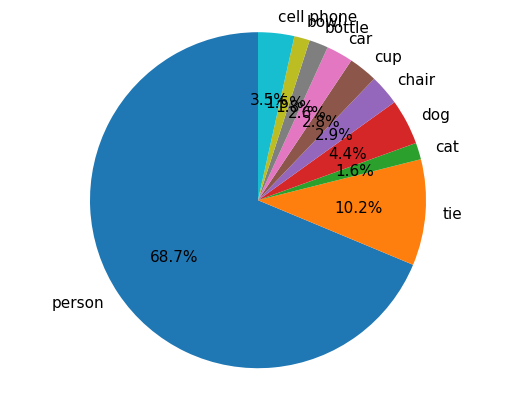

In [19]:
import matplotlib.pyplot as plt

# Define a threshold for minimum frequency
threshold = 200  # Adjust as needed

# Count the frequency of each object detected
object_counts = {}
for objects_list in objects.values():
    for obj in objects_list:
        if obj in object_counts:
            object_counts[obj] += 1
        else:
            object_counts[obj] = 1

# Filter out objects with frequencies below the threshold
filtered_object_counts = {obj: count for obj, count in object_counts.items() if count >= threshold}

# Plot the pie chart
labels = filtered_object_counts.keys()
sizes = filtered_object_counts.values()
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()
